 # **Partie 1** 

# 1.1 Importations des librairies

In [1]:
#------------------------------------------
# projet 5 : Segmentez des clients d’un site e-commerce
# Auteur : Mohamed MERAH
# Date: Janvier 2024
# OpenClassrooms 2023-2024
#-------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
from termcolor import colored
import missingno
import sklearn
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import matplotlib.font_manager
from datetime import timedelta
import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
import squarify
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score,silhouette_score , silhouette_samples,  make_scorer,v_measure_score
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import statistics
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
import plotly.graph_objs as go
import streamlit as st
import gc
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
 
    

# 1.2 Chargement du jeu de données

In [2]:
# Chargement du jeu de données
df_rfm_client= pd.read_csv('C:/Users/misso/Desktop/Formation_DS_23_24_MERAH/2-Projet/5- Projet 5/1-Code/df_rfm_clients.csv')

#Nombre de ligne et colonnes
df_rfm_client.shape

(88887, 11)

In [3]:
df_olist_clients= pd.read_csv('C:/Users/misso/Desktop/Formation_DS_23_24_MERAH/2-Projet/5- Projet 5/1-Code/df_olist_clients.csv')
df_olist_clients.shape

(88887, 17)

# 1.3 Modélisation sur 10% des données

In [4]:
proportion= 0.1
Nb_col_Sel = int ((df_rfm_client.shape[0])*proportion)
Nb_col_Sel 

8888

In [5]:
df_rfm_clients=df_rfm_client.head(Nb_col_Sel ).copy()
df_rfm_clients.shape

(8888, 11)

In [6]:
df_rfm_clients = df_rfm_clients.drop(['Unnamed: 0'], axis=1)
df_rfm_clients

customer_unique_id order_purchase_timestamp Localisation  \
0     0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27           SP   
1     0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27           SP   
2     0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03           SC   
3     0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41           PA   
4     0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42           SP   
...                                ...                      ...          ...   
8883  195bd2de4ad0dfec423973cc62dd77ad      2018-02-13 20:17:10           SP   
8884  195cabf057d893ad407d1e5c97d25928      2018-03-12 19:56:52           SP   
8885  195cc291330f73e3d35032fd4e8b740f      2018-03-08 10:01:50           SC   
8886  195cf297219f91cb8ab3a8350a531217      2018-01-19 14:30:28           PR   
8887  195d0b909914d00626d8794fb5a20eed      2017-10-18 17:52:44           PR   

     categorie_produit  Log_rfm_Frequency  Log_rfm_Monetry  Log_rfm_Recency  \
0       bed_bath_table           0.693147         4.962145         4.718499   
1        health_beauty           0.693147         3.338967         4.744932   
2           stationery           0.693147         4.468434         6.285998   
3            telephony           0.693147         3.798182         5.771441   
4            telephony           0.693147         5.287711         5.662960   
...                ...                ...              ...              ...   
8883              baby           0.693147         3.776890         5.283204   
8884       electronics           0.693147         3.907613         5.135798   
8885   furniture_decor           0.693147         4.729509         5.164786   
8886       electronics           0.693147         3.338258         5.407172   
8887         telephony           0.693147         5.758397         5.752573   

      Log_Satisfaction_score  Log_Delai_de_livraison  Log_Nombre_Article  
0                   1.791759                1.945910            0.693147  
1                   1.609438                1.386294            0.693147  
2                   1.386294                3.258097            0.693147  
3                   1.609438                3.044522            0.693147  
4                   1.791759                2.639057            0.693147  
...                      ...                     ...                 ...  
8883                1.791759                1.386294            0.693147  
8884                1.791759                2.833213            0.693147  
8885                1.791759                2.708050            0.693147  
8886                1.609438                1.386294            0.693147  
8887                1.098612                2.944439            0.693147  

[8888 rows x 10 columns]

In [7]:
df_rfm_clients

customer_unique_id order_purchase_timestamp Localisation  \
0     0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27           SP   
1     0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27           SP   
2     0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03           SC   
3     0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41           PA   
4     0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42           SP   
...                                ...                      ...          ...   
8883  195bd2de4ad0dfec423973cc62dd77ad      2018-02-13 20:17:10           SP   
8884  195cabf057d893ad407d1e5c97d25928      2018-03-12 19:56:52           SP   
8885  195cc291330f73e3d35032fd4e8b740f      2018-03-08 10:01:50           SC   
8886  195cf297219f91cb8ab3a8350a531217      2018-01-19 14:30:28           PR   
8887  195d0b909914d00626d8794fb5a20eed      2017-10-18 17:52:44           PR   

     categorie_produit  Log_rfm_Frequency  Log_rfm_Monetry  Log_rfm_Recency  \
0       bed_bath_table           0.693147         4.962145         4.718499   
1        health_beauty           0.693147         3.338967         4.744932   
2           stationery           0.693147         4.468434         6.285998   
3            telephony           0.693147         3.798182         5.771441   
4            telephony           0.693147         5.287711         5.662960   
...                ...                ...              ...              ...   
8883              baby           0.693147         3.776890         5.283204   
8884       electronics           0.693147         3.907613         5.135798   
8885   furniture_decor           0.693147         4.729509         5.164786   
8886       electronics           0.693147         3.338258         5.407172   
8887         telephony           0.693147         5.758397         5.752573   

      Log_Satisfaction_score  Log_Delai_de_livraison  Log_Nombre_Article  
0                   1.791759                1.945910            0.693147  
1                   1.609438                1.386294            0.693147  
2                   1.386294                3.258097            0.693147  
3                   1.609438                3.044522            0.693147  
4                   1.791759                2.639057            0.693147  
...                      ...                     ...                 ...  
8883                1.791759                1.386294            0.693147  
8884                1.791759                2.833213            0.693147  
8885                1.791759                2.708050            0.693147  
8886                1.609438                1.386294            0.693147  
8887                1.098612                2.944439            0.693147  

[8888 rows x 10 columns]

# **Partie 2 : RFM_Score**

# 2.1 Création du RFM_score

In [8]:
feats_rfm_score=['customer_unique_id','Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry']

In [9]:
data_rfm_score=df_rfm_clients[feats_rfm_score]

In [10]:
data_rfm_score

customer_unique_id  Log_rfm_Recency  Log_rfm_Frequency  \
0     0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
1     0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
2     0000f46a3911fa3c0805444483337064         6.285998           0.693147   
3     0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
4     0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                ...              ...                ...   
8883  195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
8884  195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
8885  195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
8886  195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
8887  195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

      Log_rfm_Monetry  
0            4.962145  
1            3.338967  
2            4.468434  
3            3.798182  
4            5.287711  
...               ...  
8883         3.776890  
8884         3.907613  
8885         4.729509  
8886         3.338258  
8887         5.758397  

[8888 rows x 4 columns]

In [11]:
df_data_RFM_Score=data_rfm_score.copy()

In [12]:
df_data_RFM_Score

customer_unique_id  Log_rfm_Recency  Log_rfm_Frequency  \
0     0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
1     0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
2     0000f46a3911fa3c0805444483337064         6.285998           0.693147   
3     0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
4     0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                ...              ...                ...   
8883  195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
8884  195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
8885  195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
8886  195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
8887  195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

      Log_rfm_Monetry  
0            4.962145  
1            3.338967  
2            4.468434  
3            3.798182  
4            5.287711  
...               ...  
8883         3.776890  
8884         3.907613  
8885         4.729509  
8886         3.338258  
8887         5.758397  

[8888 rows x 4 columns]

In [13]:
# Fonction assignant un score pour une valeur frequency donnée
def assign_frequency_group(row):
    if row['Log_rfm_Frequency'] == 1:
        return 1
    elif row['Log_rfm_Frequency'] == 2:
        return 2
    elif row['Log_rfm_Frequency'] == 3:
        return 3
    else:
        return 4

In [14]:
# On définit les labels RFM
r_labels = range(4, 0, -1)
m_labels = range(1, 5)

# Calcul des scores 'R', 'F' et 'M's
df_data_RFM_Score['R'] = pd.qcut(df_data_RFM_Score['Log_rfm_Recency'], 4, labels=r_labels)
df_data_RFM_Score['F'] = df_data_RFM_Score.apply(assign_frequency_group, axis=1)
df_data_RFM_Score['M'] = pd.qcut(df_data_RFM_Score['Log_rfm_Monetry'], 4, labels=m_labels)

# Création du RFM_Score
df_data_RFM_Score['RFM_Score'] = df_data_RFM_Score[['R', 'F', 'M']].sum(axis=1)

In [15]:
df_data_RFM_Score

customer_unique_id  Log_rfm_Recency  Log_rfm_Frequency  \
0     0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
1     0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
2     0000f46a3911fa3c0805444483337064         6.285998           0.693147   
3     0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
4     0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                ...              ...                ...   
8883  195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
8884  195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
8885  195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
8886  195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
8887  195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

      Log_rfm_Monetry  R  F  M  RFM_Score  
0            4.962145  4  4  3         11  
1            3.338967  4  4  1          9  
2            4.468434  1  4  2          7  
3            3.798182  2  4  1          7  
4            5.287711  2  4  3          9  
...               ... .. .. ..        ...  
8883         3.776890  3  4  1          8  
8884         3.907613  3  4  1          8  
8885         4.729509  3  4  2          9  
8886         3.338258  2  4  1          7  
8887         5.758397  2  4  4         10  

[8888 rows x 8 columns]

# 2.2 Segmentation des clients

In [16]:
# Définir les étiquettes et les intervalles de quartiles
quartiles=["Perdu","A risque","A réactiver","Loyaliste pontentiels","Loyaux","Champions"]

# Utiliser pd.qcut pour créer la nouvelle colonne
df_data_RFM_Score['Segments_Clients'] = pd.qcut(df_data_RFM_Score['RFM_Score'], q=6, labels=quartiles)

In [17]:
df_data_RFM_Score.head(10)

customer_unique_id  Log_rfm_Recency  Log_rfm_Frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
2  0000f46a3911fa3c0805444483337064         6.285998           0.693147   
3  0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
4  0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
5  0004bd2a26a76fe21f786e4fbd80607f         4.983607           0.693147   
6  00050ab1314c0e55a6ca13cf7181fecf         4.882802           0.693147   
7  00053a61a98854899e70ed204dd4bafe         5.209486           0.693147   
8  0005e1862207bf6ccc02e4228effd9a0         6.297109           0.693147   
9  0006fdc98a402fceb4eb0ee528f6a8d4         6.011267           0.693147   

   Log_rfm_Monetry  R  F  M  RFM_Score       Segments_Clients  
0         4.962145  4  4  3         11                 Loyaux  
1         3.338967  4  4  1          9            A réactiver  
2         4.468434  1  4  2          7                  Perdu  
3         3.798182  2  4  1          7                  Perdu  
4         5.287711  2  4  3          9            A réactiver  
5         5.123845  3  4  3         10  Loyaliste pontentiels  
6         3.594019  3  4  1          8               A risque  
7         6.732640  3  4  4         11                 Loyaux  
8         5.018074  1  4  3          8               A risque  
9         3.401197  1  4  1          6                  Perdu

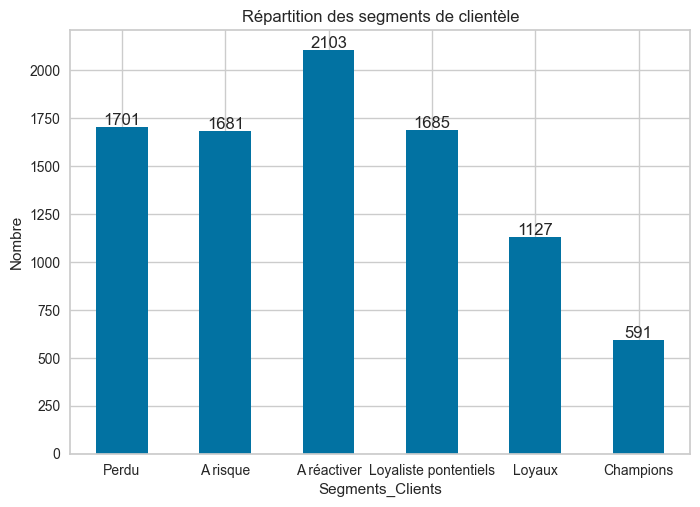

In [18]:
# Créer le graphique à barres
ax = df_data_RFM_Score['Segments_Clients'].value_counts().sort_index().plot(kind='bar')

# Ajouter les annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Ajouter les titres et labels
plt.title('Répartition des segments de clientèle')
plt.xlabel('Segments_Clients')
plt.ylabel('Nombre')

# Rotation des labels de l'axe des abscisses
plt.xticks(rotation='horizontal')  # 'horizontal' est équivalent à 0

plt.show()

In [19]:
RFM_stats = df_data_RFM_Score.groupby("Segments_Clients").agg({'Log_rfm_Recency' : 'mean',
                                                       'Log_rfm_Frequency': 'mean',
                                                       'Log_rfm_Monetry' : ['mean','count','sum']}).round(1)
RFM_stats.columns= RFM_stats.columns.droplevel()
RFM_stats.columns = ["Recency_Mean","Frequency_Mean","Monetary_Mean","Monetary_Count","Monetary_Sum"]
display(RFM_stats)

Recency_Mean  Frequency_Mean  Monetary_Mean  \
Segments_Clients                                                     
Perdu                           5.9             0.7            4.0   
A risque                        5.6             0.7            4.4   
A réactiver                     5.2             0.7            4.8   
Loyaliste pontentiels           4.9             0.7            5.1   
Loyaux                          4.5             0.7            5.5   
Champions                       3.9             0.7            5.9   

                       Monetary_Count  Monetary_Sum  
Segments_Clients                                     
Perdu                            1701        6827.9  
A risque                         1681        7426.1  
A réactiver                      2103       10141.7  
Loyaliste pontentiels            1685        8625.3  
Loyaux                           1127        6164.4  
Champions                         591        3516.3

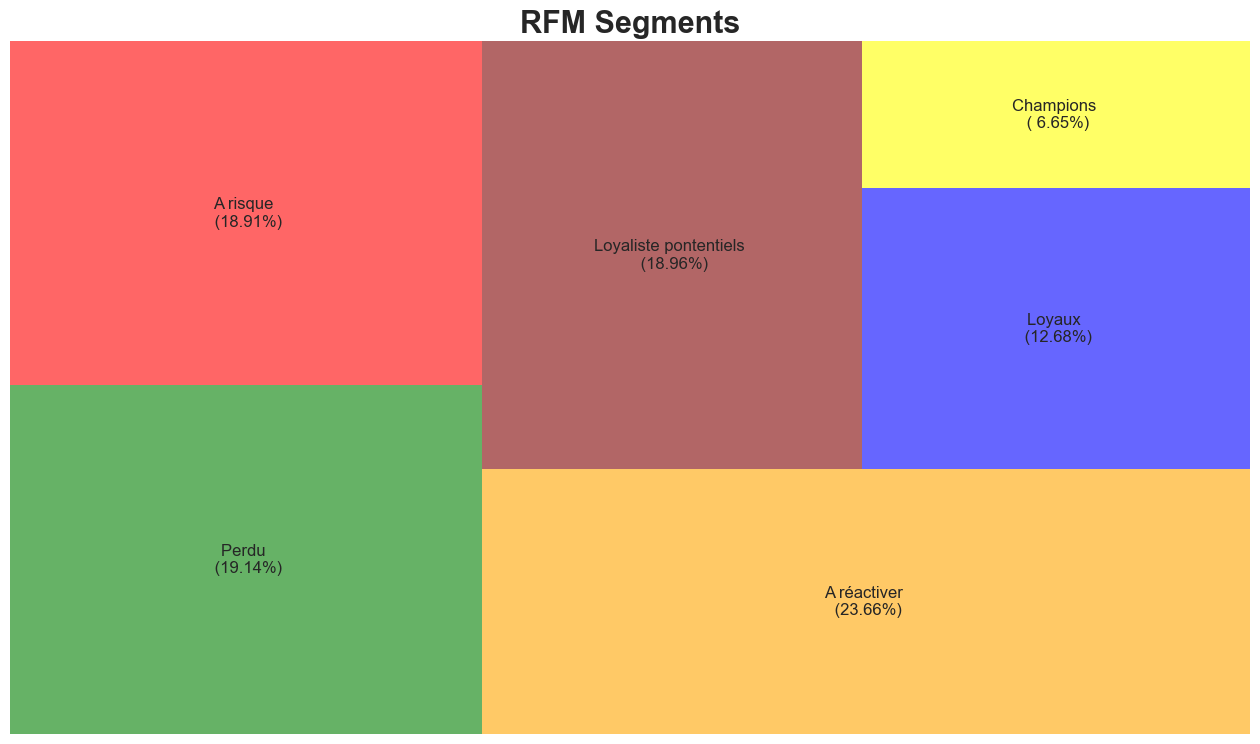

In [20]:
#Graphe de segmentation des clients
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16,9)
perc = [f'{i/RFM_stats["Monetary_Count"].sum()*100:5.2f}%' for i in RFM_stats["Monetary_Count"]]
lbl = [f'{el[0]} \n ({el[1]})' for el in zip( RFM_stats.index, perc)]
squarify.plot(sizes= RFM_stats["Monetary_Count"],
              label = lbl, 
                color = ["Green","Red","Orange","Maroon",'blue','Yellow'],
              alpha=.6)
plt.title("RFM Segments", fontsize = 22, fontweight="bold")
plt.axis("off")
plt.show()

# **Partie 3 :Kmeans**

# 3.1 Encodage

In [21]:
# Liste des variables quantitatives 
num_data_clients = df_rfm_clients.select_dtypes(include='number').columns.tolist()
print("Les variables numériques sont: ", num_data_clients)

Les variables numériques sont:  ['Log_rfm_Frequency', 'Log_rfm_Monetry', 'Log_rfm_Recency', 'Log_Satisfaction_score', 'Log_Delai_de_livraison', 'Log_Nombre_Article']


In [22]:
# Liste des variables qualitatives
cat_data_clients =df_rfm_clients.select_dtypes(include='object').columns.tolist()
print("Les variables categorielles sont: ",cat_data_clients)

Les variables categorielles sont:  ['customer_unique_id', 'order_purchase_timestamp', 'Localisation', 'categorie_produit']


In [23]:
# Types de variables
df_rfm_clients.dtypes.value_counts()

float64    6
object     4
Name: count, dtype: int64

In [24]:
df_rfm_clients.columns

Index(['customer_unique_id', 'order_purchase_timestamp', 'Localisation',
       'categorie_produit', 'Log_rfm_Frequency', 'Log_rfm_Monetry',
       'Log_rfm_Recency', 'Log_Satisfaction_score', 'Log_Delai_de_livraison',
       'Log_Nombre_Article'],
      dtype='object')

In [25]:
data_par =[ 'Localisation', 'categorie_produit',
       'Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry',
       'Log_Satisfaction_score', 'Log_Delai_de_livraison',
       'Log_Nombre_Article']

In [26]:
data_rfm=df_rfm_clients[data_par].head(300)

In [27]:
def encodage(df):
    cont_feats = [col for col in df.columns if df[col].dtype != object]
    cat_feats = [col for col in df.columns if col not in cont_feats]
    df_ohe=df[cat_feats]
    transformer =OneHotEncoder(sparse=False,handle_unknown='ignore')
    transformed = transformer.fit_transform(df_ohe)
    transformed_df = pd.DataFrame(transformed,columns=transformer.get_feature_names_out())
    df_num=df[cont_feats]
    df_encoded=pd.concat(objs=[df_num.reset_index(drop=True), transformed_df.reset_index(drop=True)],axis=1)
    return df_encoded

In [28]:
encodage(data_rfm)

Log_rfm_Recency  Log_rfm_Frequency  Log_rfm_Monetry  \
0           4.718499           0.693147         4.962145   
1           4.744932           0.693147         3.338967   
2           6.285998           0.693147         4.468434   
3           5.771441           0.693147         3.798182   
4           5.662960           0.693147         5.287711   
..               ...                ...              ...   
295         4.990433           0.693147         5.652489   
296         3.332205           0.693147         5.640665   
297         6.089045           0.693147         4.757033   
298         4.110874           0.693147         4.225811   
299         3.850148           0.693147         4.834932   

     Log_Satisfaction_score  Log_Delai_de_livraison  Log_Nombre_Article  \
0                  1.791759                1.945910            0.693147   
1                  1.609438                1.386294            0.693147   
2                  1.386294                3.258097            0.693147   
3                  1.609438                3.044522            0.693147   
4                  1.791759                2.639057            0.693147   
..                      ...                     ...                 ...   
295                0.693147                2.079442            1.386294   
296                1.791759                2.079442            0.693147   
297                1.609438                2.197225            0.693147   
298                1.791759                2.397895            0.693147   
299                1.609438                1.945910            0.693147   

     Localisation_AC  Localisation_AL  Localisation_BA  Localisation_CE  ...  \
0                0.0              0.0              0.0              0.0  ...   
1                0.0              0.0              0.0              0.0  ...   
2                0.0              0.0              0.0              0.0  ...   
3                0.0              0.0              0.0              0.0  ...   
4                0.0              0.0              0.0              0.0  ...   
..               ...              ...              ...              ...  ...   
295              0.0              0.0              0.0              0.0  ...   
296              0.0              0.0              0.0              0.0  ...   
297              0.0              0.0              0.0              0.0  ...   
298              0.0              0.0              0.0              0.0  ...   
299              0.0              0.0              0.0              0.0  ...   

     categorie_produit_luggage_accessories  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
..                                     ...   
295                                    0.0   
296                                    0.0   
297                                    0.0   
298                                    0.0   
299                                    0.0   

     categorie_produit_office_furniture  categorie_produit_perfumery  \
0                                   0.0                          0.0   
1                                   0.0                          0.0   
2                                   0.0                          0.0   
3                                   0.0                          0.0   
4                                   0.0                          0.0   
..                                  ...                          ...   
295                                 0.0                          1.0   
296                                 0.0                          0.0   
297                                 0.0                          0.0   
298                                 0.0                          0.0   
299                                 0.0                          0.0   

    


K-Means
Fonctionnement

L’algorithme K-means identifie un certain nombre de centroïdes dans un ensemble de données, un centroïde étant la moyenne arithmétique de tous les points de données appartenant à un cluster particulier.

L’algorithme attribue ensuite chaque point de données au cluster le plus proche en essayant de maintenir les clusters aussi petits que possible (le terme « means » dans K-means fait référence à la tâche consistant à faire la moyenne des données ou à trouver le centroïde).
Détermination de la valeur K (le nombre de clusters optimal)
- La méthode d’Elbow

Selon l’algorithme de K-Means, on doit définir au préalable le nombre K de clusters. Le problème qui se pose et de trouver un K optimal. L’une des méthodes les plus populaires pour y arriver est la méthode d’Elbow. Elle s’appuie sur la notion d’inertie. On définit cette dernière comme ceci : la somme des distances euclidiennes entre chaque point et son centroïde associé.

L’idée est d’exécuter le clustering k-means pour une gamme de clusters k et pour chaque valeur, nous calculons l’inertie intraclasse.

Lorsque l’on trace les distorsions et que le tracé ressemble à un bras, le « coude » (le point d’inflexion de la courbe) est la meilleure valeur de k.
- Le coefficient de silhouette

Une approche plus précise mais qui requiert plus de temps de calcul est le coefficient de silhouette. Il mesure la similitude d’un point de données à l’intérieur d’un groupe par rapport à d’autres groupes.

Ce coefficient peut varier entre -1 et +1. Un coefficient proche de +1 signifie que l’observation est située bien à l’intérieur de son propre cluster, tandis qu’un coefficient proche de 0 signifie qu’elle se situe près d’une frontière ; enfin, un coefficient proche de -1 signifie que l’observation est associée au mauvais cluster.


In [29]:
#fonction ppour selectionner les varaibles nécessaires à notre modélisation
def selection_features(data, features):
    data=data[features]
    Y=data['customer_unique_id'].values
    data.set_index('customer_unique_id', inplace=True)
    X=data.values
    return X, Y

In [30]:
#fonction scaler  
def scaler(df):
    scaler=StandardScaler()
    df=scaler.fit_transform(df)
    return df

In [31]:
#fonction de modélisation et d'affichage des clusters
def clustering(X,k,n):
    '''
    X= données a l'entrée,
    k Nombre de clusters
    n= nombre de composantes PCA pour la projection
    '''
    #kMeans
    model= KMeans(n_clusters=k)
    model.fit(X)
    model_labels=model.labels_
    print('le score est',model.inertia_)
    #Apc pour une meilleure projection
    pca = PCA(n_components=n)
    pca.fit(X)
    X_trans=pca.transform(X)
    sns.set_style('white')
    plt.scatter(X_trans[:,0], X_trans[:,1], c=model.labels_)
    plt.title('la projection des segments')
    return model.labels_

In [32]:
def snake_plot(df, var):

    # Melt data into long format
    df_melt = pd.melt(df.reset_index(), 
                        id_vars=['customer_unique_id', 'cluster'],
                        value_vars=var, 
                        var_name='Metric', 
                        value_name='Value')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')
    plt.title('Snake Plot des différents clusters', fontsize='18')
    
    return

In [33]:
#fonction qui calcule plusieurs indicateurs statistiques 
def rfm_clusters_stats(df):
    df_new = df.groupby(['cluster']).agg({'mean','median','min','max'
                                         }).round(0)
    df_new['count']=df['cluster'].value_counts()
    return df_new

In [34]:
def cluster_analysis_k_means(df):
    # Sélectionner uniquement les colonnes quantitatives
    numeric_columns = df.select_dtypes(include=[np.number])
    
    # Normaliser les données
    scaler = StandardScaler()
    numeric_columns_scaled = scaler.fit_transform(numeric_columns)

    results = []
    for k in range(2, 11):  # Tester K de 1 à 10
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(numeric_columns)
        labels = kmeans.labels_

        # Calculer les scores pour chaque K
        if k > 1:  # les métriques de silhouette et Davies-Bouldin nécessitent au moins 2 clusters
            silhouette = silhouette_score(numeric_columns, labels)
            davies_bouldin = davies_bouldin_score(numeric_columns, labels)
        else:
            silhouette = None
            davies_bouldin = None

        results.append({
            'K': k,
            'Silhouette': silhouette,
            'Davies-Bouldin': davies_bouldin
        })

    # Convertir en DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [35]:
def clustering_eval(preprocessor, model,features, data, metric, elbow=True, mds=False, KBest=None,RFM=False):
    
    if((elbow==True) & (mds==True)):
        ncols=3
    elif((elbow==False) | (mds==False)):
        ncols=2
    else:
        ncols=1
        
    fig, axes = plt.subplots(nrows=1, ncols=ncols, sharex=False, sharey=False, figsize=(24,8))
    
    ax=0
    if(elbow==True):
        # Elbow visualizer
        if RFM == False :
          kmeans_visualizer = Pipeline([
              ("preprocessor", preprocessor),
              ("kelbowvisualizer", KElbowVisualizer(model,K=(2,12), metric=metric, ax=axes[ax]))])
          kmeans_visualizer.fit(data)
          KBest = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_
          kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
          ax+=1
        else:
          data_RFM_normalized = scaler.fit_transform(data[features])
          data_RFM_normalized = pd.DataFrame(data_RFM_normalized,columns=features)
          data_RFM_normalized = pd.concat([data_RFM_normalized ,data['rfm_Kmeans']],axis=1)
          kmeans_visualizer = Pipeline([
              
              ("kelbowvisualizer", KElbowVisualizer(model,K=(2,12), metric=metric, ax=axes[ax]))])
          kmeans_visualizer.fit(data_RFM_normalized)
          KBest = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_
          kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
          ax+=1          
    # Set best K
    K = KBest
    model.set_params(n_clusters=K)

    
    # Silhouette Visualizer
    if RFM == False:
      silhouette_visualizer = Pipeline([
          ("preprocessor", preprocessor),
          ("silhouettevisualizer", SilhouetteVisualizer(model, ax=axes[ax]))])
      silhouette_visualizer.fit(data)
      silhouette_visualizer.named_steps['silhouettevisualizer'].finalize()
      ax+=1
    else:
      silhouette_visualizer = Pipeline([("silhouettevisualizer", SilhouetteVisualizer(model, ax=axes[ax]))])
      silhouette_visualizer.fit(data_RFM_normalized)
      silhouette_visualizer.named_steps['silhouettevisualizer'].finalize()
      ax+=1
    
    # Intercluster distance Map with best k
    if(mds==True):
      if RFM == False:
        distance_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("distancevisualizer", InterclusterDistance(model, ax=axes[ax]))])
        distance_visualizer.fit(data)
        distance_visualizer.named_steps['distancevisualizer'].finalize()
      else:
        distance_visualizer = Pipeline([ ("distancevisualizer", InterclusterDistance(model, ax=axes[ax]))])
        distance_visualizer.fit(data_RFM_normalized)
        distance_visualizer.named_steps['distancevisualizer'].finalize()
    
    return K
    #plt.show()

In [36]:
def taille_cluster(labels):
    global cluster_size
    cluster_size = {}
    for i in labels:
        if i not in cluster_size:
            cluster_size[i] = 1
        else:
            cluster_size[i] += 1

    fig = plt.figure(figsize=[8, 8])
    fig.patch.set_alpha(0.7)
    plt.title("Clusters size ")
    plt.bar(range(0, len(cluster_size)), cluster_size.values())
    for i, num in enumerate(cluster_size.keys()):
        height = cluster_size[num]+20
        x = i - 0.25
        pourcent = cluster_size[num]/labels.shape[0]*100
        plt.text(x, height, "{} % ".format(round(pourcent, 2)))
    plt.xticks(range(0, len(cluster_size)), cluster_size.keys())

In [37]:
def Nb_clustering(scaler,model, data,metric,Kmin,Kmax):
    
    data_normalisee = scaler.fit_transform(data)
    
    # K elbow visualizer
    if(metric=='kelbowvisualizer'):
            kmeans_visualizer = Pipeline([(metric, KElbowVisualizer(KMeans(),K=(Kmin,Kmax)))])
            kmeans_visualizer.fit(data_normalisee )
            kmeans_visualizer.named_steps['kelbowvisualizer'].show()  
            KBest = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_
            return KBest
     # Silhouette Visualizer
    elif(metric=='silhouettevisualizer'):
            silhouette_visualizer = Pipeline([(metric, SilhouetteVisualizer(KMeans(),K=(Kmin,Kmax)))])
            silhouette_visualizer.fit(data_normalisee)
            silhouette_visualizer.named_steps['silhouettevisualizer'].show()
            
     # calinski_harabasz Visualizer        
    elif(metric=='calinski_harabasz'):        
            kmeans_visualizer = KElbowVisualizer(model,k=(Kmin,Kmax),metric='calinski_harabasz', timings=False)
            # Entraînement des données
            kmeans_visualizer.fit(data_normalisee)  
            kmeans_visualizer.show()
            
         # Silhouette Visualizer     
    elif(metric=='silhouette'):        
            kmeans_visualizer = KElbowVisualizer(model,k=(Kmin,Kmax),metric='silhouette', timings=False)
            # Entraînement des données
            kmeans_visualizer.fit(data_normalisee)  
            kmeans_visualizer.show()        
            
            

In [38]:
def seg_kmeans_cl(k_cluster,data,features) :
            # KMeans Pipeline with best K
            kmeans_model = Pipeline([("kmeans", KMeans(k_cluster))])
             # Normaliser les données

            scaler = StandardScaler()
            data_RFM_normalized = scaler.fit_transform(data[features])
            kmeans_model.fit(data_RFM_normalized)

            # Kmeans labels
            kmeans_labels= kmeans_model.named_steps['kmeans'].labels_
            #data_RFM_Score["kmeans_label"] = kmeans_labels
            taille_cluster(kmeans_labels)
            ax1 = plt.gca()
            ax1.set_ylabel('Nombre de clients', fontsize=12)
            ax1.set_xlabel('Clusters', fontsize=12)
            ax1.set_title('Taux de clients par clusters', fontsize=14)

In [39]:
def segmentation_clients(data,data_col,k_cluster):
    
    if(k_cluster==4) :
        # DataFrame des centres des clusters
        palette = ['gold','orange', 'lightgreen', 'salmon']
        colors_map = {0: 'gold',  1: 'orange',  2: 'lightgreen', 3: 'salmon'} 
    
    if(k_cluster==5) :
        # DataFrame des centres des clusters
        palette = ['gold','orange', 'lightgreen', 'salmon','tan']
        colors_map = {0: 'gold',  1: 'orange',  2: 'lightgreen', 3: 'salmon',4: 'tan'} 
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled= scaler.fit_transform(data)
    X_scaled
    
    # Create a k-means clustering model
    kmeans= KMeans(k_cluster)

    # Fit the data to the model
    kmeans.fit(X_scaled)

    # Determine which clusters each data point belongs to:
    clusters= kmeans.predict(X_scaled)
    
    # Add cluster number and color to the original data
    X_scaled_clustered = pd.DataFrame(X_scaled, columns=data.columns, index=data.index)
    X_scaled_clustered['cluster'] = clusters
    X_scaled_clustered['color'] = X_scaled_clustered['cluster'].map(colors_map)
    X_scaled_clustered.head()
    
    df_centers= pd.DataFrame(index=palette, columns=data.columns)
    df= X_scaled_clustered

    for color in palette:
            df_centers.loc[color, :] = df.loc[
            df['color'] == color, data_col].mean()
            count_color = df.loc[df['color'] == color, 'color'].shape[0]
            df_centers.loc[color, 'count'] = count_color
    
    # coordonnées des centres des clusters avec les ordres de grandeur initials
    centers_invers = scaler.inverse_transform(df_centers.iloc[:, :-1])\
                    .round().astype(int)
    # Convert to a data frame
    df_centers_invers = pd.DataFrame(centers_invers,
                                     index=df_centers.index,
                                     columns=data.columns)
    df_centers_invers['count'] = df_centers['count']
    
    fig = plt.gcf()
    ax = fig.add_subplot()
    fig.set_size_inches(16,9)
    df = df_centers_invers

    perc = [f'{i/df["count"].sum()*100:5.2f}%' for i in df["count"]]
    lbl = [f'{el[0]} \n ({el[1]})' for el in zip(df.index, perc)]

    squarify.plot(sizes=df['count'],
                  label=lbl,
                  color=palette,
                  alpha=0.8)
    plt.title("RFM Segments", fontsize=18, fontweight="bold")
    plt.axis("off")
    plt.show()
    
    return df_centers_invers


In [40]:
def Cluster_db(data,features) :
    
        """
          Fonction qui renvoie Distance Epsilon,
           Estimated number of clusters,
           Estimated number of noise points 
         """
        data_db=data[features]    
        std = StandardScaler()
        X_db = std.fit_transform(data_db)
        model_dbscan = DBSCAN()
        model_dbscan.fit(X_db)

        labels = model_dbscan.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_= list(labels).count(-1)
        
        neigh = NearestNeighbors(n_neighbors=X_db.shape[1])
        nbrs = neigh.fit(X_db)
        distances, indices = nbrs.kneighbors(X_db)
        distances = np.sort(distances, axis=0)
        distances = distances[:,1]


        i = np.arange(len(distances))
        knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
        fig = plt.figure(figsize=(5, 5))
        knee.plot_knee()
        plt.xlabel("Points")
        plt.ylabel("Distance Epsilon")

        print("Distance Epsilon : %f" % distances[knee.knee])
        print("Estimated number of clusters : %d" % n_clusters_)
        print("Estimated number of noise points : %d" % n_noise_)


In [41]:
def Cluster_pca(data,features,esp_values,min_samples1,n_components) :
        
        data_db=data[features]  
        dbscan_cluster = DBSCAN(eps = esp_values, min_samples = min_samples1)
        dbscan_cluster.fit(data_db)
        
        #Apc pour une meilleure projection
        pca = PCA(n_components)
        pca.fit(data_db)
        X_db_trans=pca.transform(data_db)
        
        # Visualizing DBSCAN
        plt.scatter(X_db_trans[:, 0], 
        X_db_trans[:, 1], 
        c=dbscan_cluster.labels_)
        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")
        plt.title('la projection des segments')

        sns.set_style('white')
        # Number of Clusters
        labels=dbscan_cluster.labels_
        N_clus=len(set(labels))-(1 if -1 in labels else 0)
        print('Estimated no. of clusters: %d' % N_clus)

        # Identify Noise
        n_noise = list(dbscan_cluster.labels_).count(-1)
        print('Estimated no. of noise points: %d' % n_noise)

In [42]:

def cluster_analysis_DBSCAN(df):
    # Sélectionner uniquement les colonnes quantitatives
    numeric_columns = df.select_dtypes(include=[np.number])

    # Normaliser les données
    scaler = StandardScaler()
    numeric_columns_scaled = scaler.fit_transform(numeric_columns)

    results = []
    for eps in np.linspace(0.1, 20, 10):  # Essayer 10 valeurs pour epsilon
        for min_samples in range(1, 11):  # Essayer 10 valeurs pour min_samples
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(numeric_columns_scaled)
            labels = dbscan.labels_

            # Calculer les scores pour chaque combinaison d'hyperparamètres
            # Si tous les points sont considérés comme du bruit, ou s'il n'y a qu'un seul cluster, les scores ne peuvent pas être calculés
            if len(set(labels)) > 1 and -1 in labels:
                silhouette = silhouette_score(numeric_columns_scaled, labels)
                davies_bouldin = davies_bouldin_score(numeric_columns_scaled, labels)
                # Calculer le pourcentage de bruit
                noise_percent = np.sum(labels == -1) / len(labels) * 100
                # Calculer le nombre de clusters
                k = len(set(labels)) - (1 if -1 in labels else 0)
            else:
                silhouette = None
                davies_bouldin = None
                noise_percent = None
                k = 0

            results.append({
                'K': k,
                'Epsilon': eps,
                'MinPts': min_samples,
                'Silhouette': silhouette,
                'Davies-Bouldin': davies_bouldin,
                'NoisePercent': noise_percent
            })
            
            # Garbage collector (pour diminuer l'utilisation de RAM)
            gc.collect()

    # Convertir en DataFrame
    results_df = pd.DataFrame(results)
    
    # Filtrer pour ne garder que les configurations avec 2 clusters ou plus
    results_df = results_df[results_df['K'] >= 2]

    # Mettre la colonne 'K' en première position
    cols = list(results_df.columns)
    cols = [cols[cols.index('K')]] + cols[:cols.index('K')] + cols[cols.index('K')+1:]
    results_df = results_df[cols]

    # Trier le DataFrame par 'Rank Final'
    #results_df = results_df.sort_values(by='Rank Final')

    # Afficher les résultats
    return results_df

# **3.2 Segmentation des clients avec  3 variable RFM**

In [43]:
feats_rfm=['customer_unique_id','Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry']

In [44]:
df_rfm_clients.columns

Index(['customer_unique_id', 'order_purchase_timestamp', 'Localisation',
       'categorie_produit', 'Log_rfm_Frequency', 'Log_rfm_Monetry',
       'Log_rfm_Recency', 'Log_Satisfaction_score', 'Log_Delai_de_livraison',
       'Log_Nombre_Article'],
      dtype='object')

# 3.2.1 Standardisation de notre dataset

In [45]:
#Sélection de la table contenant les variables transfomées en log
X_rfm, Y_rfm= selection_features(df_rfm_clients,feats_rfm)
#standardisation de notre table
X_rfm=scaler(X_rfm)

# 3.2.2 Détermination du nombre de clusters optimal

In [46]:
feats_rfm_cluster=['Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry']
df_feats_rfm_cluster=df_rfm_clients[feats_rfm_cluster]

# 3.2.2.1 Méthode k-elbow

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


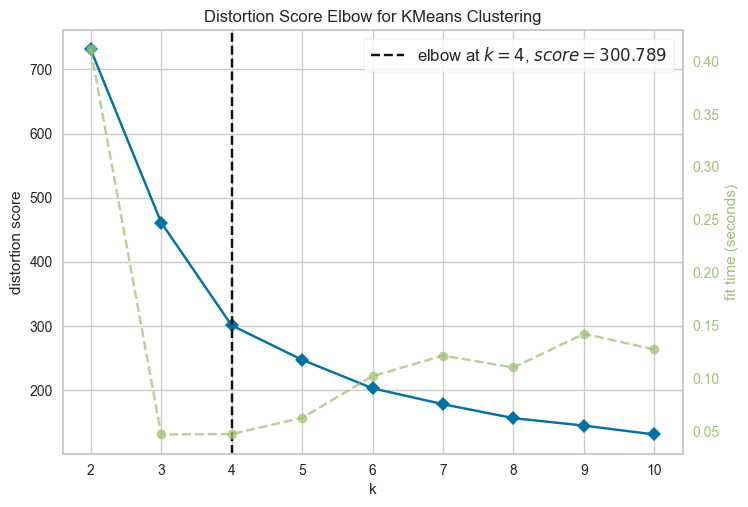

4

In [47]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_cluster,'kelbowvisualizer',2,15)

# 3.2.2.2 Méthode silhouette

3

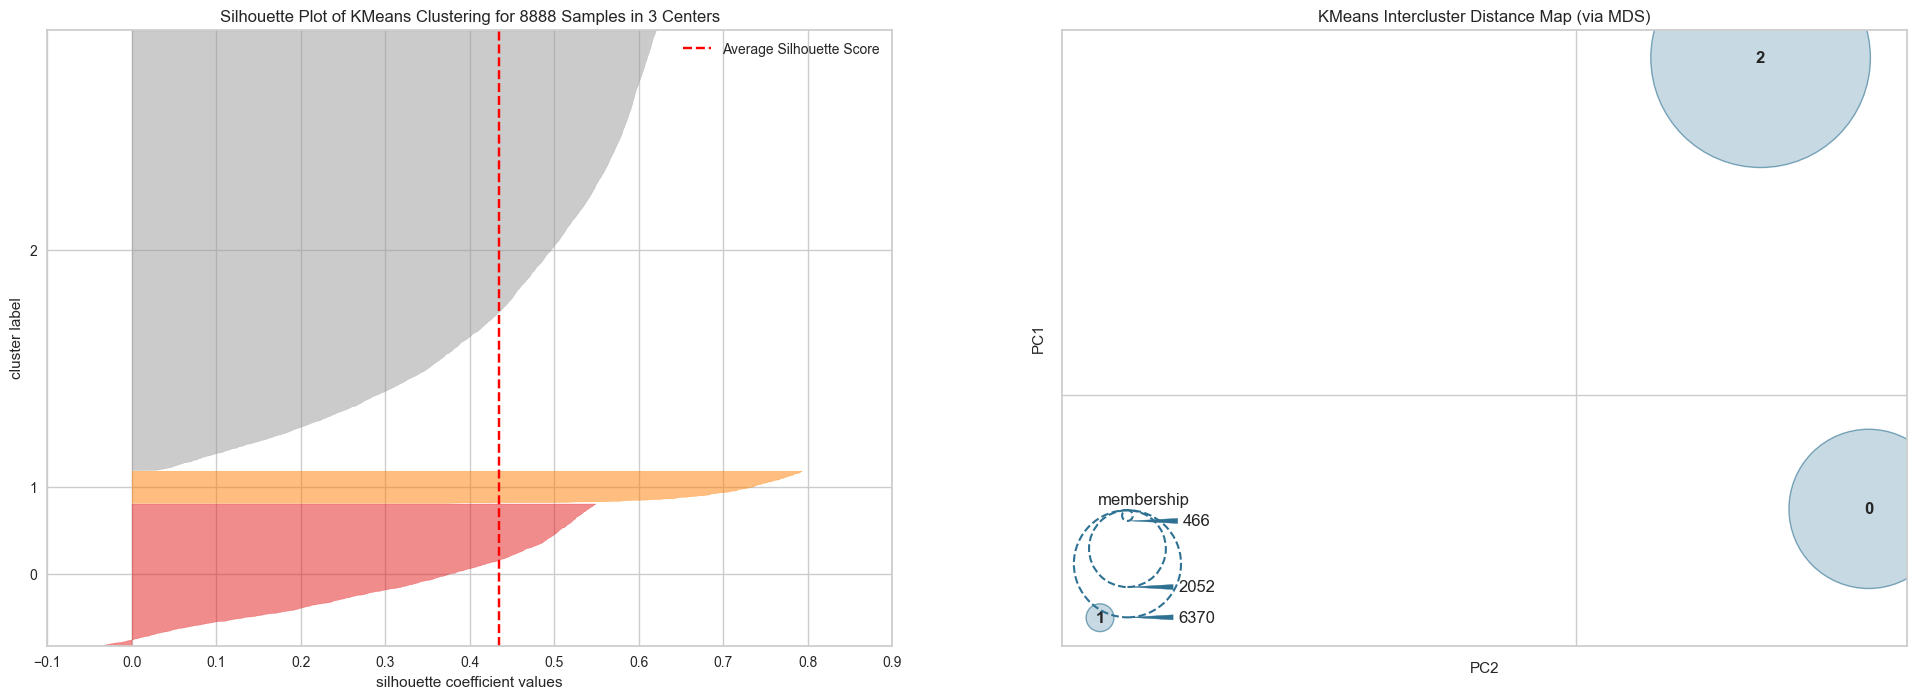

In [48]:
clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                features=feats_rfm_cluster,
                data=df_feats_rfm_cluster, 
                metric="silhouette",
                elbow=False,
                mds=True,
                KBest=3)

4

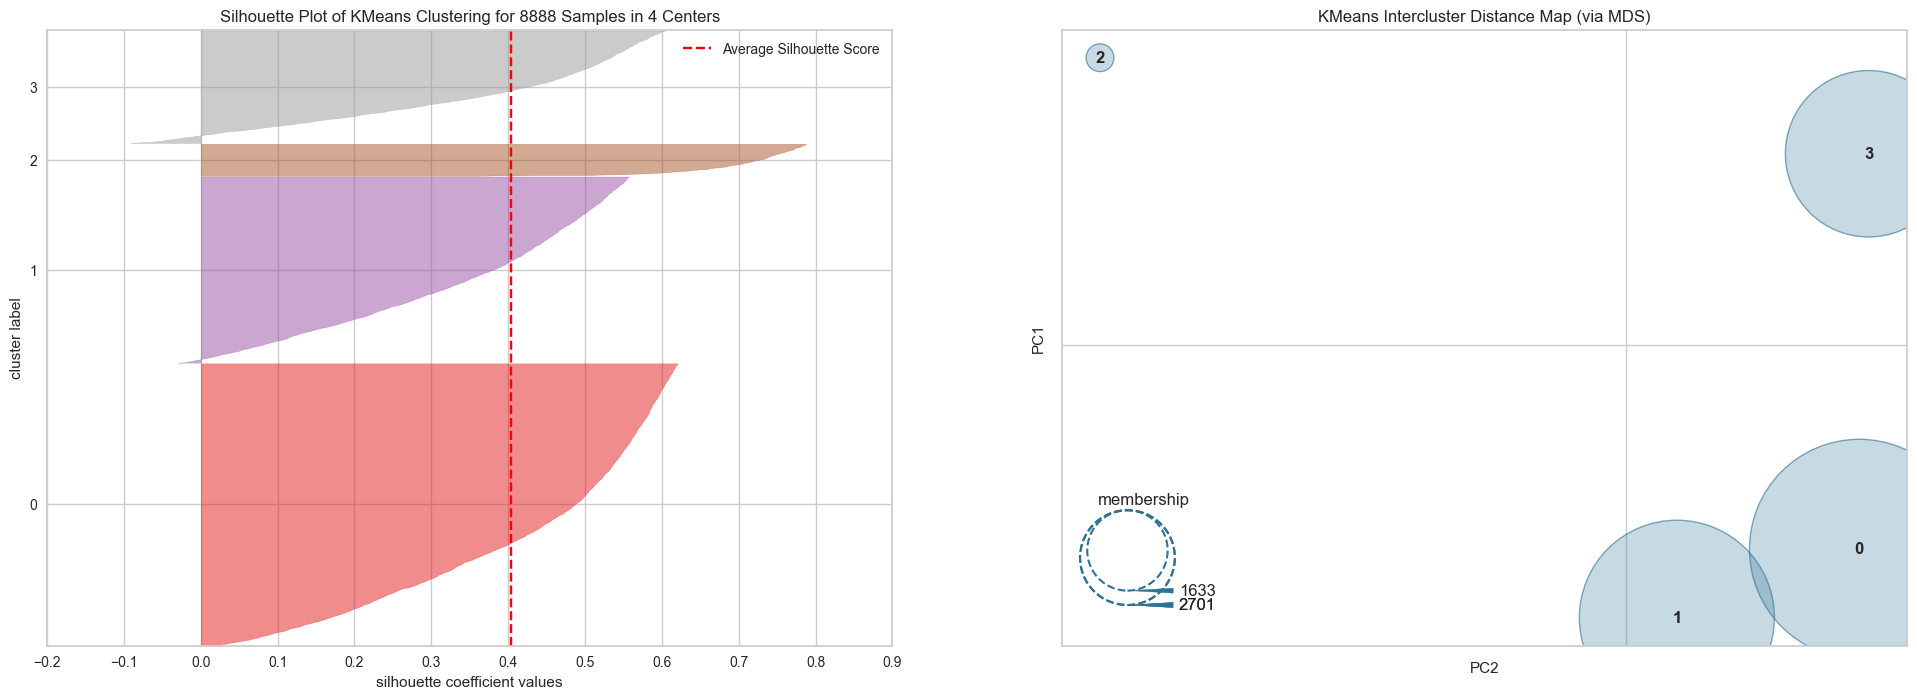

In [49]:
clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                features=feats_rfm_cluster,
                data=df_feats_rfm_cluster, 
                metric="silhouette",
                elbow=False,
                mds=True,
                KBest=4)

5

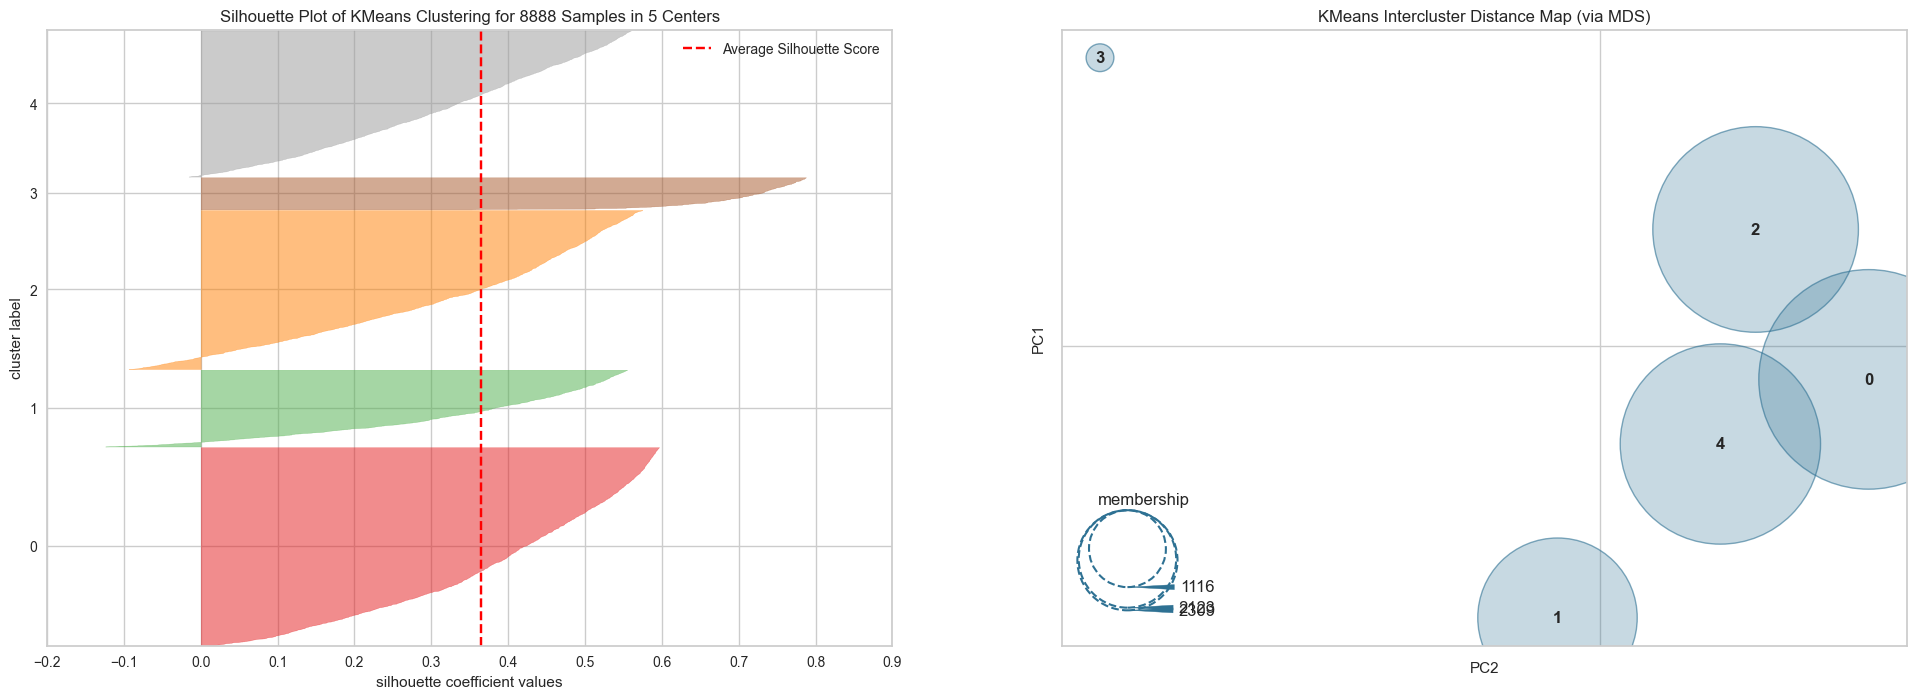

In [50]:
clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                features=feats_rfm_cluster,
                data=df_feats_rfm_cluster, 
                metric="silhouette",
                elbow=False,
                mds=True,
                KBest=5)

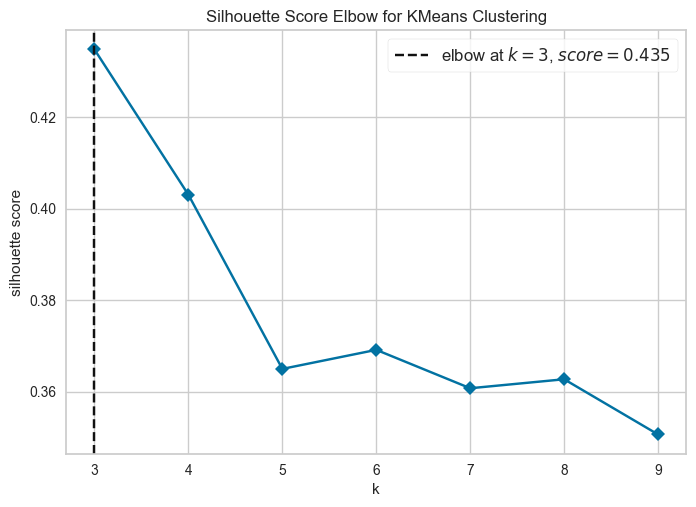

In [51]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_cluster,'silhouette',3,10)

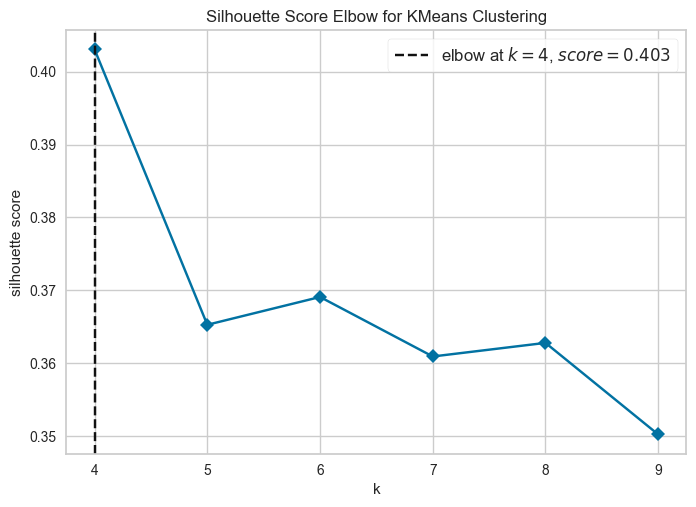

In [52]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_cluster,'silhouette',4,10)

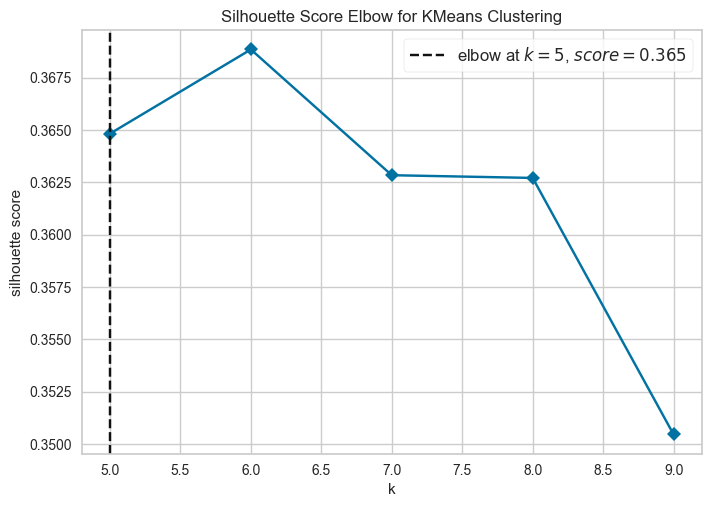

In [53]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_cluster,'silhouette',5,10)

In [54]:
n_clusters = range(2, 11)
scores = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X_rfm)
    labs = kmeans.labels_
    score = silhouette_score(X_rfm, labs)
    scores.append(score)

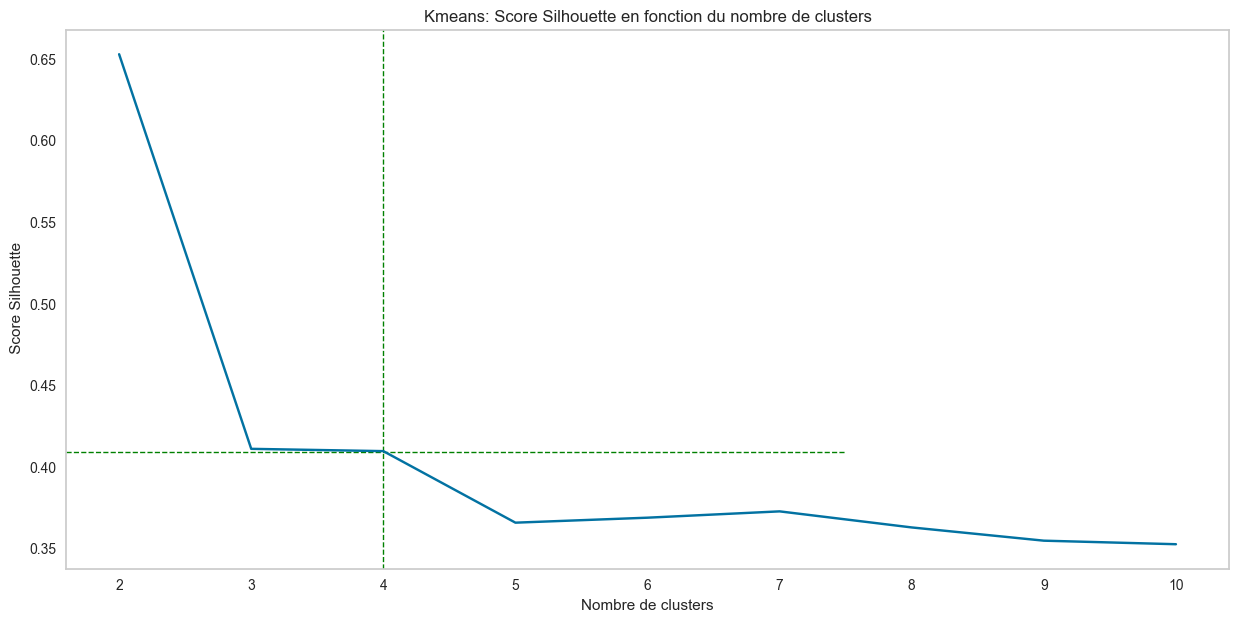

In [55]:
fig = plt.figure(figsize=[15, 7])
fig.patch.set_alpha(0.7)

plt.axhline(y=0.409, linestyle="--", 
            color="green",
            xmax=0.67,
            linewidth=1)
plt.axvline(x=4, linestyle="--", 
            color="green",
            ymax=1.48,
            linewidth=1)

plt.title("Kmeans: Score Silhouette en fonction du nombre de clusters")
plt.plot(n_clusters,scores)
plt.ylabel(" Score Silhouette")
plt.xlabel("Nombre de clusters")
plt.grid()

# 3.2.2.3 Méthode calinski_harabasz

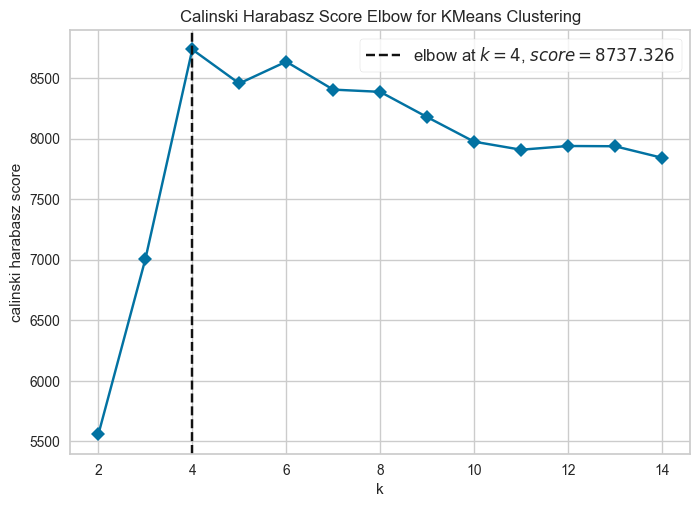

In [56]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_cluster,'calinski_harabasz',2,15)

 - **La méthode du coude donne k=4**
 - **Le coefficient de silhouette le nombre de k optimal serait 3** 
 - **Méthode calinski_harabasz donne k=4**
 

- Silouhette : rapport moyen entre la distance intra-cluster et la distance du cluster le plus proche,
- Calinski Harabasz : rapport entre la dispersion des grappes dans et entre les groupes.
- KElbowVisualizer de Yellowbrick implémente la méthode du «coude» pour sélectionner le nombre optimal de clusters en ajustant le modèle K-Means avec une plage de valeurs pour K. Si le graphique en courbes ressemble à un bras, alors le «coude» (le point d'inflexion sur la courbe) est une bonne indication du nombre de K optimal.


# 3.2.3 Répartition des clients en clusters

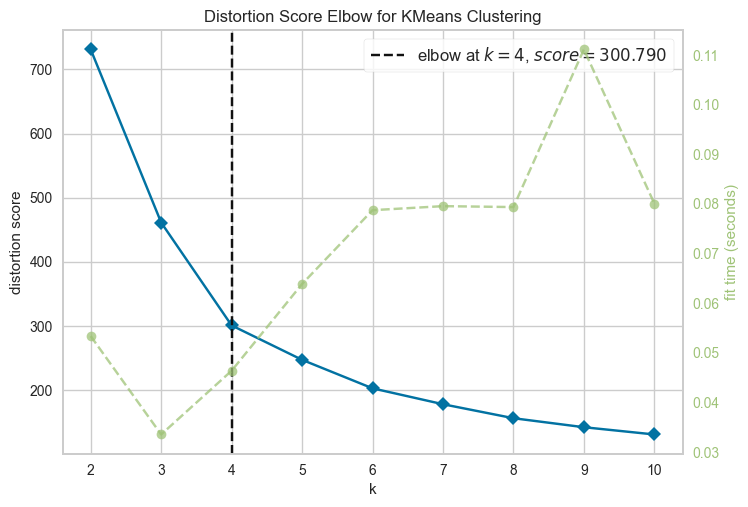

4

In [57]:
K_rfm =Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_cluster,'kelbowvisualizer',2,15)
K_rfm

# 3.2.4 La projection des segments

le score est 7223.518443457604


array([1, 2, 2, ..., 2, 2, 1])

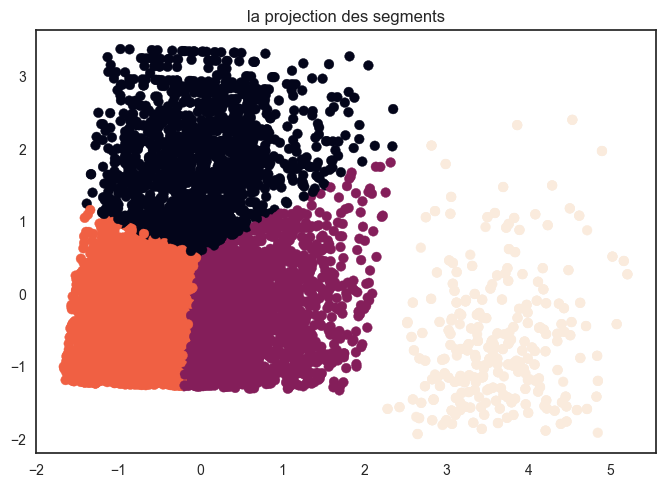

In [58]:
model_labels_rfm=clustering(X_rfm,K_rfm,2)
model_labels_rfm

# 3.2.5 Trouver le bon k (k-means)

In [59]:
#créons une table 'data' avec les 3 features RFM
data_RFM=df_rfm_clients[feats_rfm]
data_RFM.set_index('customer_unique_id', inplace=True)

In [60]:
data_RFM

Log_rfm_Recency  Log_rfm_Frequency  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
0000f46a3911fa3c0805444483337064         6.285998           0.693147   
0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                           ...                ...   
195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

                                  Log_rfm_Monetry  
customer_unique_id                                 
0000366f3b9a7992bf8c76cfdf3221e2         4.962145  
0000b849f77a49e4a4ce2b2a4ca5be3f         3.338967  
0000f46a3911fa3c0805444483337064         4.468434  
0000f6ccb0745a6a4b88665a16c9f078         3.798182  
0004aac84e0df4da2b147fca70cf8255         5.287711  
...                                           ...  
195bd2de4ad0dfec423973cc62dd77ad         3.776890  
195cabf057d893ad407d1e5c97d25928         3.907613  
195cc291330f73e3d35032fd4e8b740f         4.729509  
195cf297219f91cb8ab3a8350a531217         3.338258  
195d0b909914d00626d8794fb5a20eed         5.758397  

[8888 rows x 3 columns]

In [61]:
cluster_analysis_k_means(data_RFM)

K  Silhouette  Davies-Bouldin
0   2    0.401052        1.060936
1   3    0.387821        0.880987
2   4    0.337692        0.957559
3   5    0.344255        0.903357
4   6    0.338814        0.882924
5   7    0.338511        0.886191
6   8    0.325923        0.906983
7   9    0.325243        0.913598
8  10    0.330902        0.866864

In [62]:
resultsrfm = cluster_analysis_k_means(data_RFM)
resultsrfm = resultsrfm.reset_index(drop=True)
resultsrfm 

K  Silhouette  Davies-Bouldin
0   2    0.401052        1.060936
1   3    0.387821        0.880987
2   4    0.337692        0.957559
3   5    0.344255        0.903357
4   6    0.338814        0.882924
5   7    0.338511        0.886191
6   8    0.325923        0.906983
7   9    0.325243        0.913598
8  10    0.330902        0.866864

In [63]:
k_means_rfm = pd.DataFrame(resultsrfm.iloc[1]).transpose()
k_means_rfm.rename(index={1:'k-means : RFM'}, inplace=True)
k_means_rfm

K  Silhouette  Davies-Bouldin
k-means : RFM  3.0    0.387821        0.880987

# 3.2.6 La répartition des clients par des clusters

# 3.2.6.1 Méthode 1

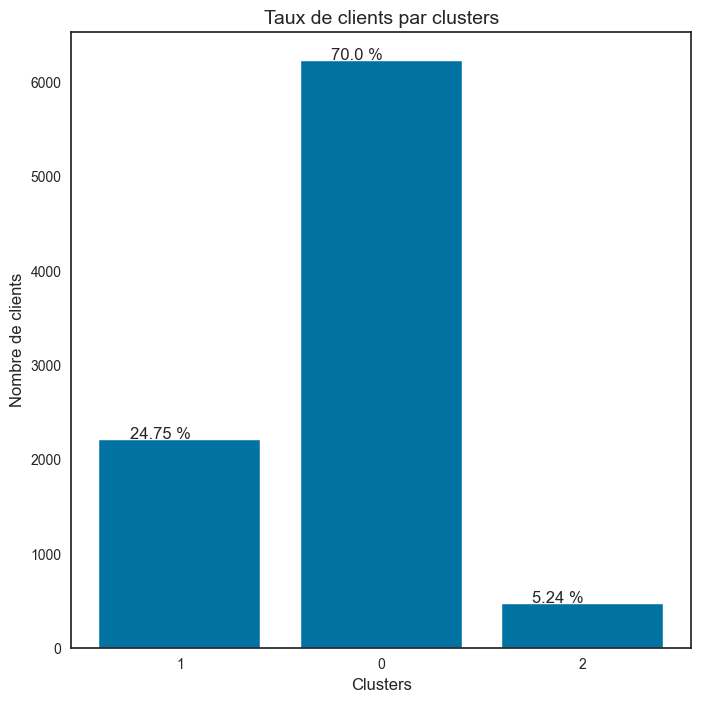

In [64]:
seg_kmeans_cl(3,df_feats_rfm_cluster,feats_rfm_cluster)

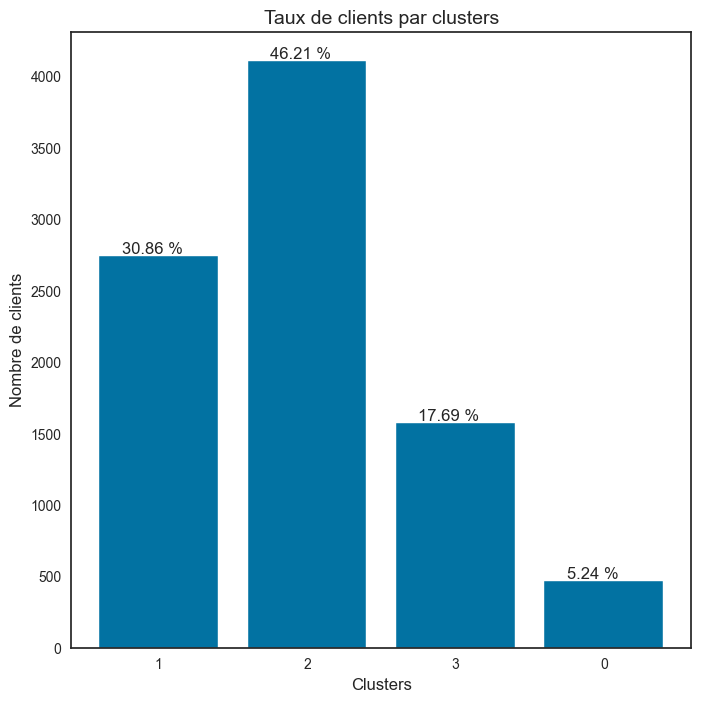

In [65]:
seg_kmeans_cl(4,df_feats_rfm_cluster,feats_rfm_cluster)

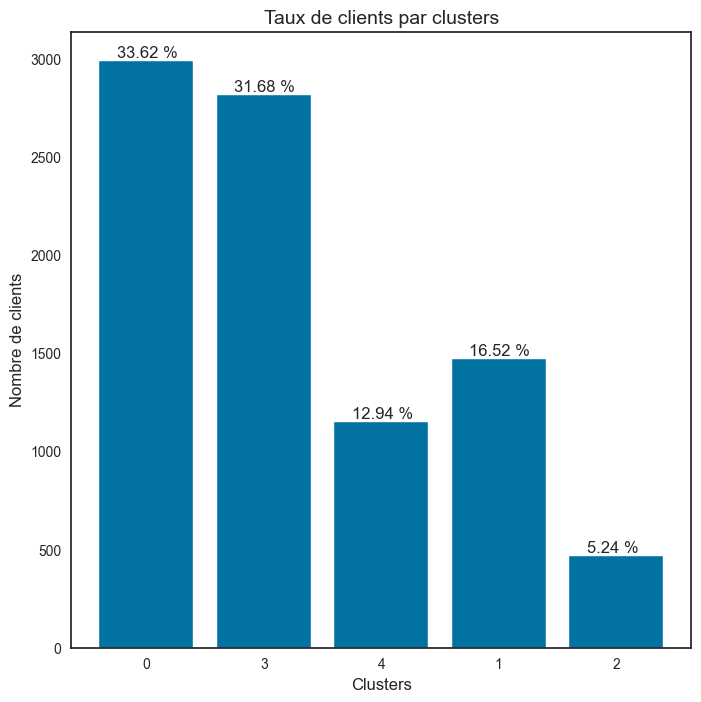

In [66]:
seg_kmeans_cl(5,df_feats_rfm_cluster,feats_rfm_cluster)

# 3.2.6.2 Méthode 2

In [67]:
data_rfm_m2=data_rfm_score.groupby("customer_unique_id").agg(
                                                     {'Log_rfm_Recency' : 'mean',
                                                       'Log_rfm_Frequency': 'mean',
                                                       'Log_rfm_Monetry' : 'mean'})
datarfm_col_logm2=['Log_rfm_Recency','Log_rfm_Frequency','Log_rfm_Monetry']

In [68]:
data_rfm_m2

Log_rfm_Recency  Log_rfm_Frequency  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
0000f46a3911fa3c0805444483337064         6.285998           0.693147   
0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                           ...                ...   
195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

                                  Log_rfm_Monetry  
customer_unique_id                                 
0000366f3b9a7992bf8c76cfdf3221e2         4.962145  
0000b849f77a49e4a4ce2b2a4ca5be3f         3.338967  
0000f46a3911fa3c0805444483337064         4.468434  
0000f6ccb0745a6a4b88665a16c9f078         3.798182  
0004aac84e0df4da2b147fca70cf8255         5.287711  
...                                           ...  
195bd2de4ad0dfec423973cc62dd77ad         3.776890  
195cabf057d893ad407d1e5c97d25928         3.907613  
195cc291330f73e3d35032fd4e8b740f         4.729509  
195cf297219f91cb8ab3a8350a531217         3.338258  
195d0b909914d00626d8794fb5a20eed         5.758397  

[8666 rows x 3 columns]

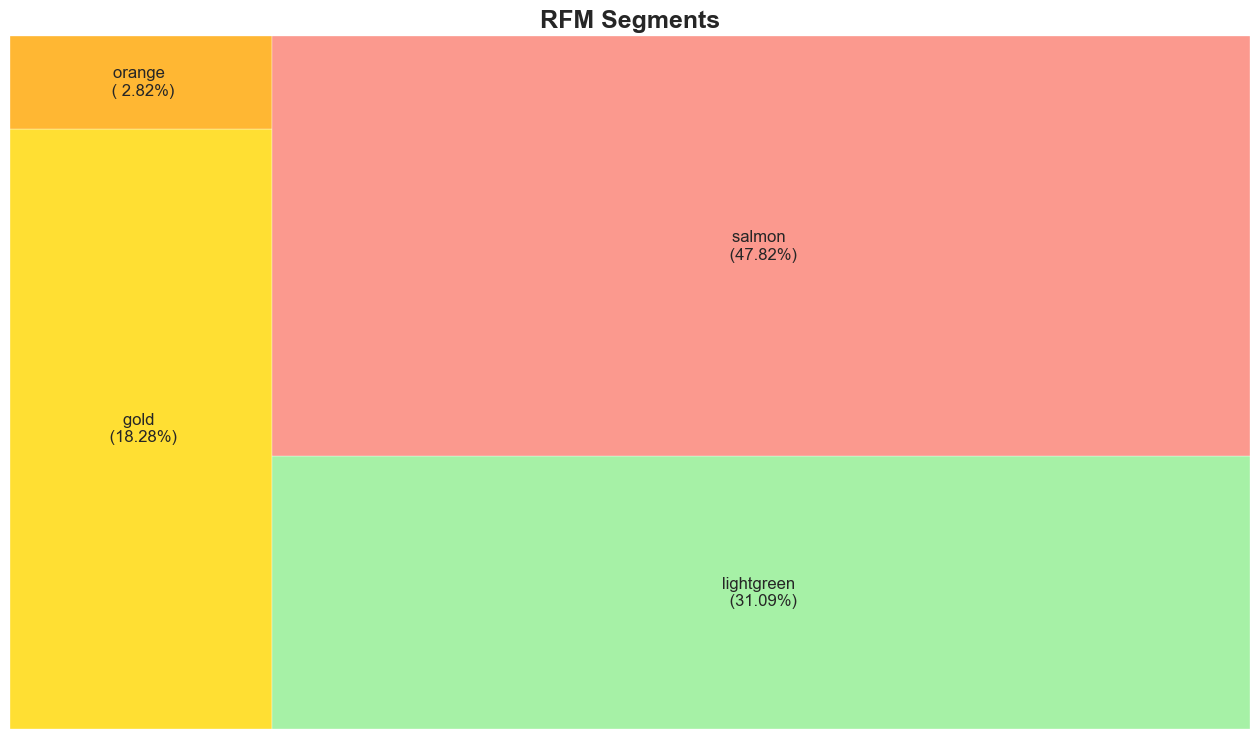

Log_rfm_Recency  Log_rfm_Frequency  Log_rfm_Monetry   count
gold                      4                  1                5  1584.0
orange                    5                  1                6   244.0
lightgreen                5                  1                6  2694.0
salmon                    6                  1                4  4144.0

In [69]:
 segmentation_clients(data_rfm_m2,datarfm_col_logm2,4)

# 3.2.6.3 Méthode 3

In [70]:
df_rfm_olist_clientsm3=df_olist_clients.groupby("customer_unique_id").agg(
                                                     {'rfm_Recency' : 'mean',
                                                       'rfm_Frequency': 'mean',
                                                       'rfm_Monetry' : 'mean'})

datarfm_col_sans_logm3=['rfm_Recency','rfm_Frequency','rfm_Monetry']

In [71]:
df_rfm_olist_clientsm3

rfm_Recency  rfm_Frequency  rfm_Monetry
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2        111.0            1.0       141.90
0000b849f77a49e4a4ce2b2a4ca5be3f        114.0            1.0        27.19
0000f46a3911fa3c0805444483337064        536.0            1.0        86.22
0000f6ccb0745a6a4b88665a16c9f078        320.0            1.0        43.62
0004aac84e0df4da2b147fca70cf8255        287.0            1.0       196.89
...                                       ...            ...          ...
fffb09418989a0dbff854a28163e47c6        254.0            1.0        73.16
fffea47cd6d3cc0a88bd621562a9d061        261.0            1.0        84.58
ffff371b4d645b6ecea244b27531430a        567.0            1.0       112.46
ffff5962728ec6157033ef9805bacc48        118.0            1.0       133.69
ffffd2657e2aad2907e67c3e9daecbeb        483.0            1.0        71.56

[86766 rows x 3 columns]

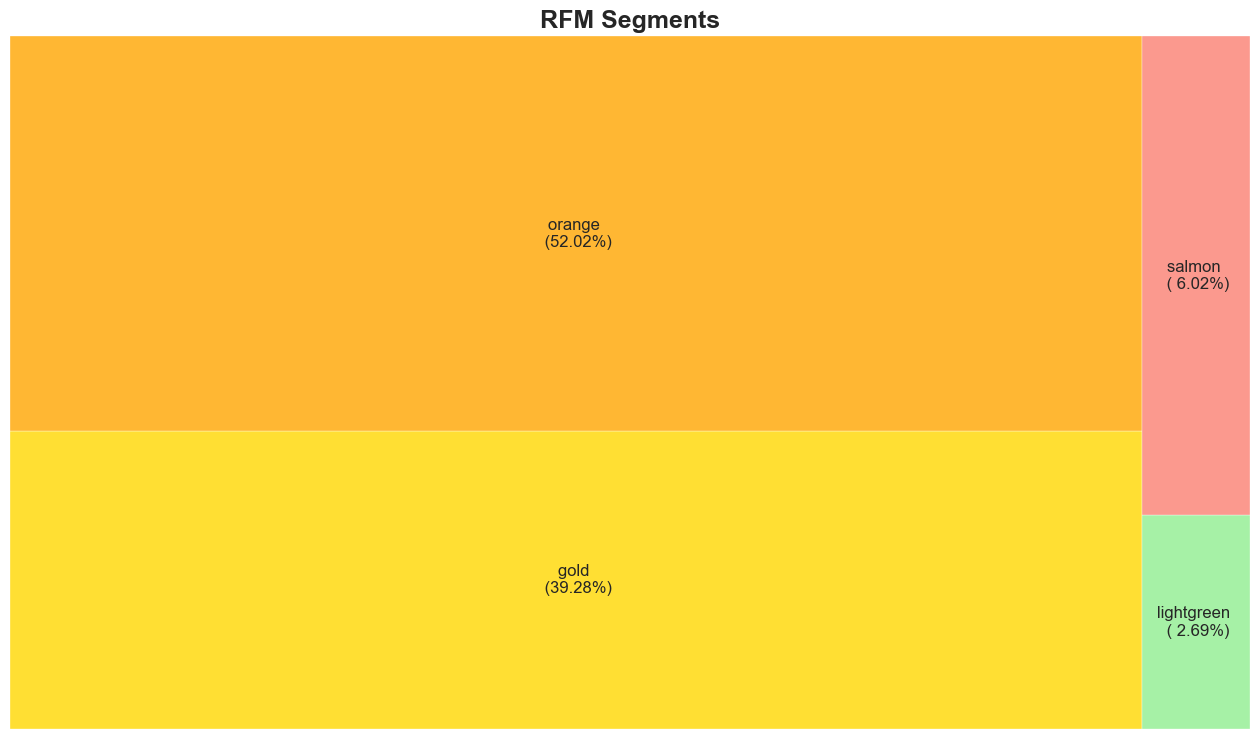

rfm_Recency  rfm_Frequency  rfm_Monetry    count
gold                380              1          132  34079.0
orange              127              1          131  45135.0
lightgreen          220              2          332   2330.0
salmon              226              1          813   5222.0

In [72]:
segmentation_clients(df_rfm_olist_clientsm3,datarfm_col_sans_logm3,4)

# 3.2.6.4 Méthode 4

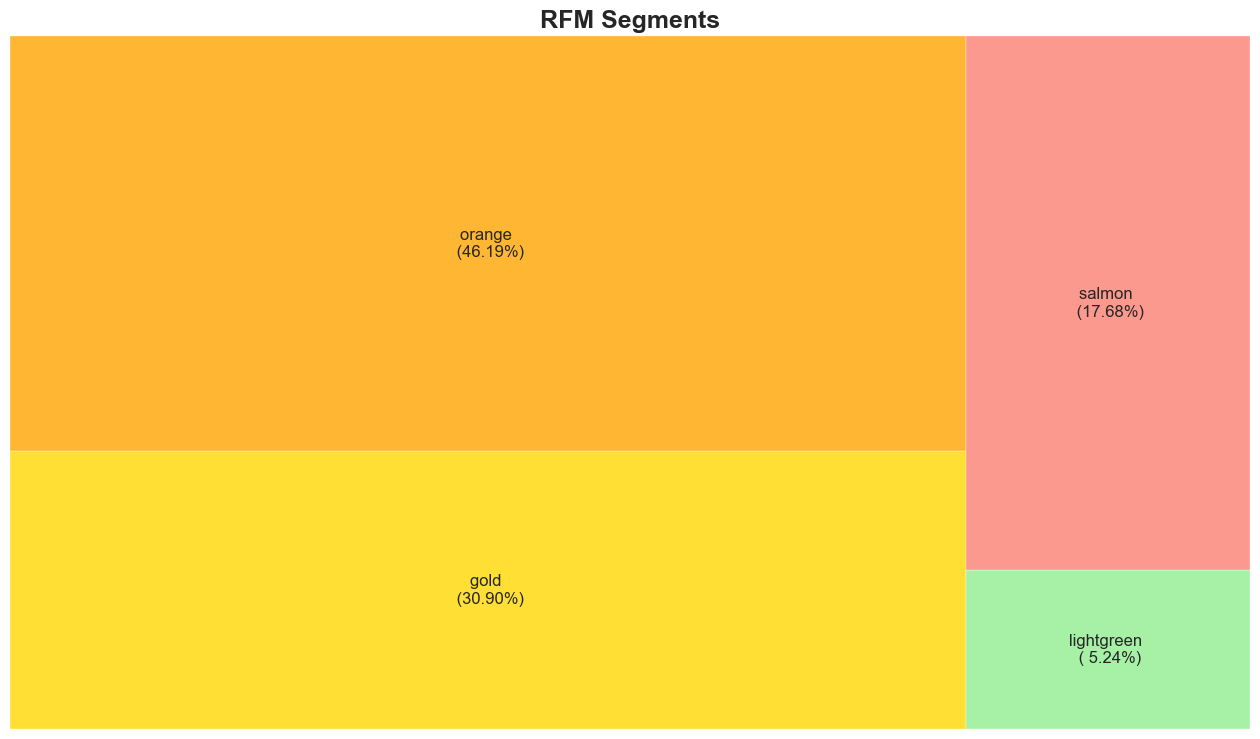

Log_rfm_Recency  Log_rfm_Frequency  Log_rfm_Monetry   count
gold                      5                  1                6  2746.0
orange                    6                  1                4  4105.0
lightgreen                5                  1                6   466.0
salmon                    4                  1                5  1571.0

In [73]:
segmentation_clients(df_feats_rfm_cluster,feats_rfm_cluster,4)

# **3.3 Segmentation des clients avec RFM  et Log_Satisfaction_score**

 - Réalisons une simulation avec une variable suplémentaire. Nous choisissons la variable **'review_mean_score'** correpondant à la moyenne des notation des clients, donc à leur satisfaction.


In [74]:
# selections des variables 
RFMreviewScore_feats=['customer_unique_id','Log_rfm_Recency','Log_rfm_Frequency','Log_rfm_Monetry','Log_Satisfaction_score']

In [75]:
data_RFMreviewScore=df_rfm_clients[RFMreviewScore_feats]
data_RFMreviewScore.set_index('customer_unique_id', inplace=True)

# 3.3.1 Standardisation de notre dataset

In [76]:
# Normaliser les données
X_RFMreviewScore,Y__RFMreviewScore=selection_features(df_rfm_clients,RFMreviewScore_feats)
X_rfm=scaler(X_RFMreviewScore)


# 3.3.2 Détermination du nombre de clusters optimal

In [77]:
feats_rfm_RS_cluster=['Log_rfm_Recency','Log_rfm_Frequency','Log_rfm_Monetry','Log_Satisfaction_score']
df_feats_rfm_RS_cluster=df_rfm_clients[feats_rfm_RS_cluster]

# 3.3.2.1 Méthode k-elbow

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


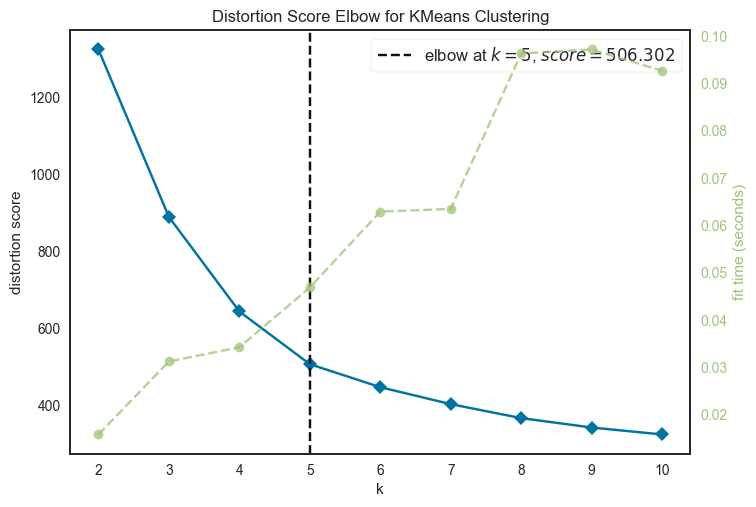

5

In [78]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_RS_cluster,'kelbowvisualizer',2,15)

# 3.3.2.2 Méthode silhouette

-Le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données.

Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation).

Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien et il est donc mal classé.

A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin et il est donc bien classé.

Le coefficient de silhouette est la moyenne du coefficient de silhouette pour tous les points.


3

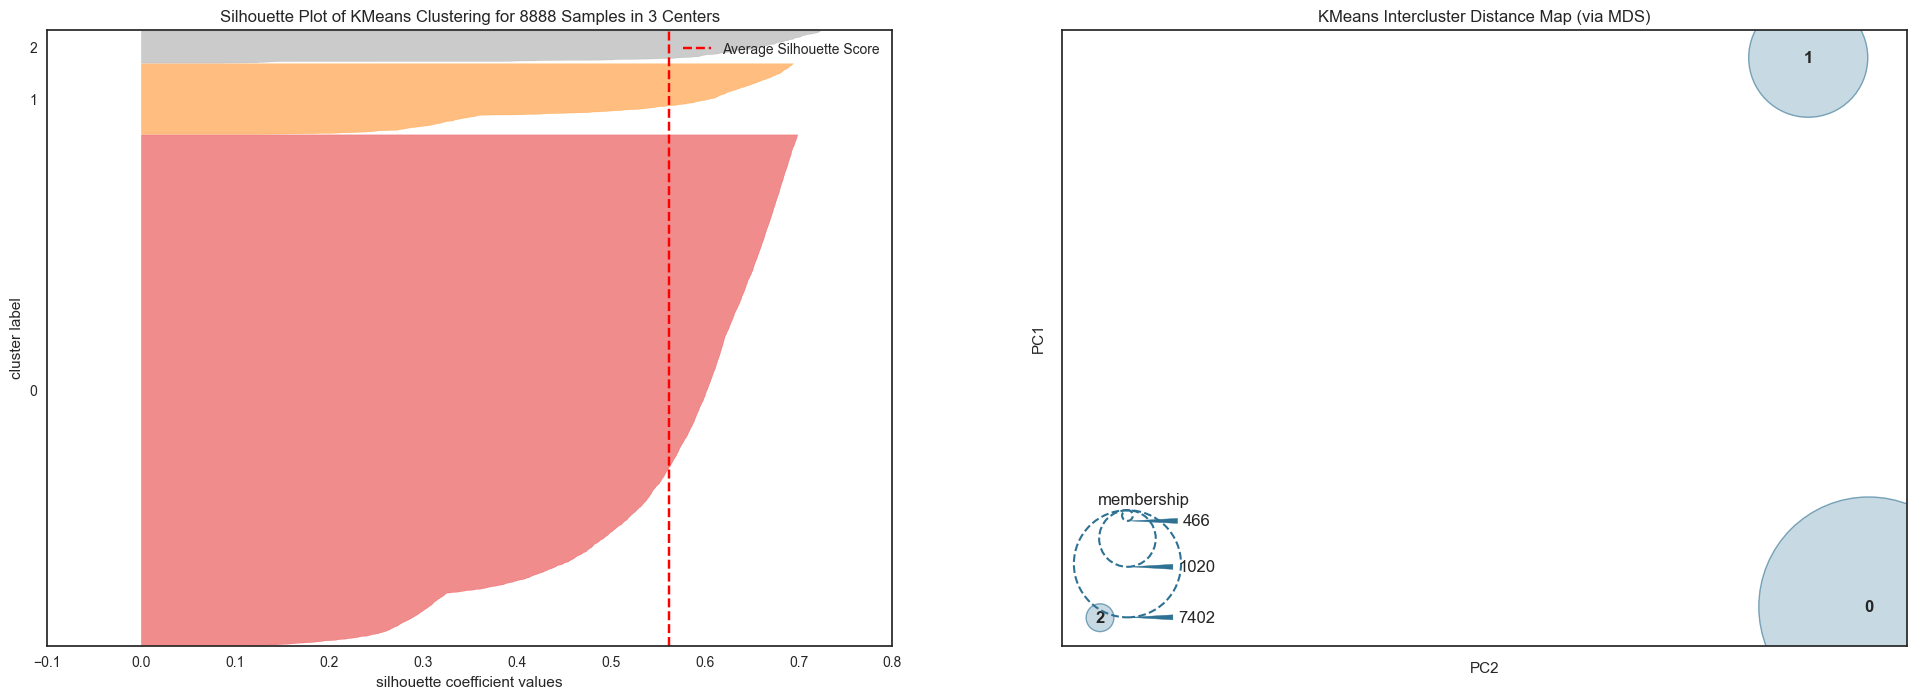

In [79]:
clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                features=feats_rfm_RS_cluster,
                data=df_feats_rfm_RS_cluster, 
                metric="silhouette",
                elbow=False,
                mds=True,
                KBest=3)

4

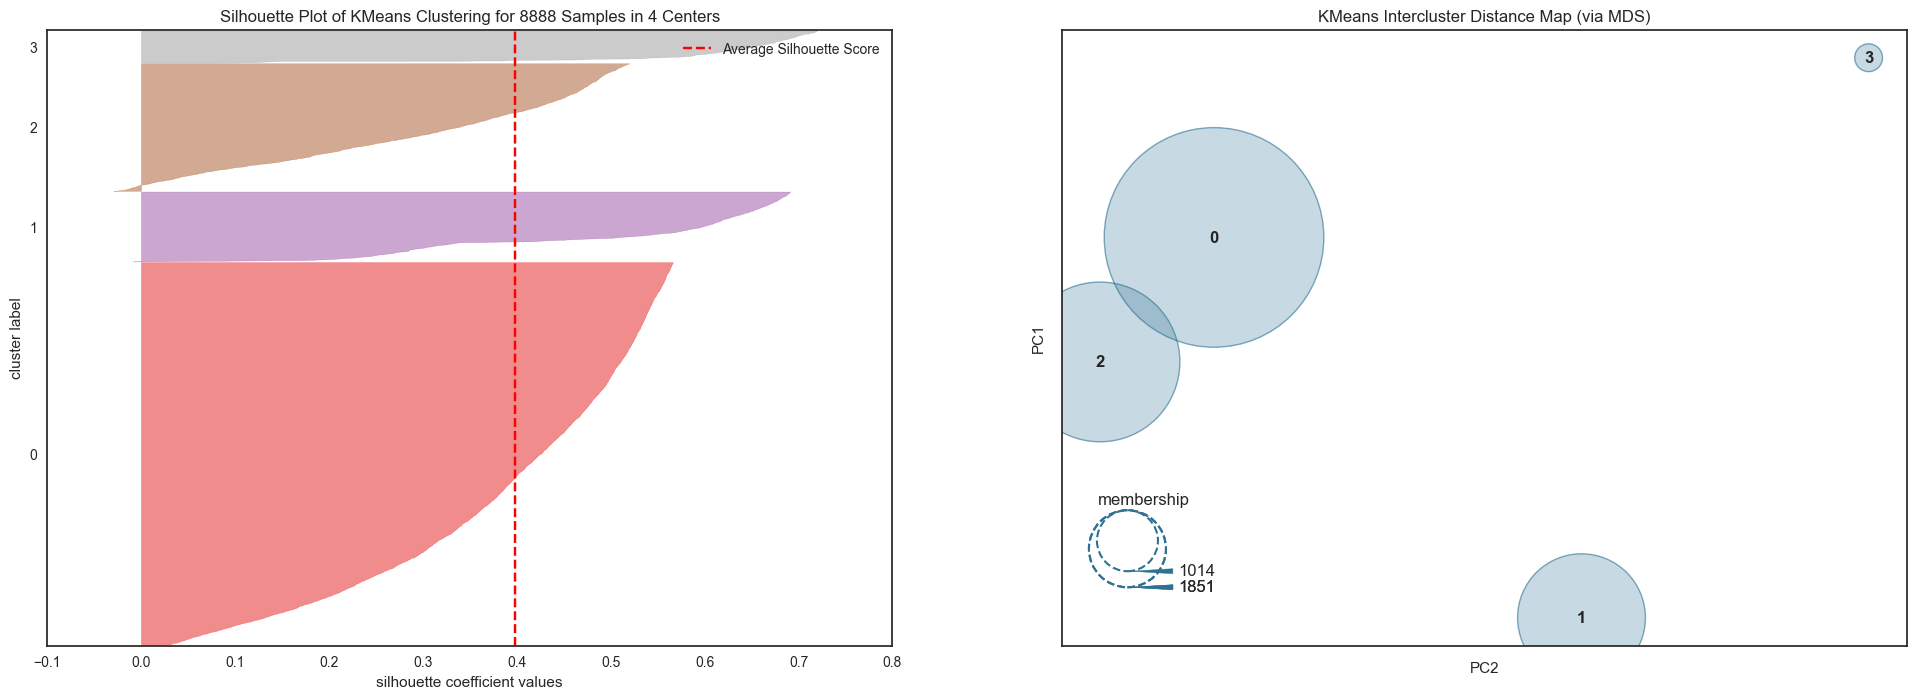

In [80]:
clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                features=feats_rfm_RS_cluster,
                data=df_feats_rfm_RS_cluster, 
                metric="silhouette",
                elbow=False,
                mds=True,
                KBest=4)

5

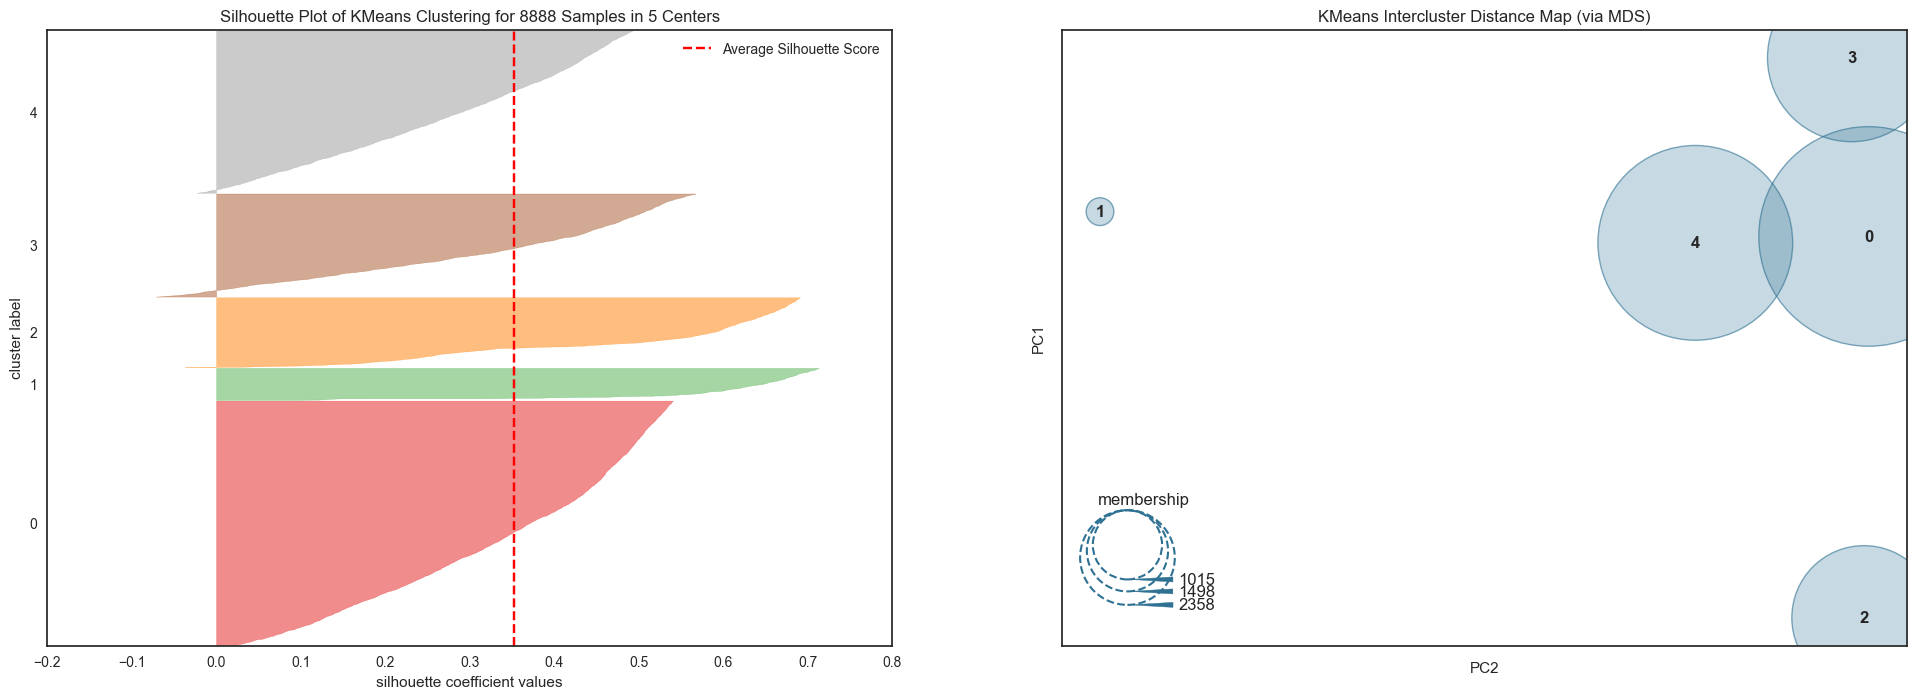

In [81]:
clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                features=feats_rfm_RS_cluster,
                data=df_feats_rfm_RS_cluster, 
                metric="silhouette",
                elbow=False,
                mds=True,
                KBest=5)

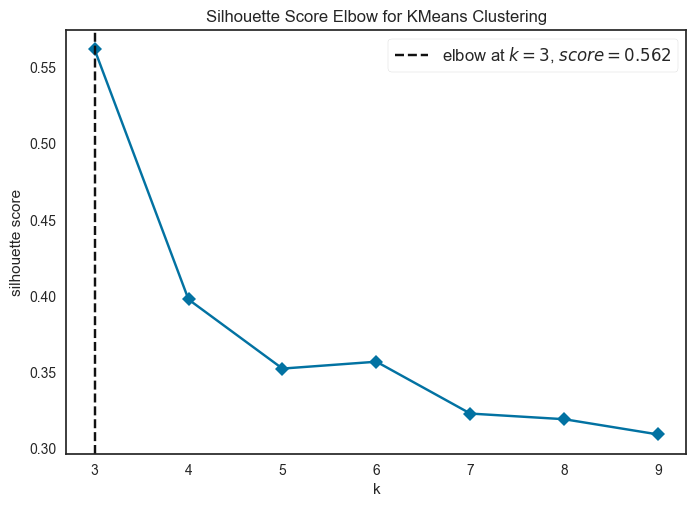

In [82]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_RS_cluster,'silhouette',3,10)

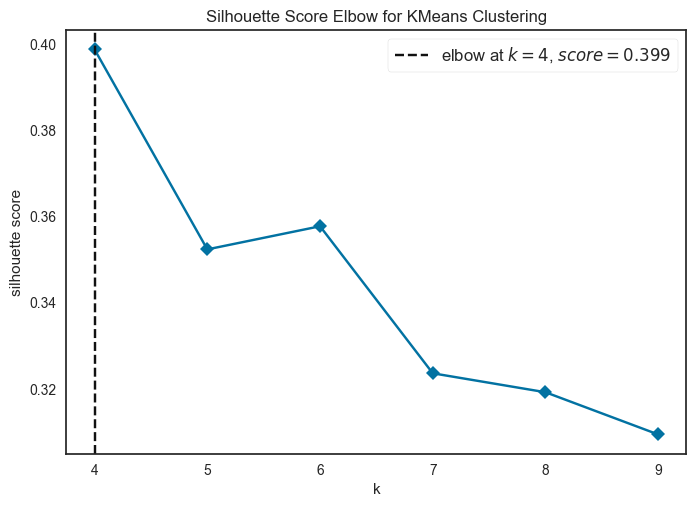

In [83]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_RS_cluster,'silhouette',4,10)

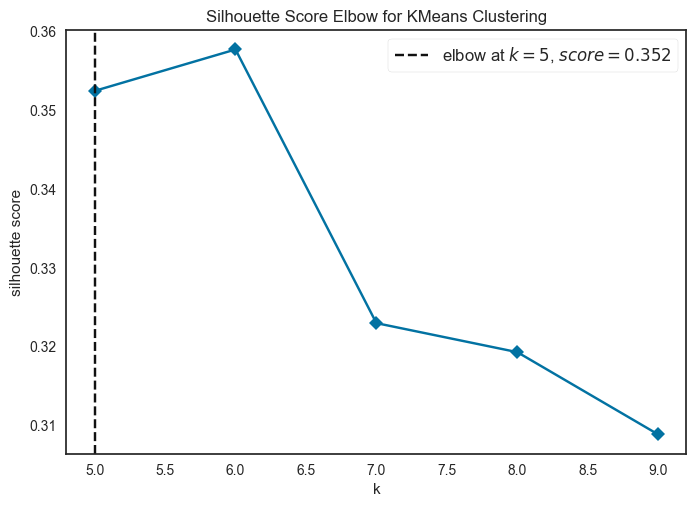

In [84]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_RS_cluster,'silhouette',5,10)

In [85]:
n_clusters = range(2, 11)
scores_RFMreview = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X_RFMreviewScore)
    labs = kmeans.labels_
    score_RFMreview= silhouette_score(X_RFMreviewScore, labs)
    scores_RFMreview.append(score_RFMreview)

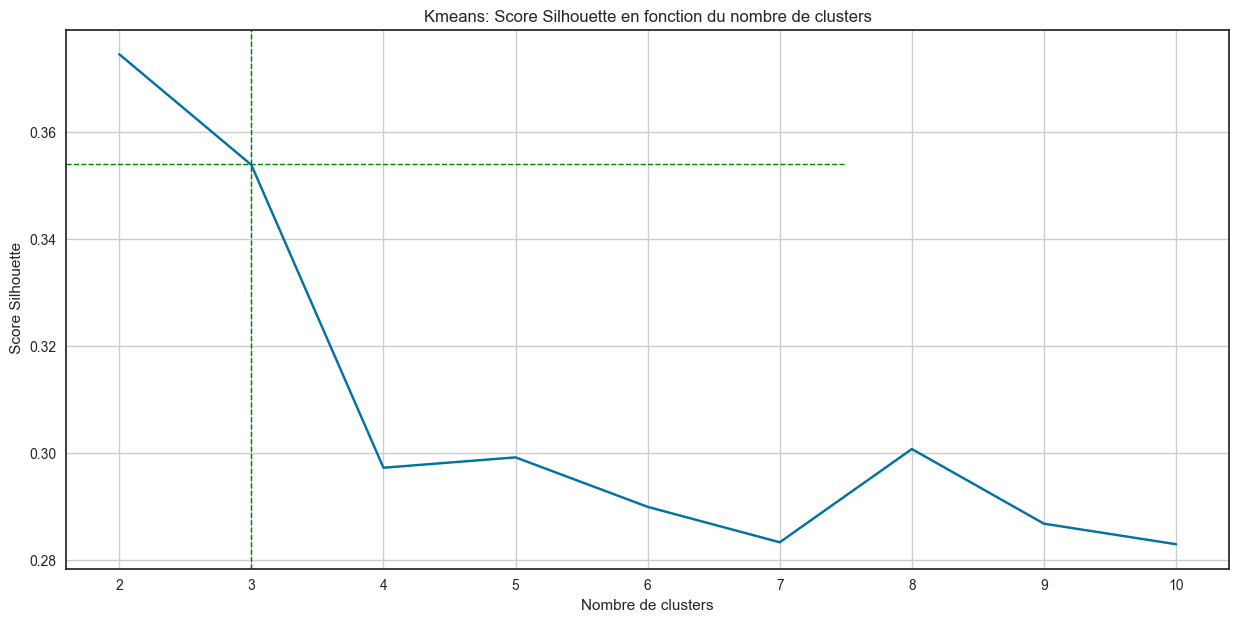

In [86]:
fig = plt.figure(figsize=[15, 7])
fig.patch.set_alpha(0.7)

plt.axhline(y=0.354, linestyle="--", 
            color="green",
            xmax=0.67,
            linewidth=1)
plt.axvline(x=3, linestyle="--", 
            color="green",
            ymax=1.48,
            linewidth=1)

plt.title("Kmeans: Score Silhouette en fonction du nombre de clusters")
plt.plot(n_clusters,scores_RFMreview)
plt.ylabel(" Score Silhouette")
plt.xlabel("Nombre de clusters")
plt.grid()

# 3.3.2.3 Méthode calinski_harabasz

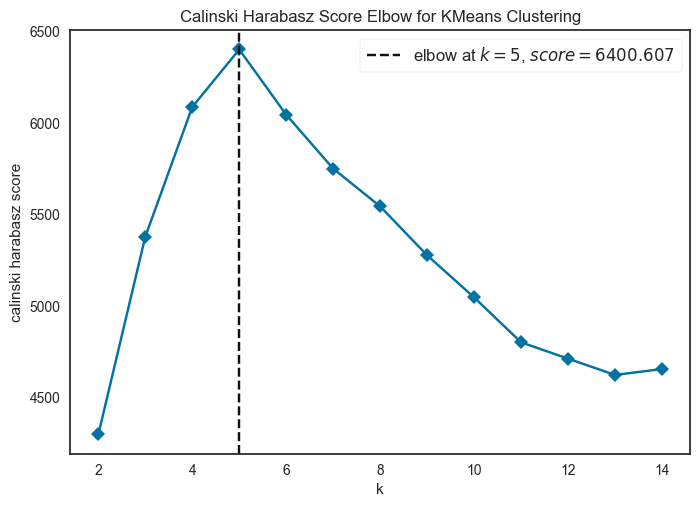

In [87]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_RS_cluster,'calinski_harabasz',2,15)

- **La méthode du coude donne k=5**
- **le coefficient de silhouette le nombre de k optimal serait 3.**
- **Méthode calinski_harabasz donne k=5**

# 3.3.3 Répartition des clients en clusters

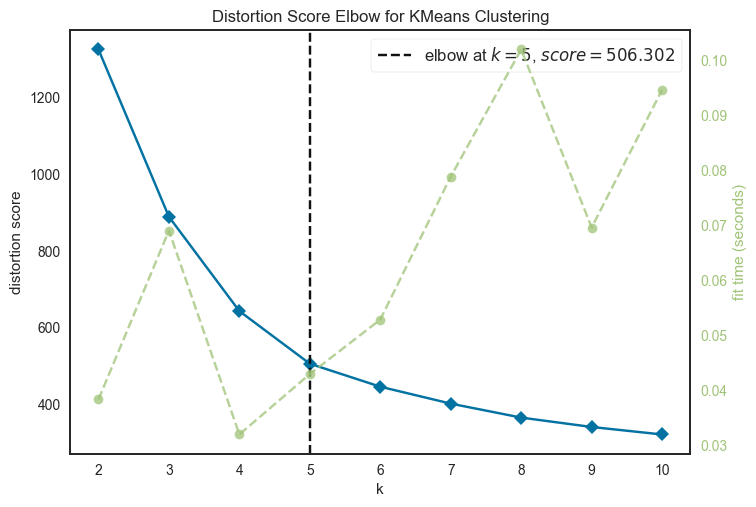

5

In [88]:
K_rfm_review_score =Nb_clustering(MinMaxScaler(),KMeans(),df_feats_rfm_RS_cluster,'kelbowvisualizer',2,15)
K_rfm_review_score

# 3.3.4 La projection des segments

le score est 4334.8491005115


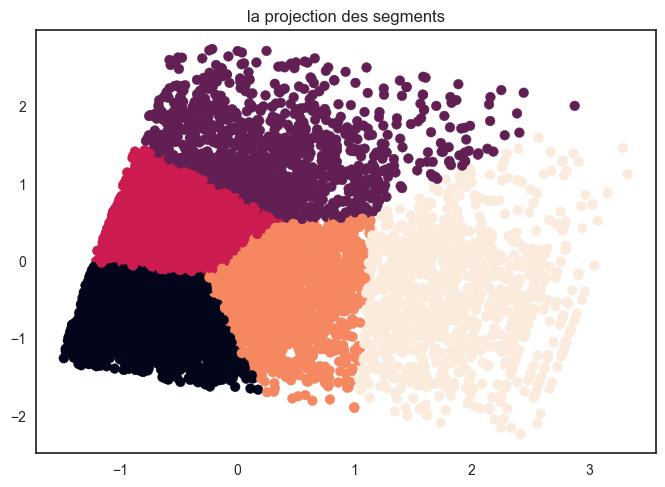

In [89]:
model_labels_rfm_review_score=clustering(X_RFMreviewScore,K_rfm_review_score,2)

# 3.3.5 Trouver le bon k (k-means) 

In [90]:
cluster_analysis_k_means(data_RFMreviewScore)

K  Silhouette  Davies-Bouldin
0   2    0.374902        1.126787
1   3    0.353976        0.973942
2   4    0.297261        1.089010
3   5    0.298411        1.029073
4   6    0.290949        1.027741
5   7    0.283367        1.040173
6   8    0.301991        0.983223
7   9    0.287309        1.001659
8  10    0.286020        1.022483

In [91]:
resultsRFMreviewScore = cluster_analysis_k_means(data_RFMreviewScore)
resultsRFMreviewScore = resultsRFMreviewScore.reset_index(drop=True)
resultsRFMreviewScore

K  Silhouette  Davies-Bouldin
0   2    0.374902        1.126787
1   3    0.353976        0.973942
2   4    0.297261        1.089010
3   5    0.298411        1.029073
4   6    0.290949        1.027741
5   7    0.283367        1.040173
6   8    0.301991        0.983223
7   9    0.287309        1.001659
8  10    0.286020        1.022483

In [92]:
k_means_RFMreviewScore = pd.DataFrame(resultsRFMreviewScore.iloc[1]).transpose()
k_means_RFMreviewScore.rename(index={1:'k-means : RFM_Review_Score'}, inplace=True)
k_means_RFMreviewScore

K  Silhouette  Davies-Bouldin
k-means : RFM_Review_Score  3.0    0.353976        0.973942

# 3.3.6 La répartition des clients par des clusters

# 3.3.6.1 Méthode 1

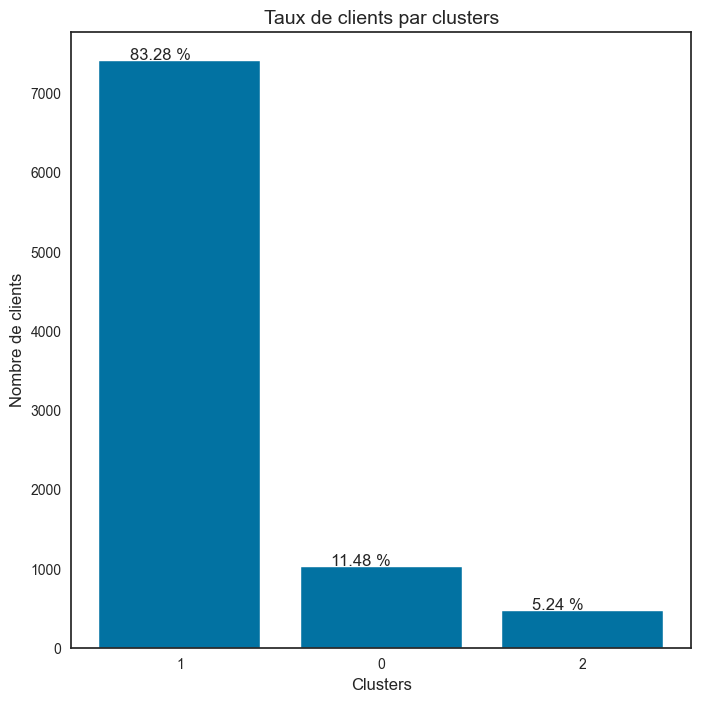

In [93]:
seg_kmeans_cl(3,df_feats_rfm_RS_cluster,feats_rfm_RS_cluster)

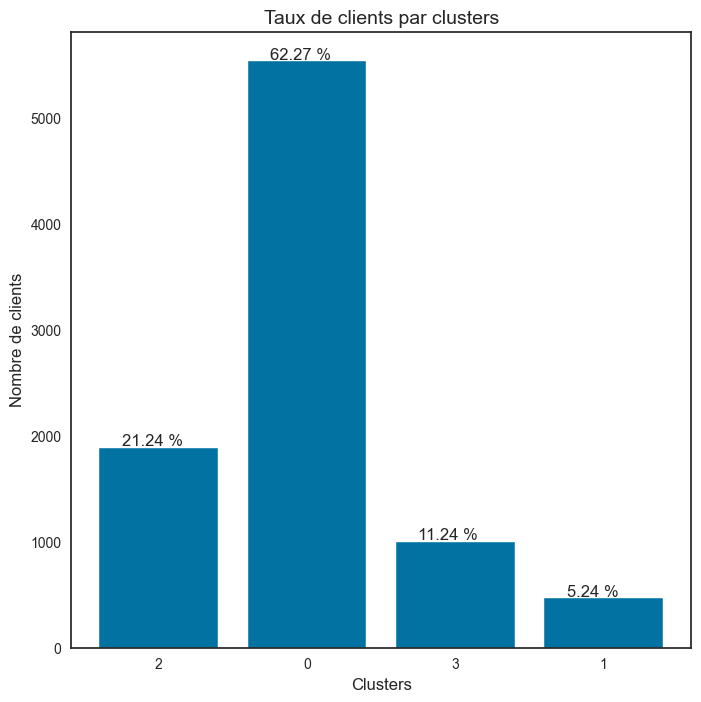

In [94]:
seg_kmeans_cl(4,df_feats_rfm_RS_cluster,feats_rfm_RS_cluster)

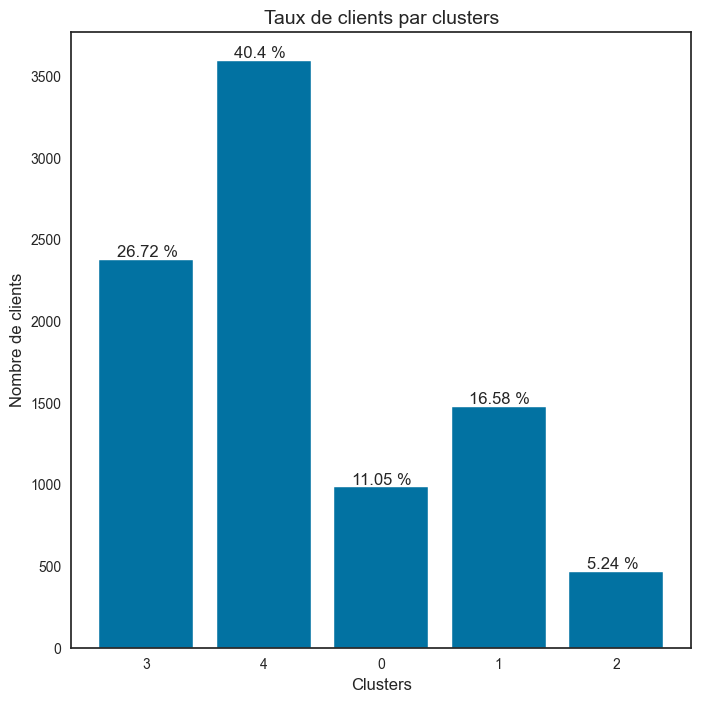

In [95]:
seg_kmeans_cl(5,df_feats_rfm_RS_cluster,feats_rfm_RS_cluster)

# 3.3.6.2 Méthode 2

In [96]:
data_rfm_sc_m2=df_rfm_clients.groupby("customer_unique_id").agg(
                                                     {'Log_rfm_Recency' : 'mean',
                                                       'Log_rfm_Frequency': 'mean',
                                                       'Log_rfm_Monetry' : 'mean',
                                                       'Log_Satisfaction_score':'mean',})
data_col_sc_logm2=['Log_rfm_Recency','Log_rfm_Frequency','Log_rfm_Monetry','Log_Satisfaction_score']

In [97]:
data_rfm_sc_m2

Log_rfm_Recency  Log_rfm_Frequency  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
0000f46a3911fa3c0805444483337064         6.285998           0.693147   
0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                           ...                ...   
195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

                                  Log_rfm_Monetry  Log_Satisfaction_score  
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2         4.962145                1.791759  
0000b849f77a49e4a4ce2b2a4ca5be3f         3.338967                1.609438  
0000f46a3911fa3c0805444483337064         4.468434                1.386294  
0000f6ccb0745a6a4b88665a16c9f078         3.798182                1.609438  
0004aac84e0df4da2b147fca70cf8255         5.287711                1.791759  
...                                           ...                     ...  
195bd2de4ad0dfec423973cc62dd77ad         3.776890                1.791759  
195cabf057d893ad407d1e5c97d25928         3.907613                1.791759  
195cc291330f73e3d35032fd4e8b740f         4.729509                1.791759  
195cf297219f91cb8ab3a8350a531217         3.338258                1.609438  
195d0b909914d00626d8794fb5a20eed         5.758397                1.098612  

[8666 rows x 4 columns]

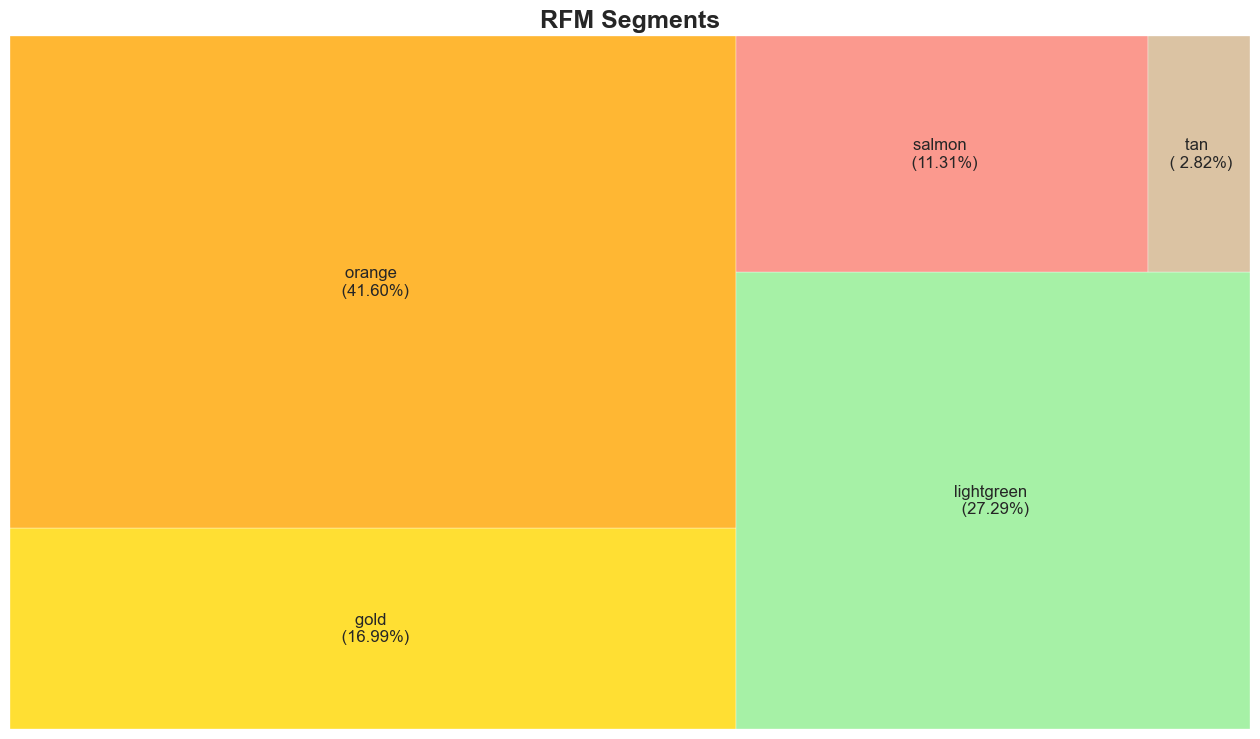

Log_rfm_Recency  Log_rfm_Frequency  Log_rfm_Monetry  \
gold                      4                  1                5   
orange                    6                  1                4   
lightgreen                5                  1                6   
salmon                    5                  1                5   
tan                       5                  1                6   

            Log_Satisfaction_score   count  
gold                             2  1472.0  
orange                           2  3605.0  
lightgreen                       2  2365.0  
salmon                           1   980.0  
tan                              2   244.0

In [98]:
segmentation_clients(data_rfm_sc_m2,data_col_sc_logm2,5)

# 3.3.6.3 Méthode 3

In [99]:
data_rfm_sc_m3=df_olist_clients.groupby("customer_unique_id").agg(
                                                     {'rfm_Recency' : 'mean',
                                                       'rfm_Frequency': 'mean',
                                                       'rfm_Monetry' : 'mean',
                                                       'Satisfaction_score':'mean',})
data_col_sc_logm3=['rfm_Recency','rfm_Frequency','rfm_Monetry','Satisfaction_score']

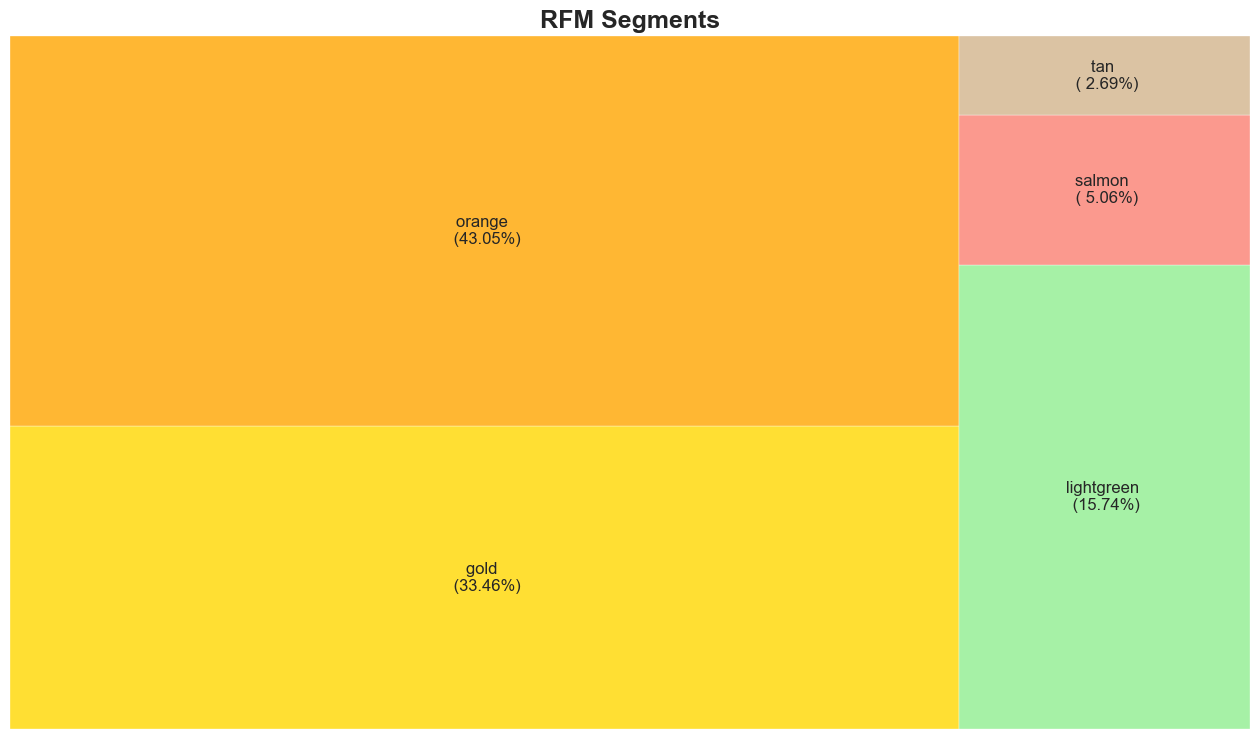

rfm_Recency  rfm_Frequency  rfm_Monetry  Satisfaction_score  \
gold                386              1          131                   5   
orange              122              1          131                   5   
lightgreen          226              1          158                   2   
salmon              231              1          865                   4   
tan                 220              2          332                   4   

              count  
gold        29035.0  
orange      37352.0  
lightgreen  13658.0  
salmon       4391.0  
tan          2330.0

In [100]:
segmentation_clients(data_rfm_sc_m3,data_col_sc_logm3,5)

# 3.3.6.4 Méthode 4

In [101]:
feats_rfm_RS_cluster


['Log_rfm_Recency',
 'Log_rfm_Frequency',
 'Log_rfm_Monetry',
 'Log_Satisfaction_score']

In [102]:
df_feats_rfm_RS_cluster

Log_rfm_Recency  Log_rfm_Frequency  Log_rfm_Monetry  \
0            4.718499           0.693147         4.962145   
1            4.744932           0.693147         3.338967   
2            6.285998           0.693147         4.468434   
3            5.771441           0.693147         3.798182   
4            5.662960           0.693147         5.287711   
...               ...                ...              ...   
8883         5.283204           0.693147         3.776890   
8884         5.135798           0.693147         3.907613   
8885         5.164786           0.693147         4.729509   
8886         5.407172           0.693147         3.338258   
8887         5.752573           0.693147         5.758397   

      Log_Satisfaction_score  
0                   1.791759  
1                   1.609438  
2                   1.386294  
3                   1.609438  
4                   1.791759  
...                      ...  
8883                1.791759  
8884                1.791759  
8885                1.791759  
8886                1.609438  
8887                1.098612  

[8888 rows x 4 columns]

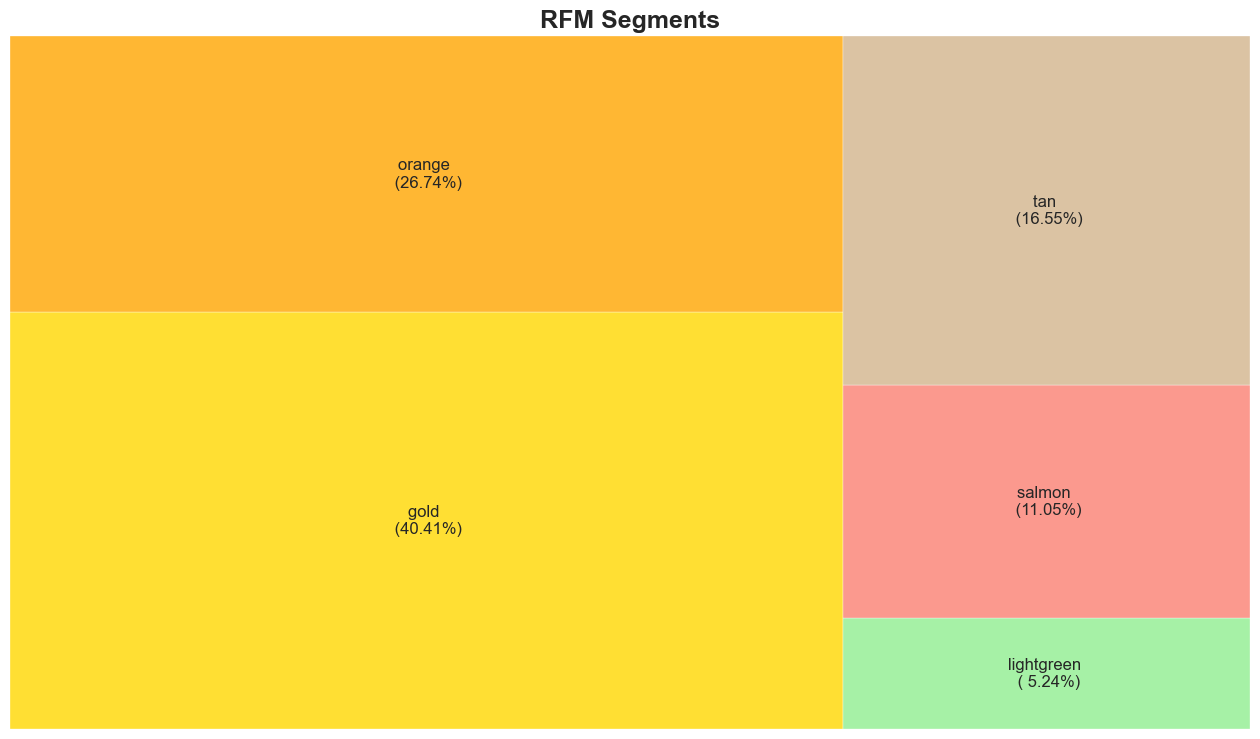

Log_rfm_Recency  Log_rfm_Frequency  Log_rfm_Monetry  \
gold                      6                  1                4   
orange                    5                  1                6   
lightgreen                5                  1                6   
salmon                    5                  1                5   
tan                       4                  1                5   

            Log_Satisfaction_score   count  
gold                             2  3592.0  
orange                           2  2377.0  
lightgreen                       2   466.0  
salmon                           1   982.0  
tan                              2  1471.0

In [103]:
segmentation_clients(df_feats_rfm_RS_cluster,feats_rfm_RS_cluster,5)

# 3.4 **Segmentation avec RFM et autres variables supplémentaires**

In [104]:
df_rfm_clients.columns

Index(['customer_unique_id', 'order_purchase_timestamp', 'Localisation',
       'categorie_produit', 'Log_rfm_Frequency', 'Log_rfm_Monetry',
       'Log_rfm_Recency', 'Log_Satisfaction_score', 'Log_Delai_de_livraison',
       'Log_Nombre_Article'],
      dtype='object')

In [105]:
rfm_feats=['customer_unique_id',
       'Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry',
       'Log_Satisfaction_score', 'Log_Delai_de_livraison',
       'Log_Nombre_Article']

In [106]:
data_rfm_feats=df_rfm_clients[rfm_feats]
data_rfm_feats.set_index('customer_unique_id', inplace=True)

# 3.4.1 Standardisation de notre dataset

In [107]:
# Normaliser les données
X_rfm_features,Y_rfm_features=selection_features(df_rfm_clients,rfm_feats)
X_rfm_features=scaler(X_rfm_features)

# 3.4.2 Détermination du nombre de clusters optimal

In [108]:
feats_cluster=['Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry','Log_Satisfaction_score',
                      'Log_Delai_de_livraison','Log_Nombre_Article']
df_feats_cluster=df_rfm_clients[feats_cluster]

# 3.4.2.1 Méthode k-elbow

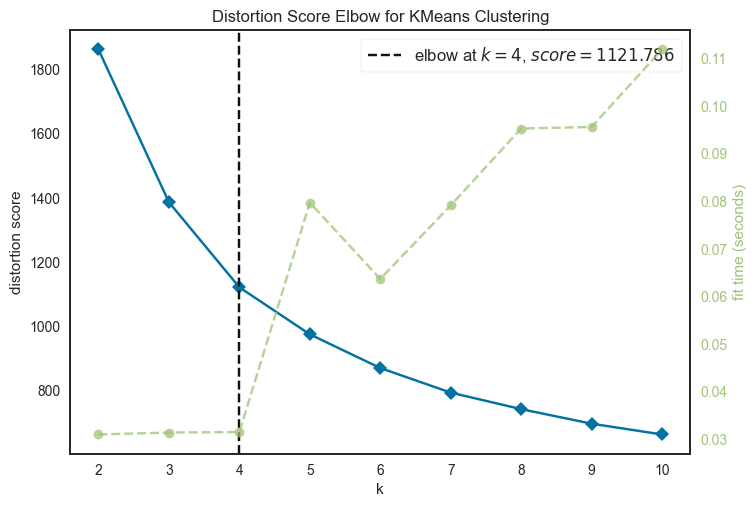

4

In [109]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_cluster,'kelbowvisualizer',2,15)

# 3.3.4.2 Méthode silhouette

3

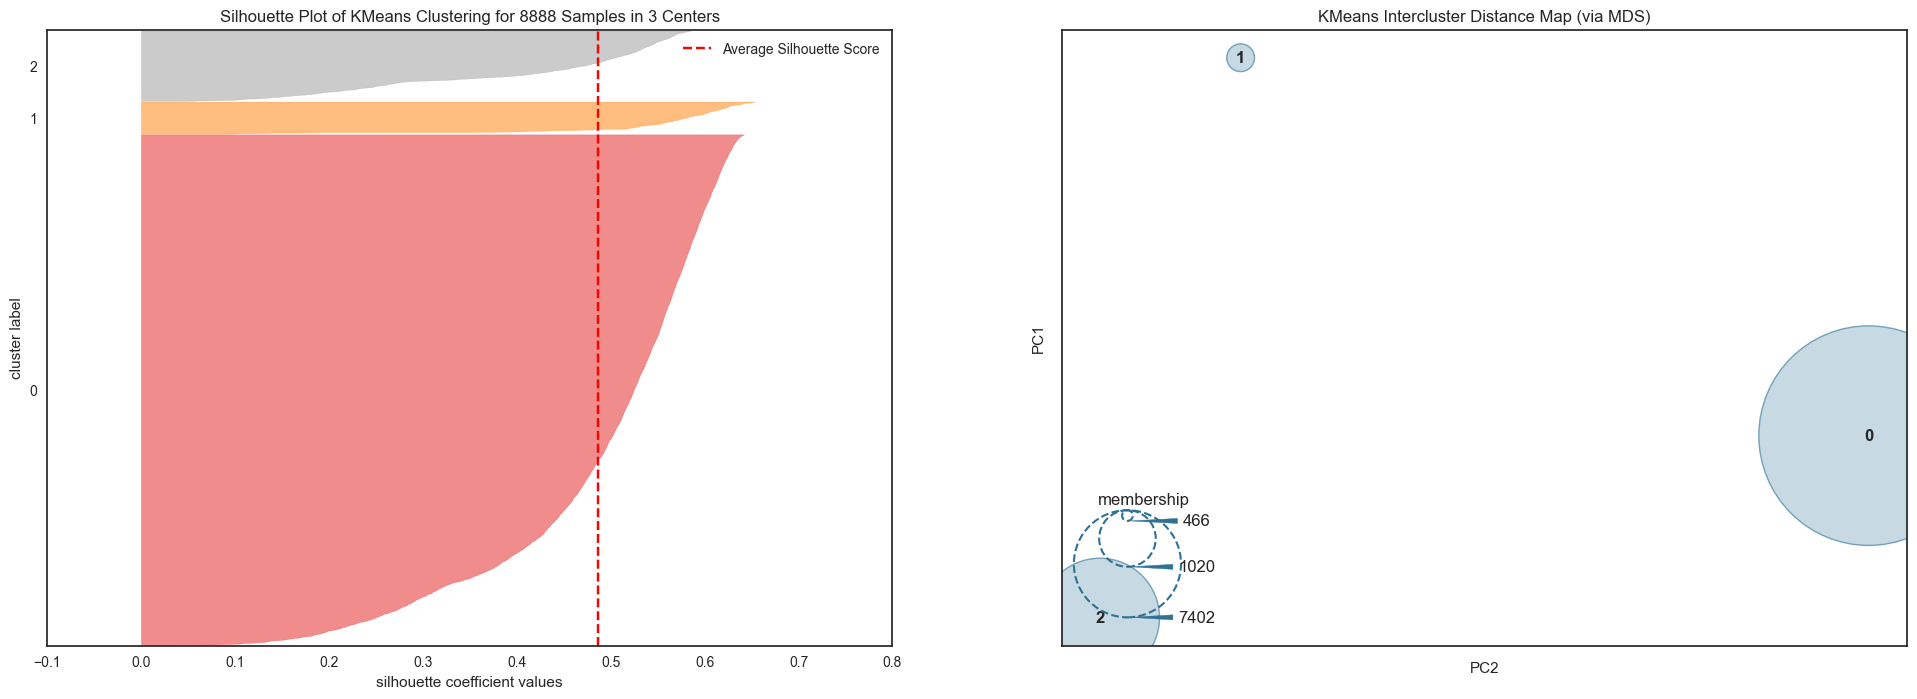

In [110]:
clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                features=feats_cluster,
                data=df_feats_cluster, 
                metric="silhouette",
                elbow=False,
                mds=True,
                KBest=3)

4

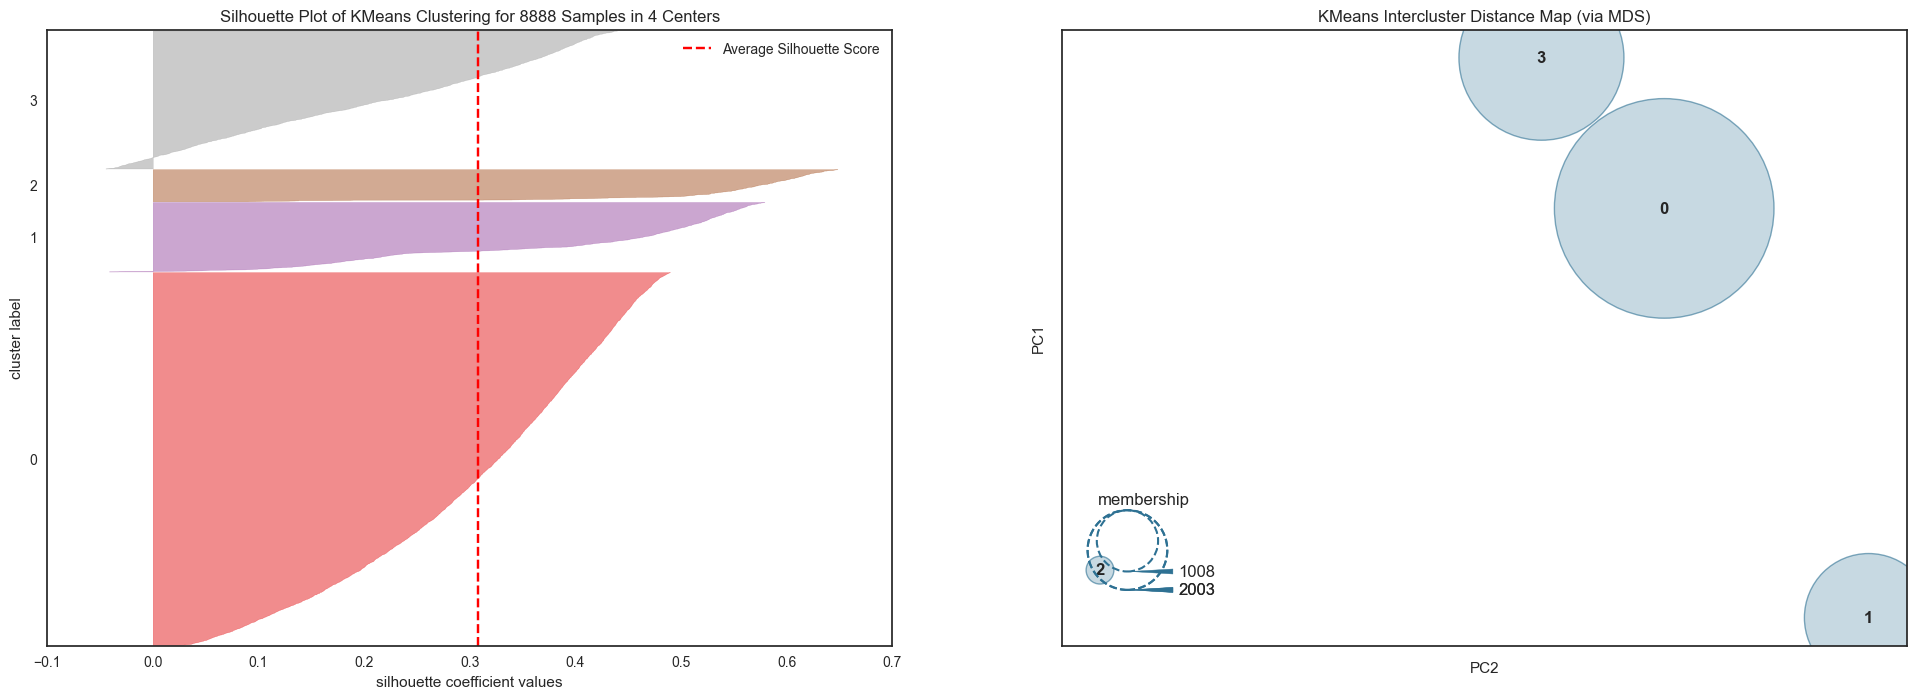

In [111]:
clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                features=feats_cluster,
                data=df_feats_cluster, 
                metric="silhouette",
                elbow=False,
                mds=True,
                KBest=4)

5

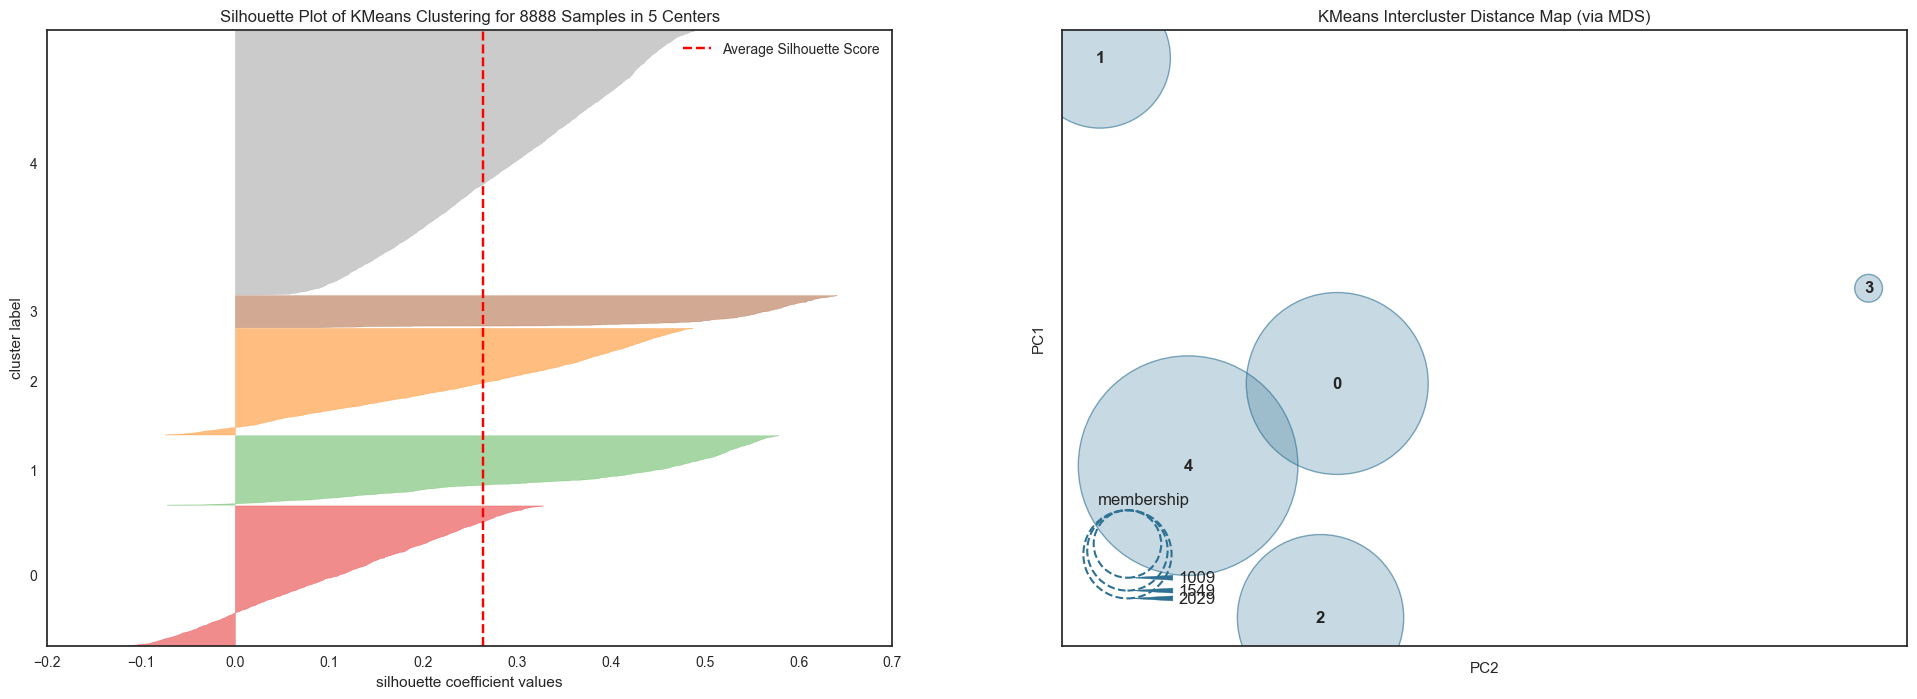

In [112]:
clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                features=feats_cluster,
                data=df_feats_cluster, 
                metric="silhouette",
                elbow=False,
                mds=True,
                KBest=5)

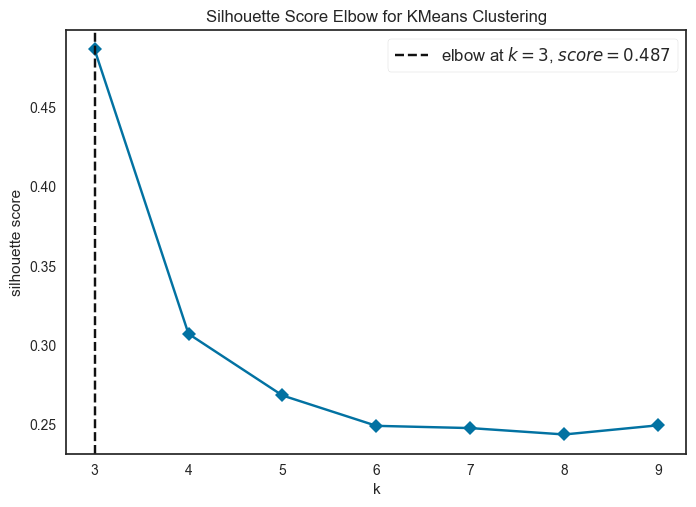

In [113]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_cluster,'silhouette',3,10)

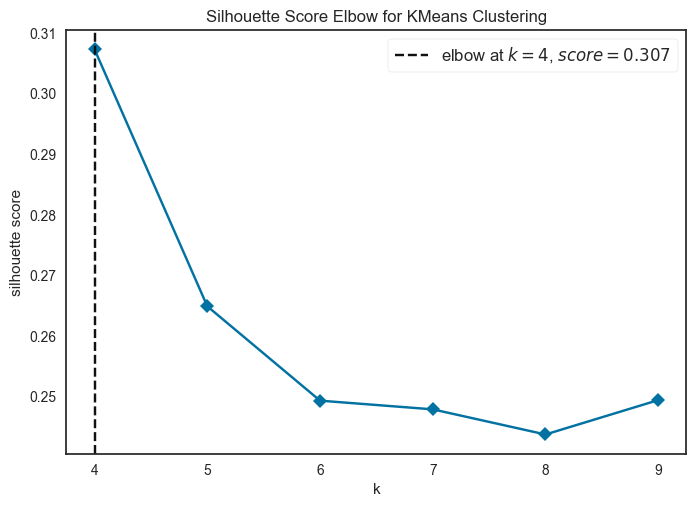

In [114]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_cluster,'silhouette',4,10)

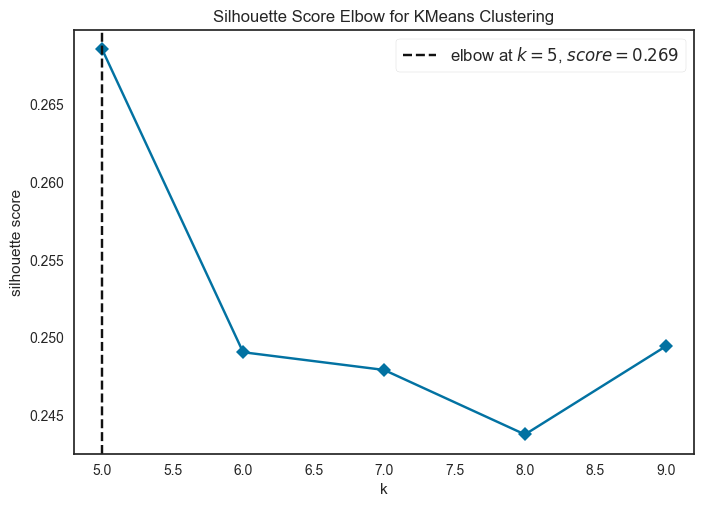

In [115]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_cluster,'silhouette',5,10)

In [116]:
n_clusters = range(2, 11)
scores_features = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X_rfm_features)
    labs = kmeans.labels_
    score_feats = silhouette_score(X_rfm_features, labs)
    scores_features.append(score_feats)

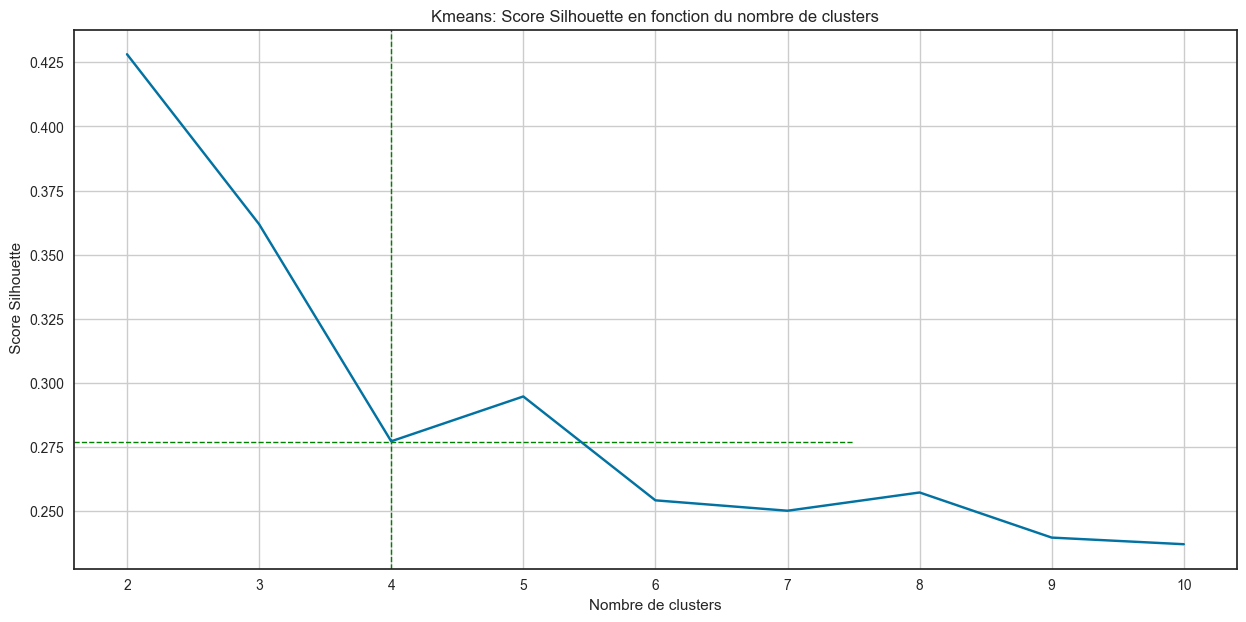

In [117]:
fig = plt.figure(figsize=[15, 7])
fig.patch.set_alpha(0.7)

plt.axhline(y=0.277, linestyle="--", 
            color="green",
            xmax=0.67,
            linewidth=1)
plt.axvline(x=4, linestyle="--", 
            color="green",
            ymax=1.48,
            linewidth=1)

plt.title("Kmeans: Score Silhouette en fonction du nombre de clusters")
plt.plot(n_clusters, scores_features)
plt.ylabel(" Score Silhouette")
plt.xlabel("Nombre de clusters")
plt.grid()

# 3.3.4.3 Méthode calinski_harabasz

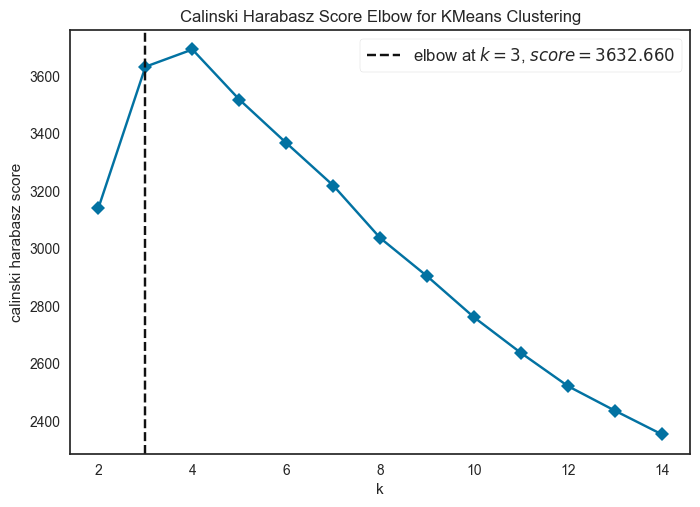

In [118]:
Nb_clustering(MinMaxScaler(),KMeans(),df_feats_cluster,'calinski_harabasz',2,15)

- **La méthode du coude donne k=4**
- **Le coefficient de silhouette le nombre de k optimal serait 3**
- **Méthode calinski_harabasz donne k=3**

# 3.4.3 Répartition des clients en clusters

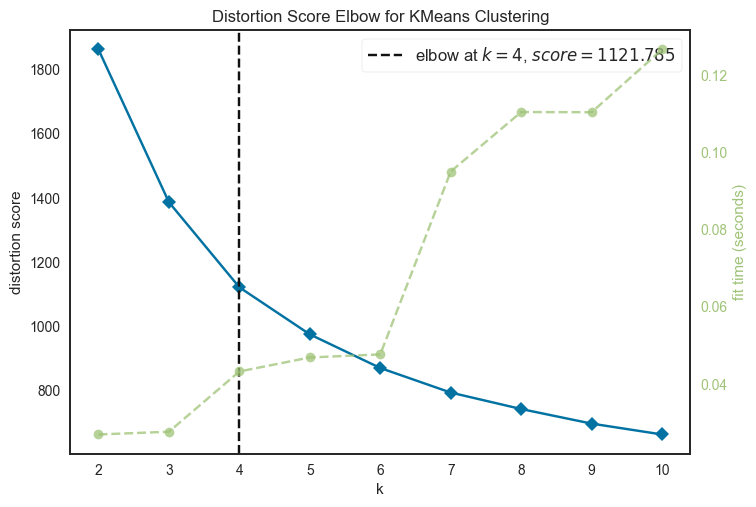

4

In [119]:
K_rfm_features =Nb_clustering(MinMaxScaler(),KMeans(),df_feats_cluster,'kelbowvisualizer',2,15)
K_rfm_features

# 3.4.4 La projection des segments

le score est 28743.527121624134


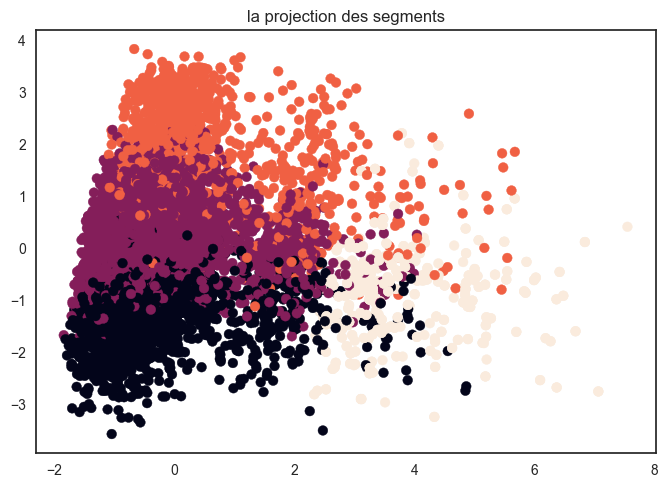

In [120]:
model_labels_rfm_review_score=clustering(X_rfm_features,K_rfm_features,2)

# 3.4.5 Trouver le bon k (k-means)

In [121]:
cluster_analysis_k_means(data_rfm_feats)

K  Silhouette  Davies-Bouldin
0   2    0.313074        1.337037
1   3    0.277354        1.231855
2   4    0.219382        1.369908
3   5    0.218080        1.307496
4   6    0.213276        1.284192
5   7    0.211308        1.252125
6   8    0.208796        1.243879
7   9    0.203459        1.240023
8  10    0.202155        1.274131

In [122]:
resultsRFM_feats = cluster_analysis_k_means(data_rfm_feats)
resultsRFM_feats  = resultsRFM_feats.reset_index(drop=True)
resultsRFM_feats 

K  Silhouette  Davies-Bouldin
0   2    0.313074        1.337037
1   3    0.277354        1.231855
2   4    0.219382        1.369908
3   5    0.218080        1.307496
4   6    0.213276        1.284192
5   7    0.211308        1.252125
6   8    0.208796        1.243879
7   9    0.203459        1.240023
8  10    0.202155        1.274131

In [123]:
k_means_RFM_feats = pd.DataFrame(resultsRFM_feats.iloc[1]).transpose()
k_means_RFM_feats.rename(index={1:'k-means : RFM_Features'}, inplace=True)
k_means_RFM_feats 

K  Silhouette  Davies-Bouldin
k-means : RFM_Features  3.0    0.277354        1.231855

# 3.4.6 La répartition des clients par des clusters

# 3.4.6.1 Méthode 1

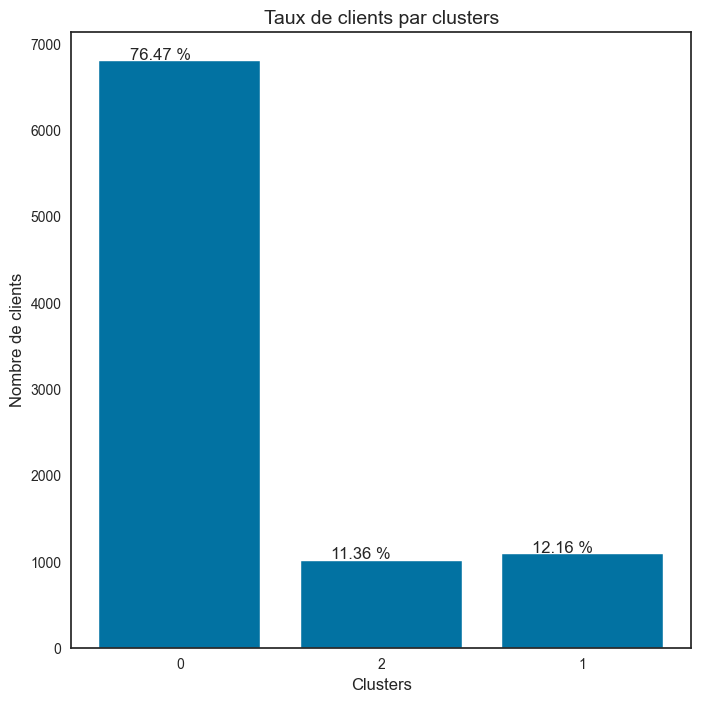

In [124]:
seg_kmeans_cl(3,df_feats_cluster,feats_cluster)

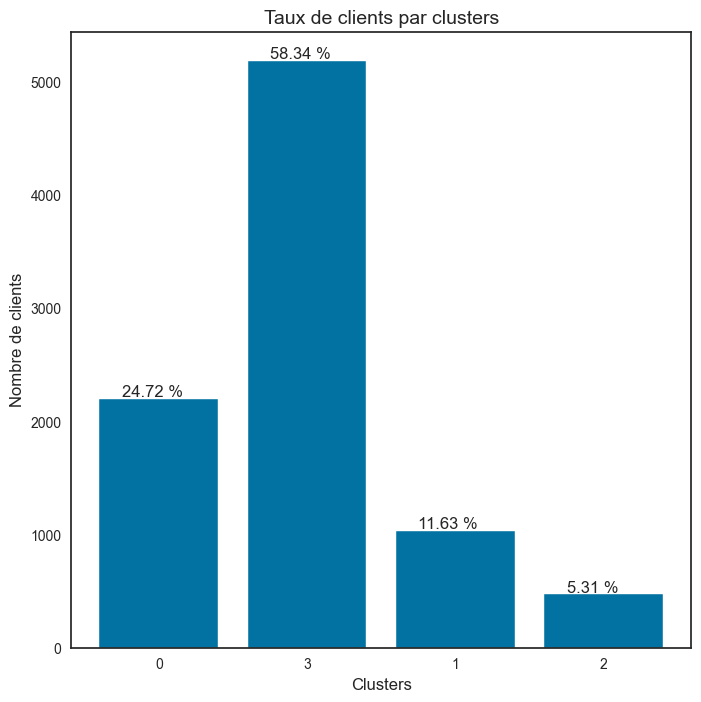

In [125]:
seg_kmeans_cl(4,df_feats_cluster,feats_cluster)

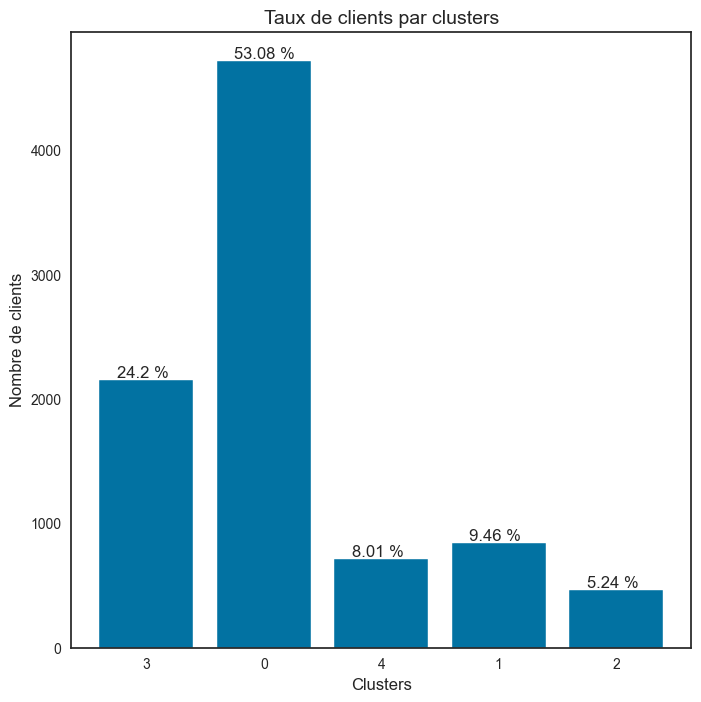

In [126]:
seg_kmeans_cl(5,df_feats_cluster,feats_cluster)

# 3.4.6.2 Méthode 2

In [127]:
data_rfm_features_m2=df_rfm_clients.groupby("customer_unique_id").agg(
                                                     {'Log_rfm_Recency' : 'mean',
                                                       'Log_rfm_Frequency': 'mean',
                                                       'Log_rfm_Monetry' : 'mean',
                                                       'Log_Satisfaction_score':'mean',
                                                      'Log_Delai_de_livraison':'mean',
                                                       'Log_Nombre_Article':'mean',       
                                                     })


feats_cluster_log=['Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry','Log_Satisfaction_score',
                      'Log_Delai_de_livraison','Log_Nombre_Article']


In [128]:
data_rfm_features_m2

Log_rfm_Recency  Log_rfm_Frequency  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
0000f46a3911fa3c0805444483337064         6.285998           0.693147   
0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                           ...                ...   
195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

                                  Log_rfm_Monetry  Log_Satisfaction_score  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2         4.962145                1.791759   
0000b849f77a49e4a4ce2b2a4ca5be3f         3.338967                1.609438   
0000f46a3911fa3c0805444483337064         4.468434                1.386294   
0000f6ccb0745a6a4b88665a16c9f078         3.798182                1.609438   
0004aac84e0df4da2b147fca70cf8255         5.287711                1.791759   
...                                           ...                     ...   
195bd2de4ad0dfec423973cc62dd77ad         3.776890                1.791759   
195cabf057d893ad407d1e5c97d25928         3.907613                1.791759   
195cc291330f73e3d35032fd4e8b740f         4.729509                1.791759   
195cf297219f91cb8ab3a8350a531217         3.338258                1.609438   
195d0b909914d00626d8794fb5a20eed         5.758397                1.098612   

                                  Log_Delai_de_livraison  Log_Nombre_Article  
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2                1.945910            0.693147  
0000b849f77a49e4a4ce2b2a4ca5be3f                1.386294            0.693147  
0000f46a3911fa3c0805444483337064                3.258097            0.693147  
0000f6ccb0745a6a4b88665a16c9f078                3.044522            0.693147  
0004aac84e0df4da2b147fca70cf8255                2.639057            0.693147  
...                                                  ...                 ...  
195bd2de4ad0dfec423973cc62dd77ad                1.386294            0.693147  
195cabf057d893ad407d1e5c97d25928                2.833213            0.693147  
195cc291330f73e3d35032fd4e8b740f                2.708050            0.693147  
195cf297219f91cb8ab3a8350a531217                1.386294            0.693147  
195d0b909914d00626d8794fb5a20eed                2.944439            0.693147  

[8666 rows x 6 columns]

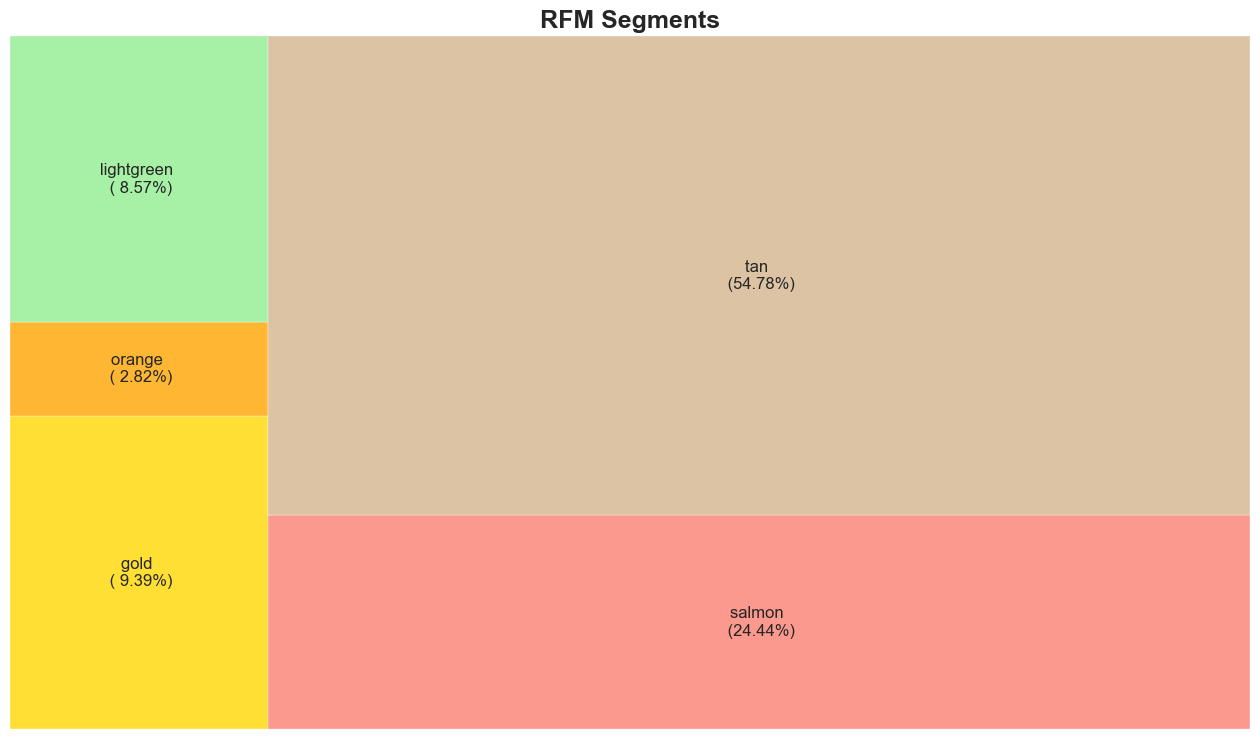

Log_rfm_Recency  Log_rfm_Frequency  Log_rfm_Monetry  \
gold                      5                  1                5   
orange                    5                  1                6   
lightgreen                5                  1                6   
salmon                    4                  1                5   
tan                       6                  1                5   

            Log_Satisfaction_score  Log_Delai_de_livraison  \
gold                             1                       3   
orange                           2                       2   
lightgreen                       1                       2   
salmon                           2                       2   
tan                              2                       3   

            Log_Nombre_Article   count  
gold                         1   814.0  
orange                       1   244.0  
lightgreen                   1   743.0  
salmon                       1  2118.0  
tan                          1  4747.0

In [129]:
segmentation_clients(data_rfm_features_m2,feats_cluster_log,5)

# 3.4.6.3 Méthode 3

In [130]:
data_rfm_features_m3=df_olist_clients.groupby("customer_unique_id").agg(
                                                     {'rfm_Recency' : 'mean',
                                                       'rfm_Frequency': 'mean',
                                                       'rfm_Monetry' : 'mean',
                                                       'Satisfaction_score':'mean',
                                                      'Delai_de_livraison':'mean',
                                                       'Nombre_Article':'mean',       
                                                     })


feats_clusterm3=['rfm_Recency', 'rfm_Frequency', 'rfm_Monetry','Satisfaction_score',
                      'Delai_de_livraison','Nombre_Article']

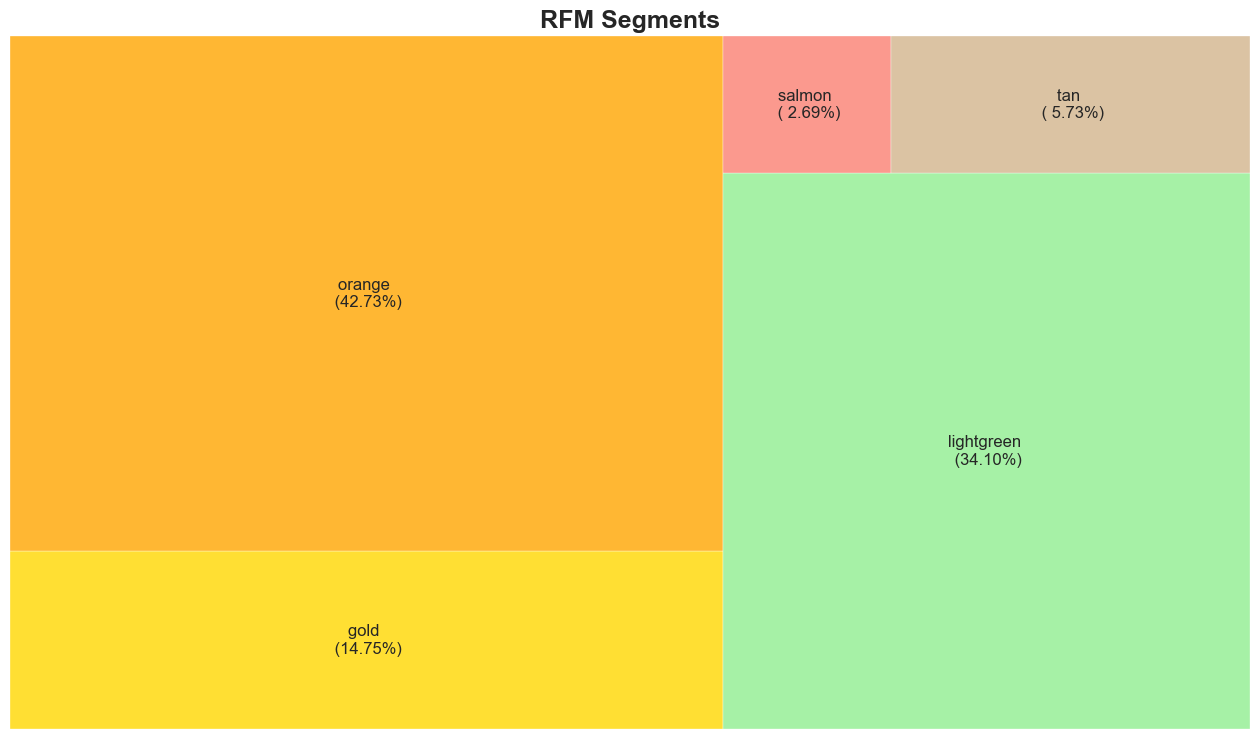

rfm_Recency  rfm_Frequency  rfm_Monetry  Satisfaction_score  \
gold                230              1          158                   2   
orange              121              1          131                   5   
lightgreen          382              1          134                   5   
salmon              220              2          332                   4   
tan                 228              1          766                   4   

            Delai_de_livraison  Nombre_Article    count  
gold                        20               1  12798.0  
orange                       9               1  37079.0  
lightgreen                  11               1  29591.0  
salmon                      12               3   2330.0  
tan                         11               4   4968.0

In [131]:
segmentation_clients(data_rfm_features_m3,feats_clusterm3,5)

# 3.4.6.4 Méthode 4

In [132]:
df_feats_cluster

Log_rfm_Recency  Log_rfm_Frequency  Log_rfm_Monetry  \
0            4.718499           0.693147         4.962145   
1            4.744932           0.693147         3.338967   
2            6.285998           0.693147         4.468434   
3            5.771441           0.693147         3.798182   
4            5.662960           0.693147         5.287711   
...               ...                ...              ...   
8883         5.283204           0.693147         3.776890   
8884         5.135798           0.693147         3.907613   
8885         5.164786           0.693147         4.729509   
8886         5.407172           0.693147         3.338258   
8887         5.752573           0.693147         5.758397   

      Log_Satisfaction_score  Log_Delai_de_livraison  Log_Nombre_Article  
0                   1.791759                1.945910            0.693147  
1                   1.609438                1.386294            0.693147  
2                   1.386294                3.258097            0.693147  
3                   1.609438                3.044522            0.693147  
4                   1.791759                2.639057            0.693147  
...                      ...                     ...                 ...  
8883                1.791759                1.386294            0.693147  
8884                1.791759                2.833213            0.693147  
8885                1.791759                2.708050            0.693147  
8886                1.609438                1.386294            0.693147  
8887                1.098612                2.944439            0.693147  

[8888 rows x 6 columns]

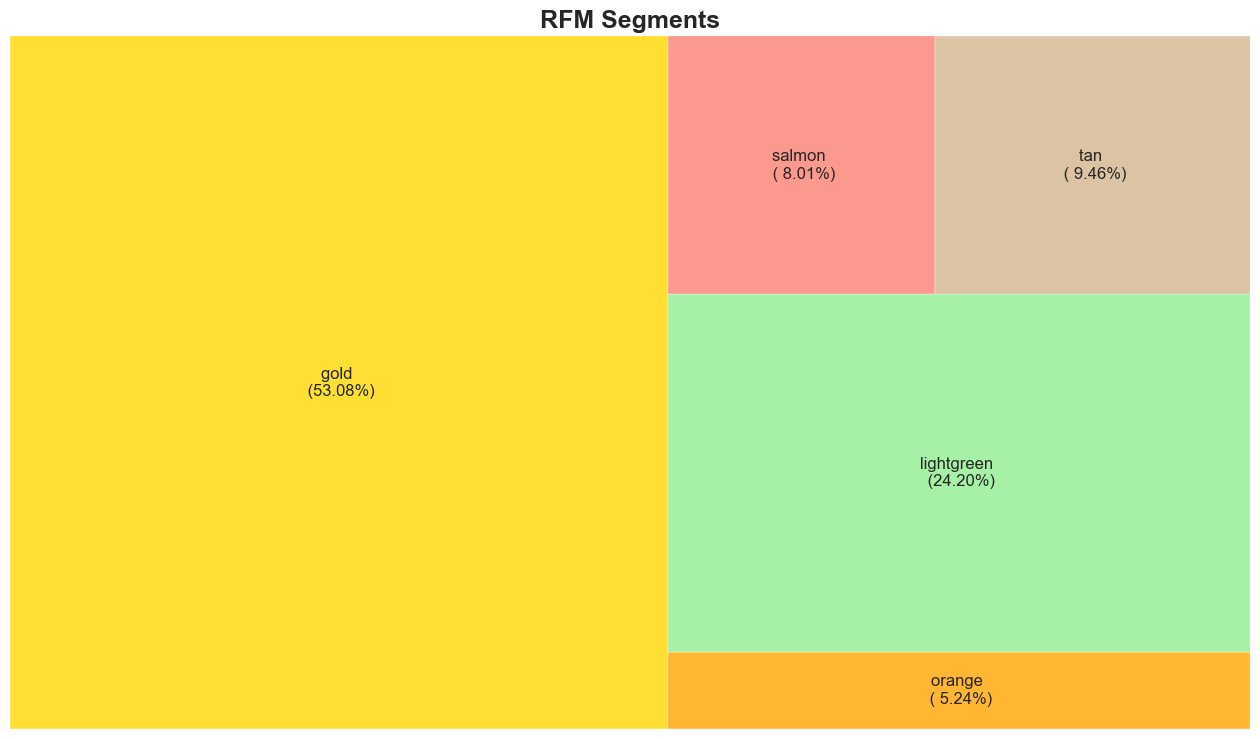

Log_rfm_Recency  Log_rfm_Frequency  Log_rfm_Monetry  \
gold                      6                  1                5   
orange                    5                  1                6   
lightgreen                4                  1                5   
salmon                    5                  1                6   
tan                       5                  1                5   

            Log_Satisfaction_score  Log_Delai_de_livraison  \
gold                             2                       3   
orange                           2                       2   
lightgreen                       2                       2   
salmon                           2                       2   
tan                              1                       3   

            Log_Nombre_Article   count  
gold                         1  4718.0  
orange                       1   466.0  
lightgreen                   1  2151.0  
salmon                       1   712.0  
tan                          1   841.0

In [133]:
segmentation_clients(df_feats_cluster,feats_cluster,5)

# **3.5 Comparaison Kmeans**

In [134]:
resultKmeans = pd.concat([k_means_rfm,k_means_RFMreviewScore,k_means_RFM_feats], axis=0)
resultKmeans

K  Silhouette  Davies-Bouldin
k-means : RFM               3.0    0.387821        0.880987
k-means : RFM_Review_Score  3.0    0.353976        0.973942
k-means : RFM_Features      3.0    0.277354        1.231855

In [135]:
# Définir une fonction qui colore le meilleur score en vert.
def color_best_val_green(col):
    best_val = col.min() if col.name == 'Davies-Bouldin' else col.max()
    color = ['background-color: green' if v == best_val else '' for v in col]
    return color

# Appliquer la fonction seulement aux colonnes Silhouette et Davies-Bouldin
resultKmeans.style.apply(color_best_val_green, subset=['Silhouette', 'Davies-Bouldin'])

# **Partie 4 : DBscan**

DBSCAN est un algorithme de clustering qui s’appuie sur la densité estimée des clusters pour effectuer le partitionnement.

- L'algorithme DBSCAN utilise 2 paramètres :

- La distance epsilon

Le nombre minimum de points MinPts devant se trouver dans un rayon epsilon pour que ces points soient considérés comme un cluster. Les paramètres d'entrées sont donc une estimation de la densité de points des clusters. L'idée de base de l'algorithme est ensuite, pour un point donné, de récupérer son epsilon-voisinage et de vérifier qu'il contient bien MinPts points ou plus. Ce point est alors considéré comme faisant partie d'un cluster. On parcourt ensuite l'epsilon-voisinage de proche en proche afin de trouver l'ensemble des points du cluster.

# 4.1 Choix des hyperparamètres

# 4.1.1 DBscan avec 3 variables RFM

In [136]:
feats_rfm_cluster=['Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry']
df_feats_rfm_cluster=df_rfm_clients[feats_rfm_cluster]

Distance Epsilon : 0.039568
Estimated number of clusters : 3
Estimated number of noise points : 9


<Figure size 500x500 with 0 Axes>

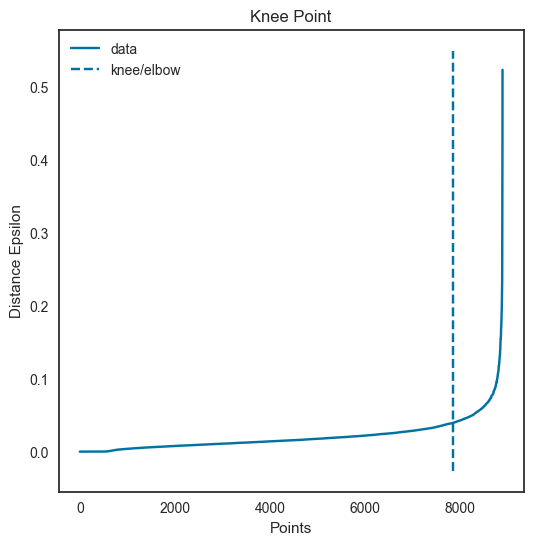

In [137]:
Cluster_db(df_rfm_clients,feats_rfm_cluster)

Estimated no. of clusters: 96
Estimated no. of noise points: 4493


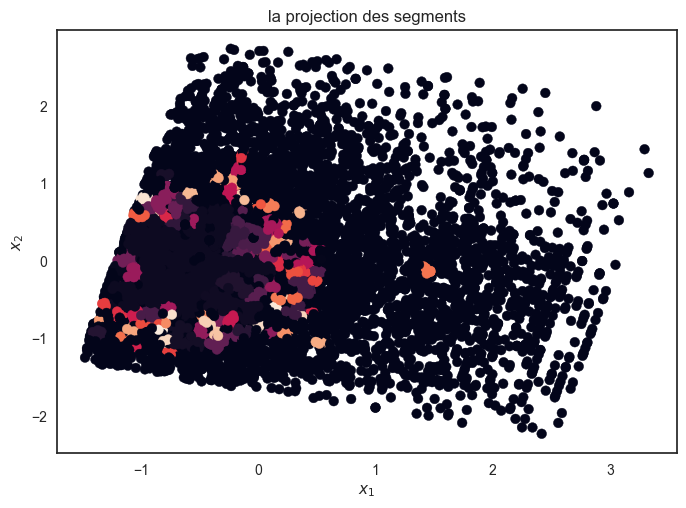

In [138]:
Cluster_pca(df_rfm_clients,feats_rfm_cluster,0.039,9,3)

# 4.1.2 DBscan avec 3 variables RFM et Log_Satisfaction_score

In [139]:
feats_rfmSc_cluster=['Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry','Log_Satisfaction_score']
df_feats_rfmSc_cluster=df_rfm_clients[feats_rfmSc_cluster]


Distance Epsilon : 0.080729
Estimated number of clusters : 14
Estimated number of noise points : 106


<Figure size 500x500 with 0 Axes>

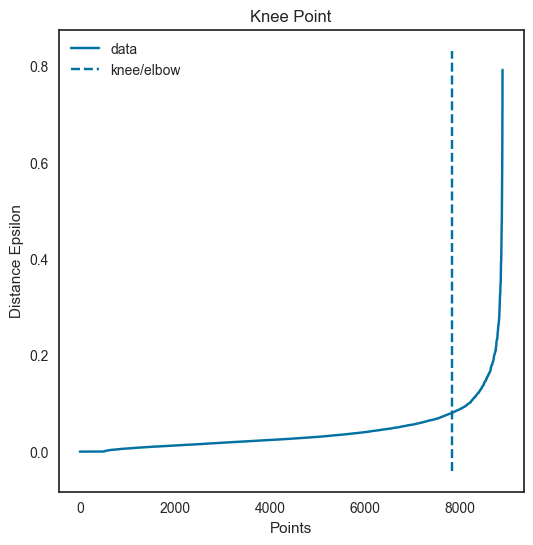

In [140]:
Cluster_db(df_rfm_clients,feats_rfmSc_cluster)

Estimated no. of clusters: 14
Estimated no. of noise points: 6272


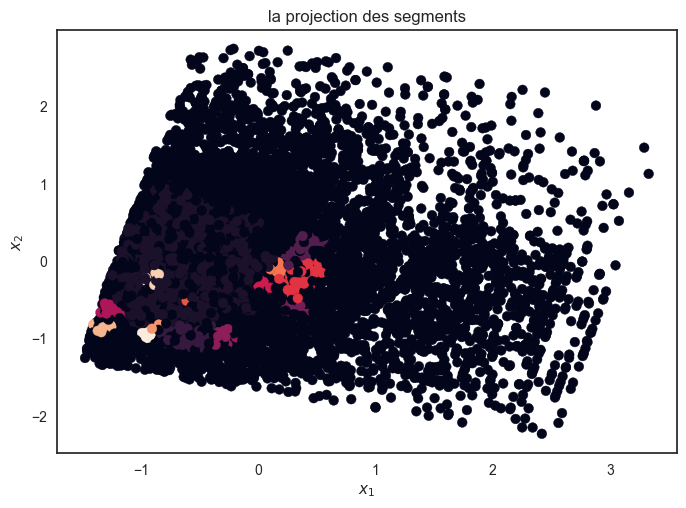

In [141]:
Cluster_pca(df_rfm_clients,feats_rfmSc_cluster,0.080,20,4)

 # 4.1.3 DBscan avec 3 variables RFM et autres variables supplémentaires

In [142]:
feats_cluster=['Log_rfm_Recency', 'Log_rfm_Frequency', 'Log_rfm_Monetry','Log_Satisfaction_score',
                      'Log_Delai_de_livraison','Log_Nombre_Article']

df_feats=df_rfm_clients[feats_cluster]

Distance Epsilon : 0.331192
Estimated number of clusters : 38
Estimated number of noise points : 1279


<Figure size 500x500 with 0 Axes>

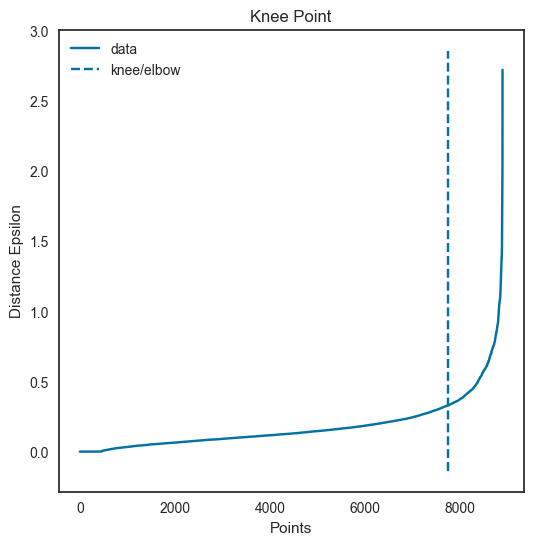

In [143]:
Cluster_db(df_rfm_clients,feats_cluster)

Estimated no. of clusters: 3
Estimated no. of noise points: 2882


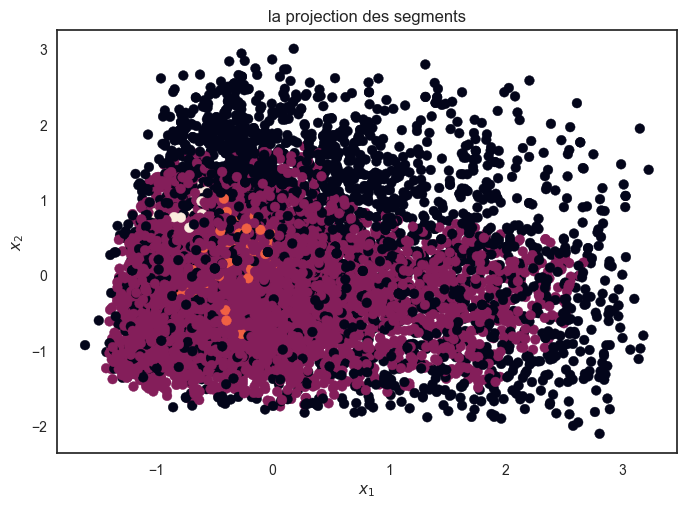

In [144]:
Cluster_pca(df_rfm_clients,feats_cluster,0.33,20,6)

# 4.2 Clustering DBSCAN

- Silouhette: Score entre -1 et 1 (optimal = 1)
- Index de Davies Bouldin: Score entre 0 et ∞ (optimal = 0)

- Ici on utilisera un sample au lieu d'utiliser tout le dataset, DBSCAN demande trop de ram pour 80000 clients


**Deux hyperparamètres:**

- Epsilon: Distance maximale entre les points pour être considérés voisins

- min_samples: Nombre minimal de points pour former un cluster

- Les points ne satisfaisant pas ces conditions sont considérés comme étant du bruit (noise

 # **4.2.1 Segmentation avec 3 variable RFM**

In [145]:
df_rfmDBscan=data_RFM.copy()
df_rfmDBscan

Log_rfm_Recency  Log_rfm_Frequency  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
0000f46a3911fa3c0805444483337064         6.285998           0.693147   
0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                           ...                ...   
195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

                                  Log_rfm_Monetry  
customer_unique_id                                 
0000366f3b9a7992bf8c76cfdf3221e2         4.962145  
0000b849f77a49e4a4ce2b2a4ca5be3f         3.338967  
0000f46a3911fa3c0805444483337064         4.468434  
0000f6ccb0745a6a4b88665a16c9f078         3.798182  
0004aac84e0df4da2b147fca70cf8255         5.287711  
...                                           ...  
195bd2de4ad0dfec423973cc62dd77ad         3.776890  
195cabf057d893ad407d1e5c97d25928         3.907613  
195cc291330f73e3d35032fd4e8b740f         4.729509  
195cf297219f91cb8ab3a8350a531217         3.338258  
195d0b909914d00626d8794fb5a20eed         5.758397  

[8888 rows x 3 columns]

In [146]:
resultsDBscanRFM = cluster_analysis_DBSCAN(df_rfmDBscan)
resultsDBscanRFM = resultsDBscanRFM.reset_index(drop=True)

In [147]:
resultsDBscanRFM

K  Epsilon  MinPts  Silhouette  Davies-Bouldin  NoisePercent
0  224      0.1       2    0.029591        0.815747      1.248875
1   78      0.1       3   -0.017759        1.063105      4.534203
2   61      0.1       4   -0.066183        1.087406      5.749325
3   44      0.1       5   -0.033479        1.076275      7.515752
4   40      0.1       6   -0.048637        1.105274      8.899640
5   30      0.1       7   -0.157977        1.128347     11.116112
6   27      0.1       8   -0.116600        1.260382     12.466247
7   23      0.1       9   -0.074875        1.313212     14.457696
8   27      0.1      10   -0.116671        1.359235     15.976598

In [148]:
dbscanRFM = pd.DataFrame(resultsDBscanRFM.iloc[0]).transpose()
dbscanRFM.rename(index={0:'DBSCAN : RFM'}, inplace=True)
#dbscanRFM = dbscanRFM.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final', 'Noise Rank'], axis=1)
dbscanRFM

K  Epsilon  MinPts  Silhouette  Davies-Bouldin  NoisePercent
DBSCAN : RFM  224.0      0.1     2.0    0.029591        0.815747      1.248875

# **4.2.2 Segmentation avec RFM et Log_Satisfaction_score'**

In [149]:
df_rfmReviewScoreDBscan=data_RFMreviewScore.copy()
df_rfmReviewScoreDBscan

Log_rfm_Recency  Log_rfm_Frequency  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
0000f46a3911fa3c0805444483337064         6.285998           0.693147   
0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                           ...                ...   
195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

                                  Log_rfm_Monetry  Log_Satisfaction_score  
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2         4.962145                1.791759  
0000b849f77a49e4a4ce2b2a4ca5be3f         3.338967                1.609438  
0000f46a3911fa3c0805444483337064         4.468434                1.386294  
0000f6ccb0745a6a4b88665a16c9f078         3.798182                1.609438  
0004aac84e0df4da2b147fca70cf8255         5.287711                1.791759  
...                                           ...                     ...  
195bd2de4ad0dfec423973cc62dd77ad         3.776890                1.791759  
195cabf057d893ad407d1e5c97d25928         3.907613                1.791759  
195cc291330f73e3d35032fd4e8b740f         4.729509                1.791759  
195cf297219f91cb8ab3a8350a531217         3.338258                1.609438  
195d0b909914d00626d8794fb5a20eed         5.758397                1.098612  

[8888 rows x 4 columns]

In [150]:
resultsDBscanRFMreviewScore = cluster_analysis_DBSCAN(df_rfmReviewScoreDBscan)
resultsDBscanRFMreviewScore  = resultsDBscanRFMreviewScore.reset_index(drop=True)

In [151]:
resultsDBscanRFMreviewScore

K  Epsilon  MinPts  Silhouette  Davies-Bouldin  NoisePercent
0  581      0.1       2   -0.214056        1.018532      8.010801
1  258      0.1       3   -0.292735        1.262654     15.279028
2  183      0.1       4   -0.326464        1.238645     20.117012
3  124      0.1       5   -0.363599        1.360279     25.483798
4  100      0.1       6   -0.400296        1.421994     30.029253
5   94      0.1       7   -0.423169        1.515225     33.910891
6   65      0.1       8   -0.468855        1.455468     38.962646
7   45      0.1       9   -0.477570        1.527168     43.148065
8   42      0.1      10   -0.499138        1.455121     46.478398

In [152]:
dbscanRFMreviewScore = pd.DataFrame(resultsDBscanRFMreviewScore.iloc[0]).transpose()
dbscanRFMreviewScore.rename(index={0:'DBSCAN : RFM_Review_Score'}, inplace=True)
#dbscanRFMreviewScore = dbscanRFMreviewScore.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final', 'Noise Rank'], axis=1)
dbscanRFMreviewScore

K  Epsilon  MinPts  Silhouette  Davies-Bouldin  \
DBSCAN : RFM_Review_Score  581.0      0.1     2.0   -0.214056        1.018532   

                           NoisePercent  
DBSCAN : RFM_Review_Score      8.010801

# **4.2.3 Segmentation avec RFM et plusieurs variables supplémentaires**

In [153]:
df_rfmFeatsDBscan=data_rfm_feats.copy()
df_rfmFeatsDBscan 

Log_rfm_Recency  Log_rfm_Frequency  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
0000f46a3911fa3c0805444483337064         6.285998           0.693147   
0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                           ...                ...   
195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

                                  Log_rfm_Monetry  Log_Satisfaction_score  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2         4.962145                1.791759   
0000b849f77a49e4a4ce2b2a4ca5be3f         3.338967                1.609438   
0000f46a3911fa3c0805444483337064         4.468434                1.386294   
0000f6ccb0745a6a4b88665a16c9f078         3.798182                1.609438   
0004aac84e0df4da2b147fca70cf8255         5.287711                1.791759   
...                                           ...                     ...   
195bd2de4ad0dfec423973cc62dd77ad         3.776890                1.791759   
195cabf057d893ad407d1e5c97d25928         3.907613                1.791759   
195cc291330f73e3d35032fd4e8b740f         4.729509                1.791759   
195cf297219f91cb8ab3a8350a531217         3.338258                1.609438   
195d0b909914d00626d8794fb5a20eed         5.758397                1.098612   

                                  Log_Delai_de_livraison  Log_Nombre_Article  
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2                1.945910            0.693147  
0000b849f77a49e4a4ce2b2a4ca5be3f                1.386294            0.693147  
0000f46a3911fa3c0805444483337064                3.258097            0.693147  
0000f6ccb0745a6a4b88665a16c9f078                3.044522            0.693147  
0004aac84e0df4da2b147fca70cf8255                2.639057            0.693147  
...                                                  ...                 ...  
195bd2de4ad0dfec423973cc62dd77ad                1.386294            0.693147  
195cabf057d893ad407d1e5c97d25928                2.833213            0.693147  
195cc291330f73e3d35032fd4e8b740f                2.708050            0.693147  
195cf297219f91cb8ab3a8350a531217                1.386294            0.693147  
195d0b909914d00626d8794fb5a20eed                2.944439            0.693147  

[8888 rows x 6 columns]

In [154]:
resultsDBscanRFMfeats = cluster_analysis_DBSCAN(df_rfmFeatsDBscan)
resultsDBscanRFMfeats  = resultsDBscanRFMfeats.reset_index(drop=True)

In [155]:
resultsDBscanRFMfeats.style.apply(color_best_val_green, subset=['Epsilon','MinPts','Silhouette','Davies-Bouldin'])

In [156]:
dbscanRFMFeats = pd.DataFrame(resultsDBscanRFMfeats.iloc[0]).transpose()
dbscanRFMFeats.rename(index={0:'DBSCAN : RFM_Features'}, inplace=True)
#dbscanRFMFeats = dbscanRFMFeats.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final', 'Noise Rank'], axis=1)
dbscanRFMFeats

K  Epsilon  MinPts  Silhouette  Davies-Bouldin  \
DBSCAN : RFM_Features  1249.0      0.1     2.0   -0.274249        1.281816   

                       NoisePercent  
DBSCAN : RFM_Features      62.19622

# **4.3 Comparaison DBscan**

In [157]:
resultDBscan = pd.concat([dbscanRFM,dbscanRFMreviewScore,dbscanRFMFeats], axis=0)
resultDBscan.style.apply(color_best_val_green, subset=['Epsilon','MinPts','Silhouette','Davies-Bouldin'])


# 4.4 Comparaison entre Kmeans et DBscan 

# 4.4.1 ResultKmeans

In [158]:
#resultKmeans
# Appliquer la fonction seulement aux colonnes Silhouette et Davies-Bouldin
resultKmeans.style.apply(color_best_val_green, subset=['Silhouette', 'Davies-Bouldin'])

# 4.4.2 ResultDBscan

In [159]:
#resultDBscan
#resultKmeans.style.apply(color_best_val_green, subset=['Epsilon','MinPts','Silhouette','Davies-Bouldin'])
resultDBscan.style.apply(color_best_val_green, subset=['Epsilon','MinPts','Silhouette','Davies-Bouldin'])

# 4.4.3 ResultRFM DBscan&Kmeans

In [160]:
resultRFM = pd.concat([k_means_rfm,dbscanRFM,], axis=0)
resultRFM.style.apply(color_best_val_green, subset=['Epsilon','MinPts','Silhouette','Davies-Bouldin'])

# 4.4.4 ResultRFM_ReviewScore DBscan&Kmeans

In [161]:
resultRFM_ReviewScore = pd.concat([k_means_RFMreviewScore,dbscanRFMreviewScore], axis=0)
resultRFM_ReviewScore.style.apply(color_best_val_green, subset=['Epsilon','MinPts','Silhouette','Davies-Bouldin'])

# 4.4.5 ResultRFM_Features DBscan&Kmeans

In [162]:
resultRFM_Features = pd.concat([k_means_RFM_feats ,dbscanRFMFeats], axis=0)
resultRFM_Features.style.apply(color_best_val_green, subset=['Epsilon','MinPts','Silhouette','Davies-Bouldin'])

# **Partie 5**

 # 5.1 Analyse en composantes principales: ACP

In [163]:
df_rfm_client

Unnamed: 0                customer_unique_id order_purchase_timestamp  \
0               0  0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27   
1               1  0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27   
2               2  0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03   
3               3  0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41   
4               4  0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42   
...           ...                               ...                      ...   
88882      112559  fffb09418989a0dbff854a28163e47c6      2017-12-17 19:14:35   
88883      112562  fffea47cd6d3cc0a88bd621562a9d061      2017-12-10 20:07:56   
88884      112563  ffff371b4d645b6ecea244b27531430a      2017-02-07 15:49:16   
88885      112564  ffff5962728ec6157033ef9805bacc48      2018-05-02 15:17:41   
88886      112565  ffffd2657e2aad2907e67c3e9daecbeb      2017-05-02 20:18:45   

      Localisation categorie_produit  Log_rfm_Frequency  Log_rfm_Monetry  \
0               SP    bed_bath_table           0.693147         4.962145   
1               SP     health_beauty           0.693147         3.338967   
2               SC        stationery           0.693147         4.468434   
3               PA         telephony           0.693147         3.798182   
4               SP         telephony           0.693147         5.287711   
...            ...               ...                ...              ...   
88882           RS     watches_gifts           0.693147         4.306225   
88883           BA              baby           0.693147         4.449452   
88884           MT              auto           0.693147         4.731450   
88885           ES     watches_gifts           0.693147         4.902976   
88886           PR         perfumery           0.693147         4.284414   

       Log_rfm_Recency  Log_Satisfaction_score  Log_Delai_de_livraison  \
0             4.718499                1.791759                1.945910   
1             4.744932                1.609438                1.386294   
2             6.285998                1.386294                3.258097   
3             5.771441                1.609438                3.044522   
4             5.662960                1.791759                2.639057   
...                ...                     ...                     ...   
88882         5.541264                1.791759                2.197225   
88883         5.568345                1.609438                3.433987   
88884         6.342121                1.791759                2.708050   
88885         4.779123                1.791759                2.484907   
88886         6.182085                1.791759                2.079442   

       Log_Nombre_Article  
0                0.693147  
1                0.693147  
2                0.693147  
3                0.693147  
4                0.693147  
...                   ...  
88882            0.693147  
88883            0.693147  
88884            0.693147  
88885            0.693147  
88886            0.693147  

[88887 rows x 11 columns]

In [164]:
# Liste des variables quantitatives 
num_data_clients = df_rfm_clients.select_dtypes(include='number').columns.tolist()
print("Les variables numériques sont: ", num_data_clients)

Les variables numériques sont:  ['Log_rfm_Frequency', 'Log_rfm_Monetry', 'Log_rfm_Recency', 'Log_Satisfaction_score', 'Log_Delai_de_livraison', 'Log_Nombre_Article']


In [165]:
df_rfmFeatsDBscan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8888 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to 195d0b909914d00626d8794fb5a20eed
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Log_rfm_Recency         8888 non-null   float64
 1   Log_rfm_Frequency       8888 non-null   float64
 2   Log_rfm_Monetry         8888 non-null   float64
 3   Log_Satisfaction_score  8888 non-null   float64
 4   Log_Delai_de_livraison  8888 non-null   float64
 5   Log_Nombre_Article      8888 non-null   float64
dtypes: float64(6)
memory usage: 486.1+ KB


In [166]:
df_rfmFeatsDBscan

Log_rfm_Recency  Log_rfm_Frequency  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2         4.718499           0.693147   
0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932           0.693147   
0000f46a3911fa3c0805444483337064         6.285998           0.693147   
0000f6ccb0745a6a4b88665a16c9f078         5.771441           0.693147   
0004aac84e0df4da2b147fca70cf8255         5.662960           0.693147   
...                                           ...                ...   
195bd2de4ad0dfec423973cc62dd77ad         5.283204           0.693147   
195cabf057d893ad407d1e5c97d25928         5.135798           0.693147   
195cc291330f73e3d35032fd4e8b740f         5.164786           0.693147   
195cf297219f91cb8ab3a8350a531217         5.407172           0.693147   
195d0b909914d00626d8794fb5a20eed         5.752573           0.693147   

                                  Log_rfm_Monetry  Log_Satisfaction_score  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2         4.962145                1.791759   
0000b849f77a49e4a4ce2b2a4ca5be3f         3.338967                1.609438   
0000f46a3911fa3c0805444483337064         4.468434                1.386294   
0000f6ccb0745a6a4b88665a16c9f078         3.798182                1.609438   
0004aac84e0df4da2b147fca70cf8255         5.287711                1.791759   
...                                           ...                     ...   
195bd2de4ad0dfec423973cc62dd77ad         3.776890                1.791759   
195cabf057d893ad407d1e5c97d25928         3.907613                1.791759   
195cc291330f73e3d35032fd4e8b740f         4.729509                1.791759   
195cf297219f91cb8ab3a8350a531217         3.338258                1.609438   
195d0b909914d00626d8794fb5a20eed         5.758397                1.098612   

                                  Log_Delai_de_livraison  Log_Nombre_Article  
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2                1.945910            0.693147  
0000b849f77a49e4a4ce2b2a4ca5be3f                1.386294            0.693147  
0000f46a3911fa3c0805444483337064                3.258097            0.693147  
0000f6ccb0745a6a4b88665a16c9f078                3.044522            0.693147  
0004aac84e0df4da2b147fca70cf8255                2.639057            0.693147  
...                                                  ...                 ...  
195bd2de4ad0dfec423973cc62dd77ad                1.386294            0.693147  
195cabf057d893ad407d1e5c97d25928                2.833213            0.693147  
195cc291330f73e3d35032fd4e8b740f                2.708050            0.693147  
195cf297219f91cb8ab3a8350a531217                1.386294            0.693147  
195d0b909914d00626d8794fb5a20eed                2.944439            0.693147  

[8888 rows x 6 columns]

In [167]:
df_rfmFeatsDBscanAPC =  df_rfmFeatsDBscan [num_data_clients]
df_rfmFeatsDBscanAPC

Log_rfm_Frequency  Log_rfm_Monetry  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2           0.693147         4.962145   
0000b849f77a49e4a4ce2b2a4ca5be3f           0.693147         3.338967   
0000f46a3911fa3c0805444483337064           0.693147         4.468434   
0000f6ccb0745a6a4b88665a16c9f078           0.693147         3.798182   
0004aac84e0df4da2b147fca70cf8255           0.693147         5.287711   
...                                             ...              ...   
195bd2de4ad0dfec423973cc62dd77ad           0.693147         3.776890   
195cabf057d893ad407d1e5c97d25928           0.693147         3.907613   
195cc291330f73e3d35032fd4e8b740f           0.693147         4.729509   
195cf297219f91cb8ab3a8350a531217           0.693147         3.338258   
195d0b909914d00626d8794fb5a20eed           0.693147         5.758397   

                                  Log_rfm_Recency  Log_Satisfaction_score  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2         4.718499                1.791759   
0000b849f77a49e4a4ce2b2a4ca5be3f         4.744932                1.609438   
0000f46a3911fa3c0805444483337064         6.285998                1.386294   
0000f6ccb0745a6a4b88665a16c9f078         5.771441                1.609438   
0004aac84e0df4da2b147fca70cf8255         5.662960                1.791759   
...                                           ...                     ...   
195bd2de4ad0dfec423973cc62dd77ad         5.283204                1.791759   
195cabf057d893ad407d1e5c97d25928         5.135798                1.791759   
195cc291330f73e3d35032fd4e8b740f         5.164786                1.791759   
195cf297219f91cb8ab3a8350a531217         5.407172                1.609438   
195d0b909914d00626d8794fb5a20eed         5.752573                1.098612   

                                  Log_Delai_de_livraison  Log_Nombre_Article  
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2                1.945910            0.693147  
0000b849f77a49e4a4ce2b2a4ca5be3f                1.386294            0.693147  
0000f46a3911fa3c0805444483337064                3.258097            0.693147  
0000f6ccb0745a6a4b88665a16c9f078                3.044522            0.693147  
0004aac84e0df4da2b147fca70cf8255                2.639057            0.693147  
...                                                  ...                 ...  
195bd2de4ad0dfec423973cc62dd77ad                1.386294            0.693147  
195cabf057d893ad407d1e5c97d25928                2.833213            0.693147  
195cc291330f73e3d35032fd4e8b740f                2.708050            0.693147  
195cf297219f91cb8ab3a8350a531217                1.386294            0.693147  
195d0b909914d00626d8794fb5a20eed                2.944439            0.693147  

[8888 rows x 6 columns]

In [168]:
#Standardisation des données
df_value = df_rfmFeatsDBscanAPC.values
scaler= StandardScaler()
df_standard = scaler.fit_transform(df_value)
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_standard)

% Variance  :  [29.  22.  16.5 12.7 12.2  7.7]


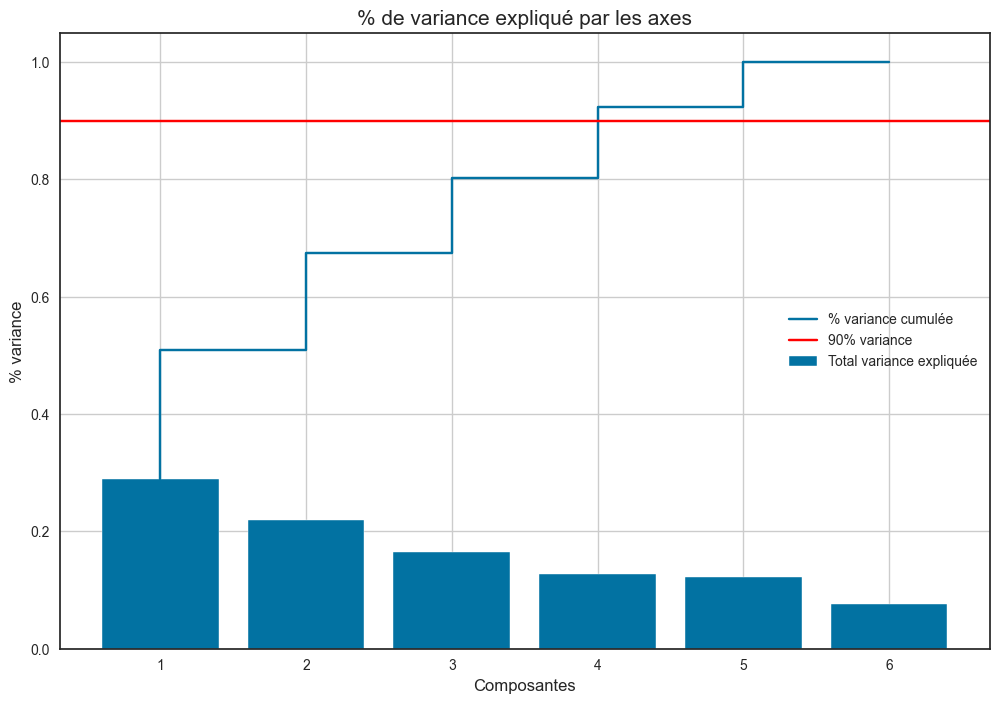

In [169]:
#Pourcentage de variance expliquée
var_ratio = pca.explained_variance_ratio_
print('% Variance  : ',np.around(var_ratio*100,1))
plt.figure(figsize=(12,8))
plt.bar(range(1,len(var_ratio)+1),var_ratio,align='center',label='Total variance expliquée')
plt.step(range(1,len(var_ratio)+1),np.cumsum(var_ratio),label='% variance cumulée')
plt.axhline(y=0.90,color='red',label='90% variance')
plt.xlabel('Composantes',fontsize=12)
plt.ylabel('% variance',fontsize=12)
plt.legend(loc=7)
plt.title('% de variance expliqué par les axes',fontsize=15)
plt.grid()
plt.show()

 les valeurs propres : 
 [1.73876977 1.31968222 0.99208723 0.76083686 0.73007135 0.45922772] 
------------------------------------



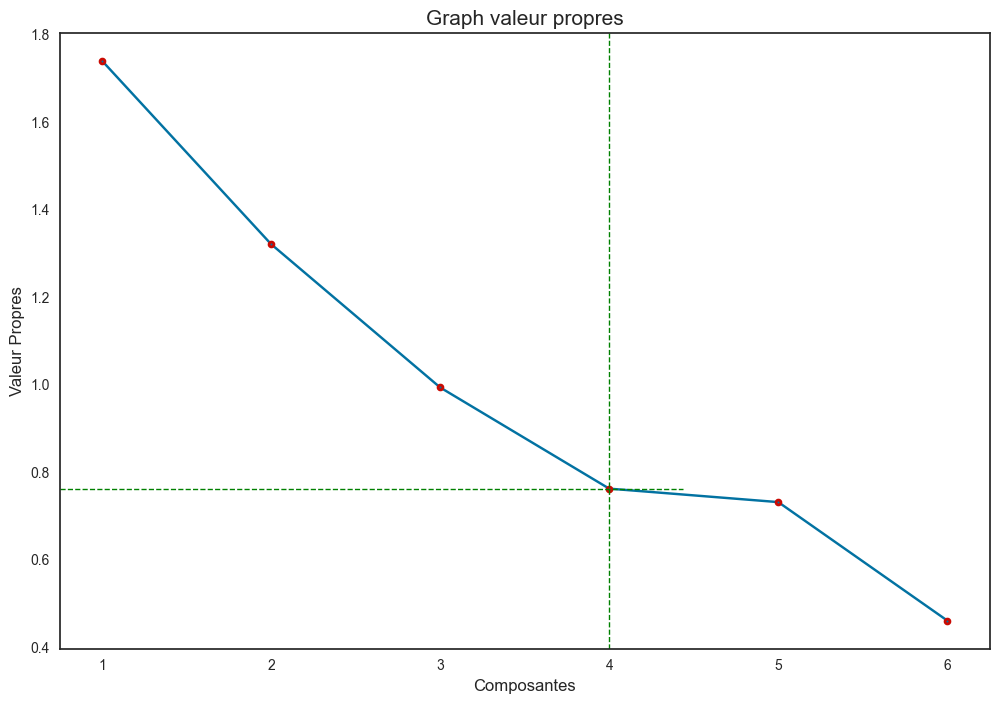

In [170]:
#Diagramme "scree-plot" établi entre le nombre de dimensions de l'ACP et les valeurs propres. 

eigen_values = pca.explained_variance_
print(' les valeurs propres : \n',eigen_values,'\n------------------------------------\n')

plt.figure(figsize=(12,8))
plt.plot(range(1,len(eigen_values)+1),eigen_values,marker='.',mec='r',mew=2)
plt.title('Graph valeur propres',fontsize=15)
plt.ylabel("Valeur Propres",fontsize=12)
plt.xlabel("Composantes",fontsize=12)

plt.axhline(y=0.76, linestyle="--", 
            color="green",
            xmax=0.67,
            linewidth=1)
plt.axvline(x=4, linestyle="--", 
            color="green",
            ymax=1.48,
            linewidth=1)


plt.show()